MIT License
Copyright (c) 2023 Sanjana Karra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

###Abstract
The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

## Aim</br>
The aim of a complete ML (Machine Learning) project is to develop and deploy a model that can accurately and efficiently perform a specific task, based on a given dataset. A complete ML project typically involves several stages, including:</br>

Data collection and preprocessing: Collecting relevant data and cleaning, organizing, and transforming it to make it suitable for use in the ML model.</br>

Exploratory data analysis (EDA): Examining the data to understand its characteristics, identify patterns, and explore potential relationships between variables.</br>

Model selection and training: Choosing an appropriate ML algorithm and training it on the data to develop a model that can accurately predict the target variable.</br>

Evaluation and testing: Assessing the performance of the model on a separate test dataset to determine its accuracy, precision, recall, and other relevant metrics.</br>

Deployment and monitoring: Integrating the model into a production environment and continuously monitoring its performance to ensure it remains accurate and effective over time.</br>

## What question are you trying to answer? How did you frame it as an ML task?
"Can we predict whether a policyholder will file a claim in the next 6 months based on their policy tenure, car and car owner's age, population density, car make and model, power, engine type, etc?"</br>

This can be framed as a classification problem, where the target variable is either 1 (if the policyholder files a claim in the next 6 months) or 0 (if the policyholder does not file a claim in the next 6 months). The ML algorithm can be trained on historical data with known target variables and then used to make predictions on new data. The performance of the model can be measured using metrics such as accuracy, precision, recall, and F1-score.</br>

In [ ]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=ccb282d48ff0809fbf0908b5a495b342119d8ecf5bb278e296588de1d6b3348e
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

# Exploratory Data Analysis
Explanatory data analysis (EDA) is a process of analyzing and understanding data to uncover its underlying patterns and relationships.</br>
The ultimate goal of EDA is to gain a deeper understanding of the data and to communicate those findings to others in a clear and effective way. This process can inform decision-making and provide insights for further analysis or experimentation.

In [ ]:
#Reading the car insurance claim prediction dataset
df = pd.read_csv("https://raw.githubusercontent.com/sanjanakarra9/DSEM-Assignment1/main/train.csv")

In [ ]:
# Viewing data in the file
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  

[5 rows x 44 columns]

In [ ]:
# removing ID column
df.drop("policy_id",axis=1,inplace=True)

In [ ]:
# Viewing data in the file
df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_brake_assist is_power_door_locks  is_central_locking is_power_steering  \
0              No                  No                  No               Yes   
1              No                  No                  No               Yes   
2              No                  No                  No               Yes   
3             Yes                 Yes                 Yes               Yes   
4              No                 Yes                 Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating  is_claim  
0            Yes           0         0  
1            Yes           0         0  
2            Yes           0         0  
3            Yes           2         0  
4            Yes           2         0  

[5 rows x 43 columns]

In [ ]:
#checking if any data is missing
df.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

<Axes: >

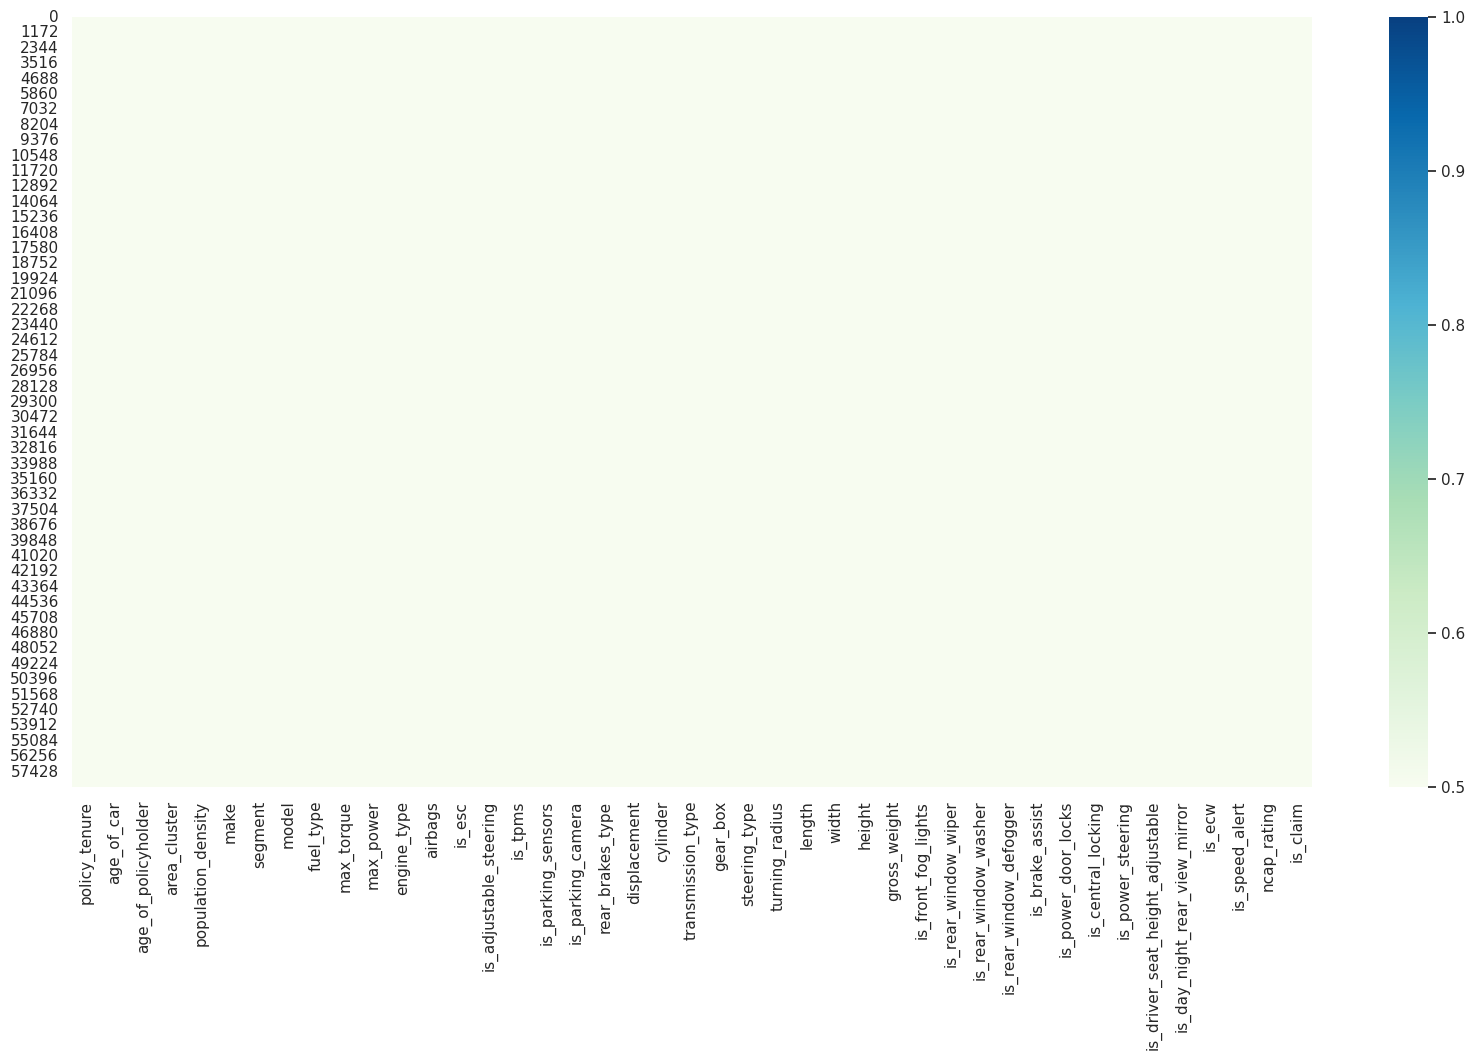

In [ ]:
# plot the count of missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap='GnBu',vmin=0.5, vmax=1)

In [ ]:
# Dataset size
df.shape

(58592, 43)

In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [ ]:
# describe dataset
df.describe().transpose().style.background_gradient(cmap = 'RdPu')

In [ ]:
df.describe([0.05,0.1,0.25,0.5,0.65,0.75,0.85,0.9,0.95]).transpose().style.background_gradient(cmap = 'Reds')

In [ ]:
# Check for duplicate records
df.duplicated().sum()

0

In [ ]:
df.drop("policy_tenure",axis=1,inplace=True)
df.head(2)

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0        0.05             0.644231           C1                4990     1   
1        0.02             0.375000           C2               27003     1   

  segment model fuel_type    max_torque         max_power  ...  \
0       A    M1       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   
1       A    M1       CNG  60Nm@3500rpm  40.36bhp@6000rpm  ...   

  is_brake_assist  is_power_door_locks is_central_locking is_power_steering  \
0              No                   No                 No               Yes   
1              No                   No                 No               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0  

[2 rows x 42 columns]

In [ ]:
# categorical data
categorical_data = df.select_dtypes(["object"]).columns.tolist()
categorical_data

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [ ]:
# numerical data
numerical_data = df.select_dtypes(["float64","int64"]).columns.tolist()
numerical_data

['age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']


create 2 lists to observe numeric and categorical values

In [ ]:
cat_list=[]
num_list=[]

for i in df.columns:
    unique_val=len(df[i].unique())
    
    if unique_val<15:
        cat_list.append(i)
    else:
        num_list.append(i)

In [ ]:
cat_list

['make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating',
 'is_claim']

In [ ]:
num_list

['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']

In [ ]:
# area_cluster is not a numeric variable, let's add it to the category
num_list.remove("area_cluster")
cat_list.append("area_cluster")

In [ ]:
df.loc[:,num_list].head(2)

age_of_car  age_of_policyholder  population_density
0        0.05             0.644231                4990
1        0.02             0.375000               27003

<Figure size 800x500 with 0 Axes>

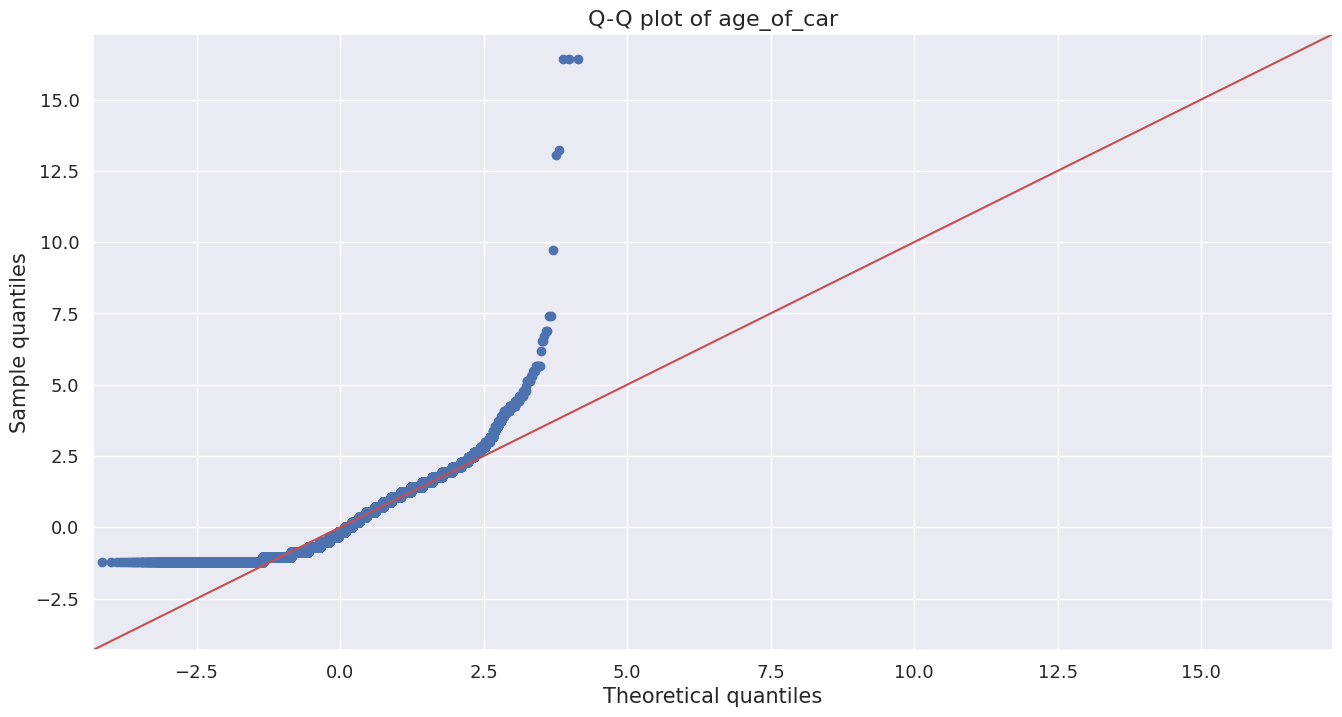

<Figure size 800x500 with 0 Axes>

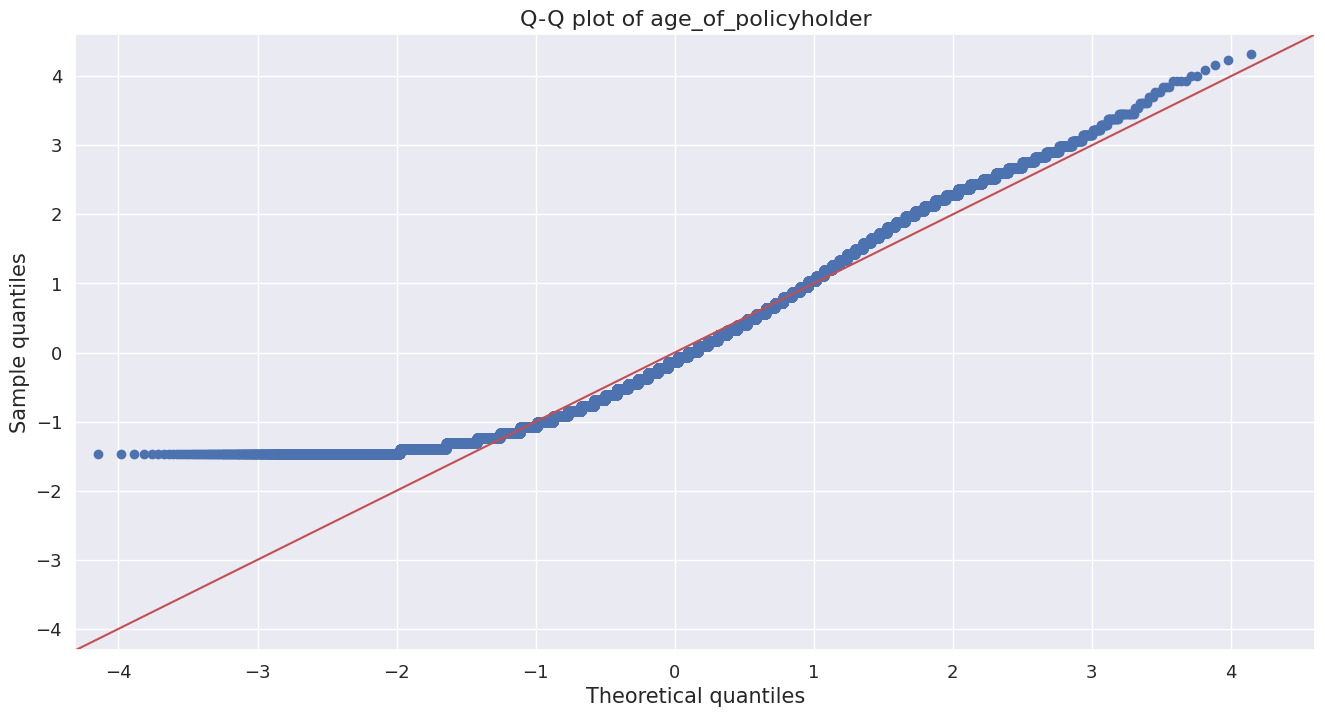

<Figure size 800x500 with 0 Axes>

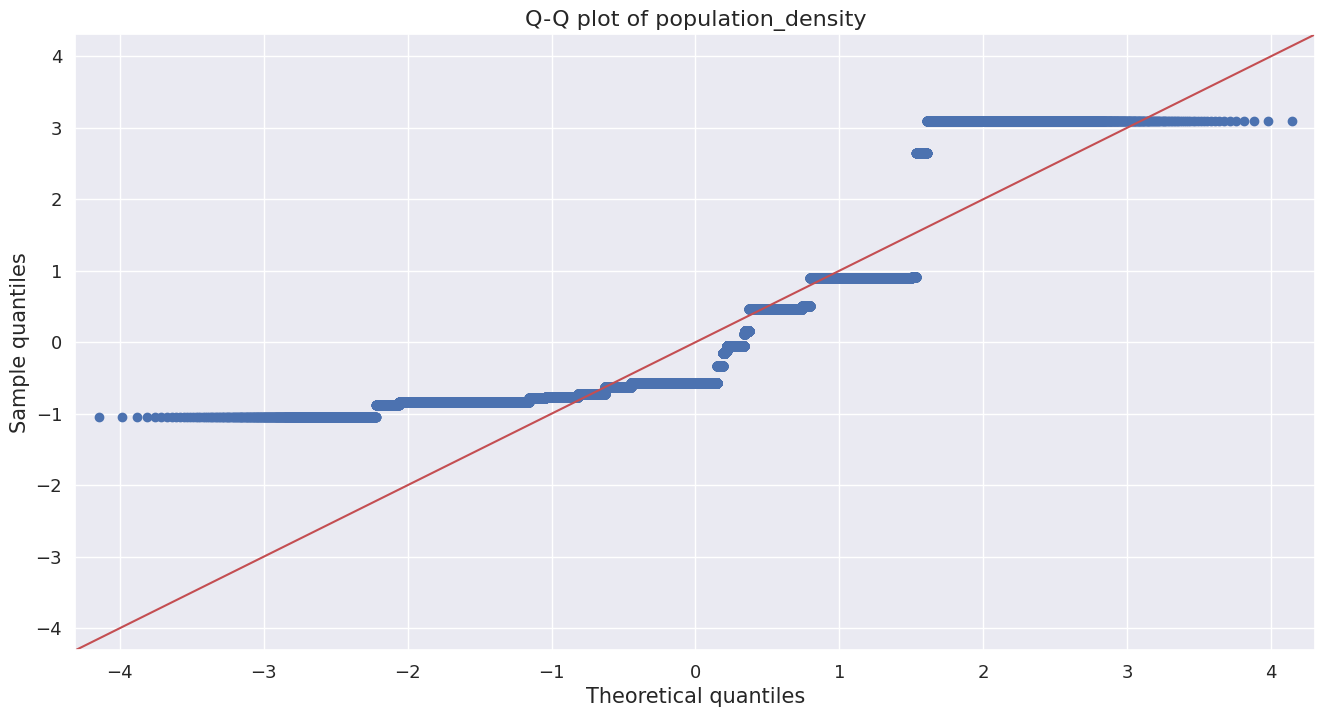

In [ ]:
#checking the distribution of numerical variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[[
 'age_of_car',
 'age_of_policyholder',
 'population_density'
  ]]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

Distrubution of numerical variables



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

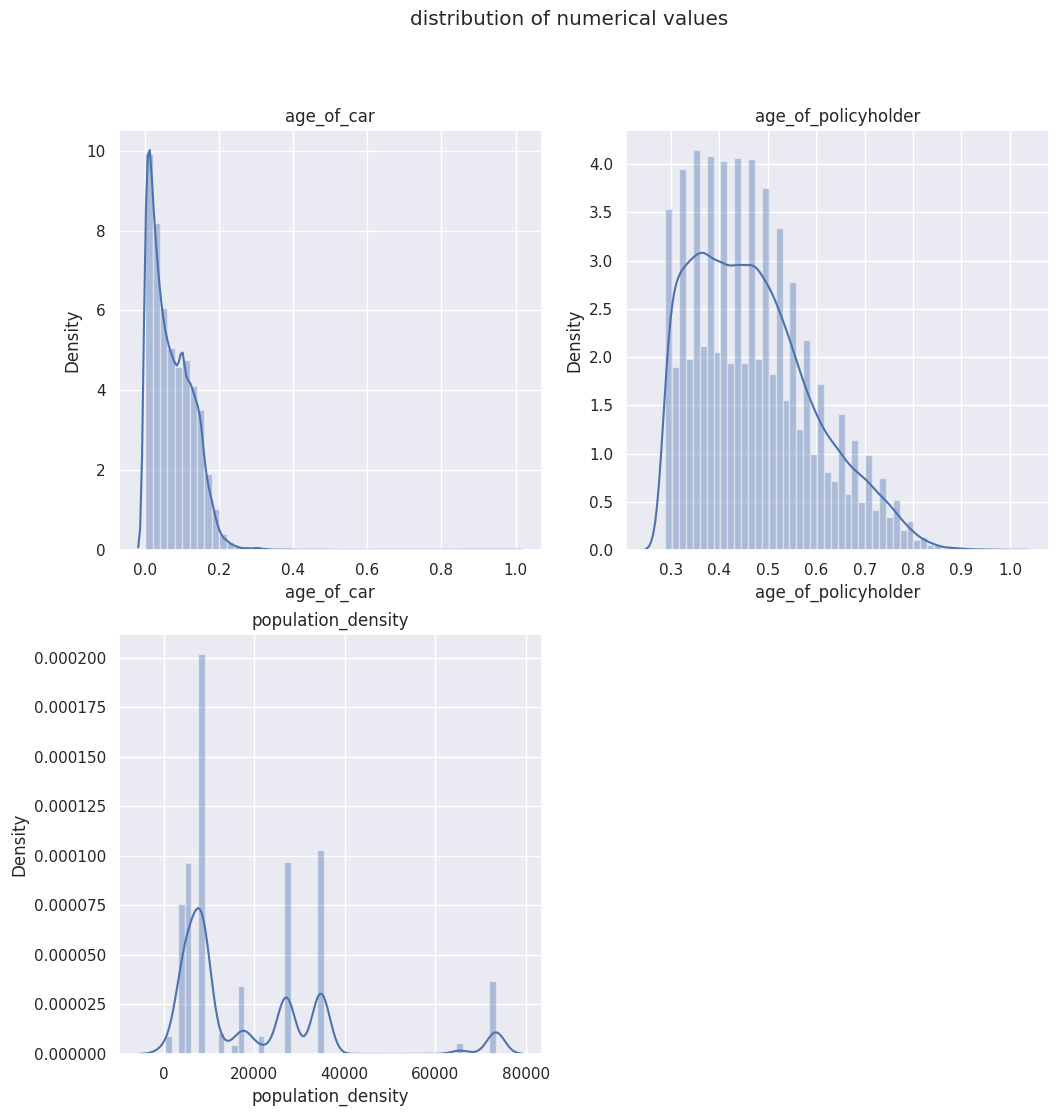

In [ ]:
k=1
plt.figure(figsize=(12,12))
plt.tight_layout()
plt.suptitle("distribution of numerical values")


for i in df.loc[:,num_list]:
    plt.subplot(2,2,k)    
    sns.distplot(df[i])
    plt.title(i)
    k+=1

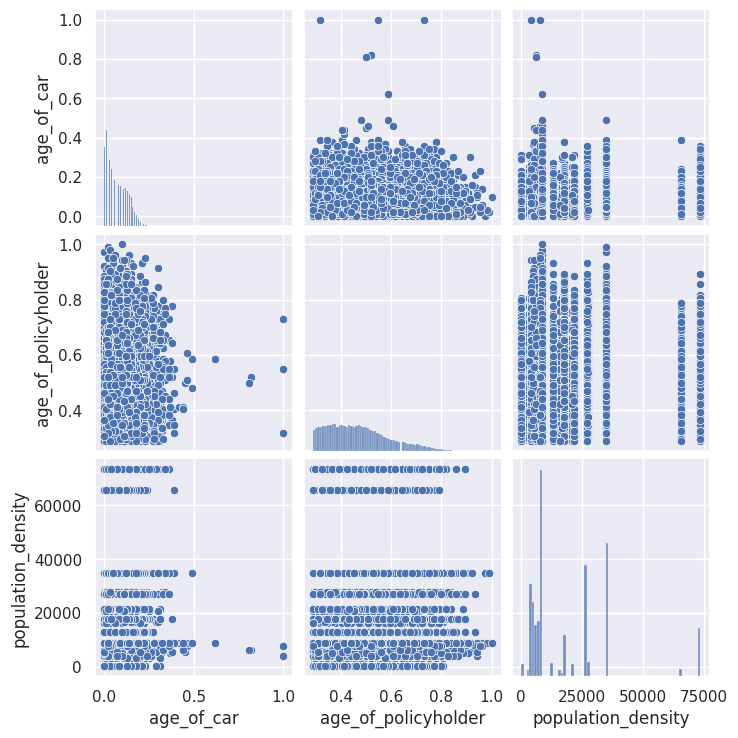

In [ ]:
sns.pairplot(df.loc[:,num_list]);

<Axes: >

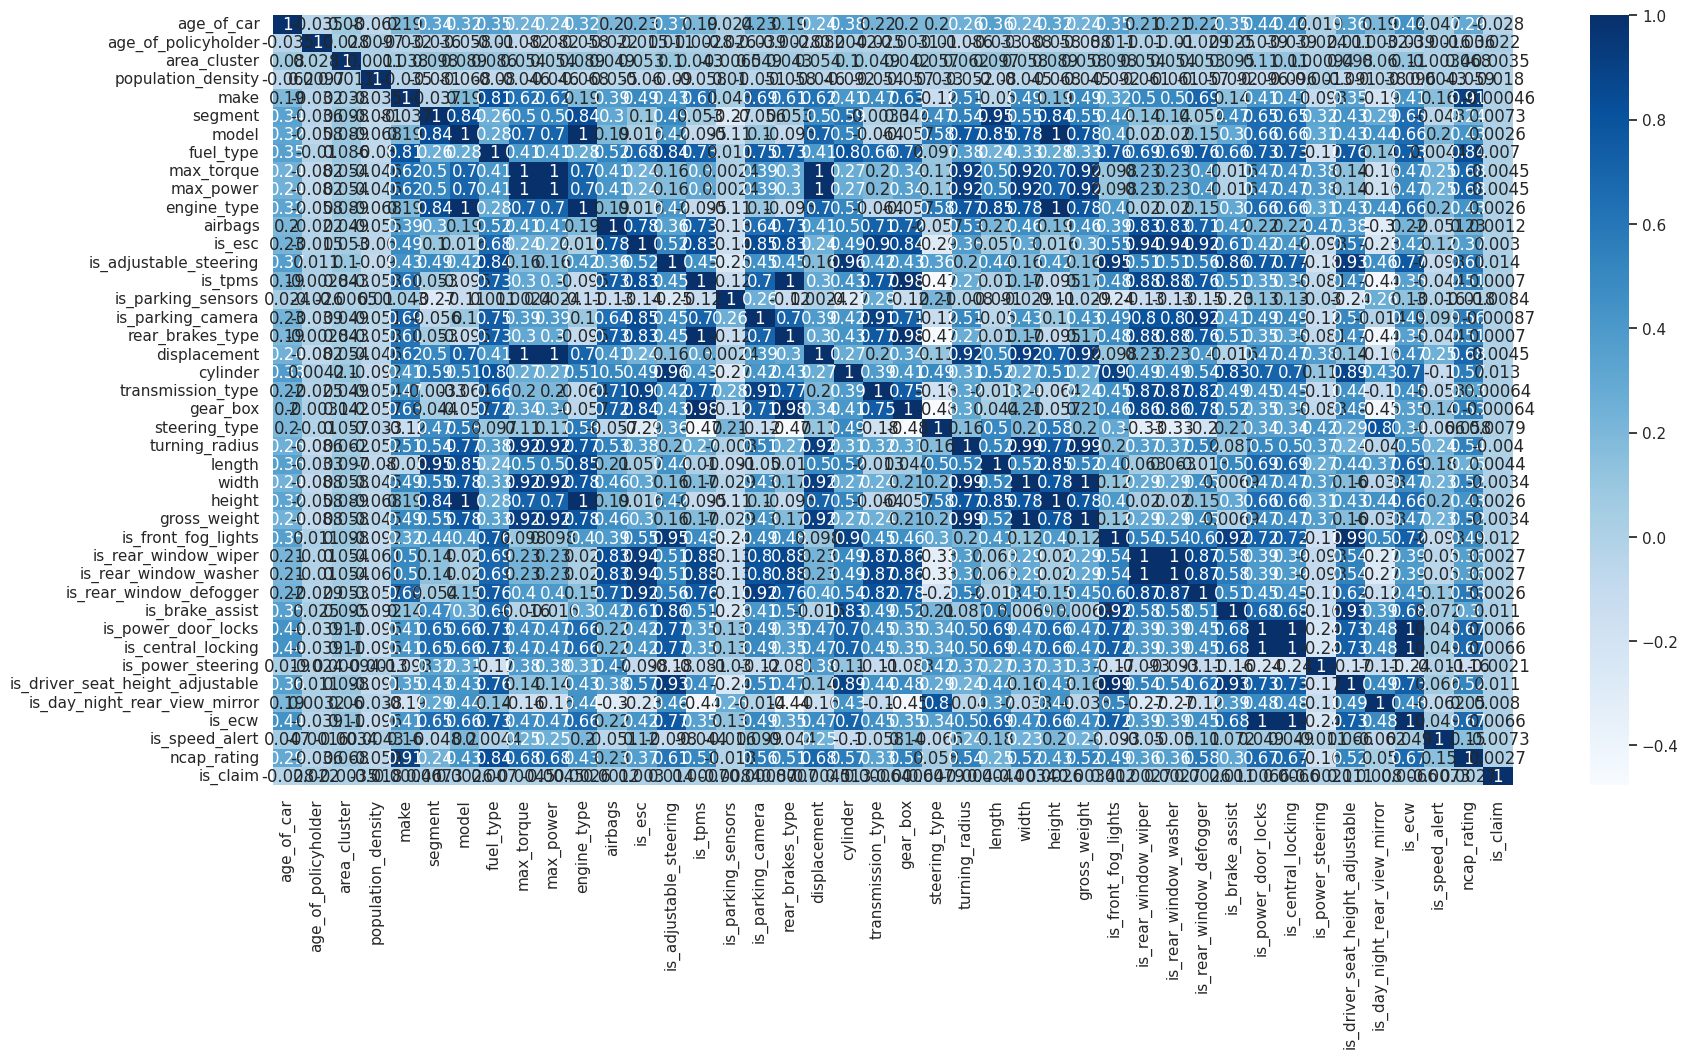

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    df.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


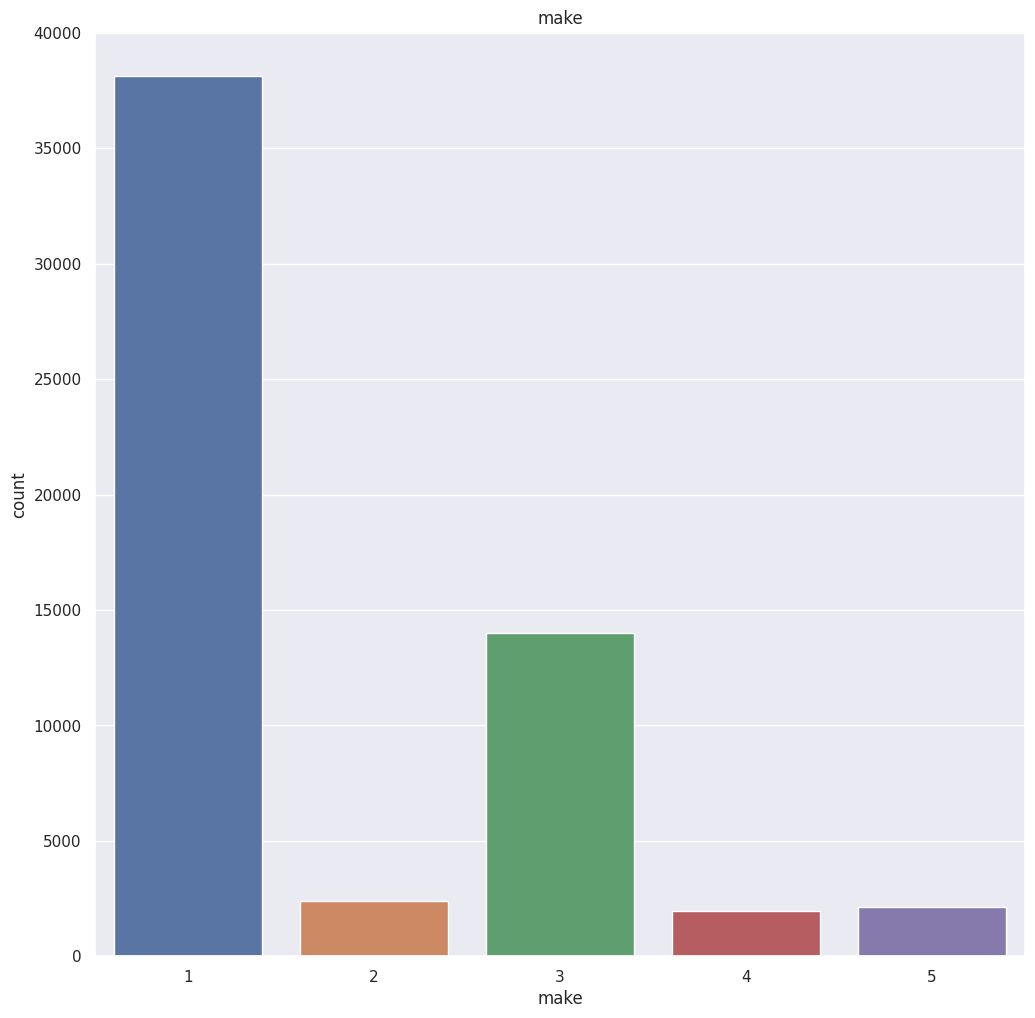

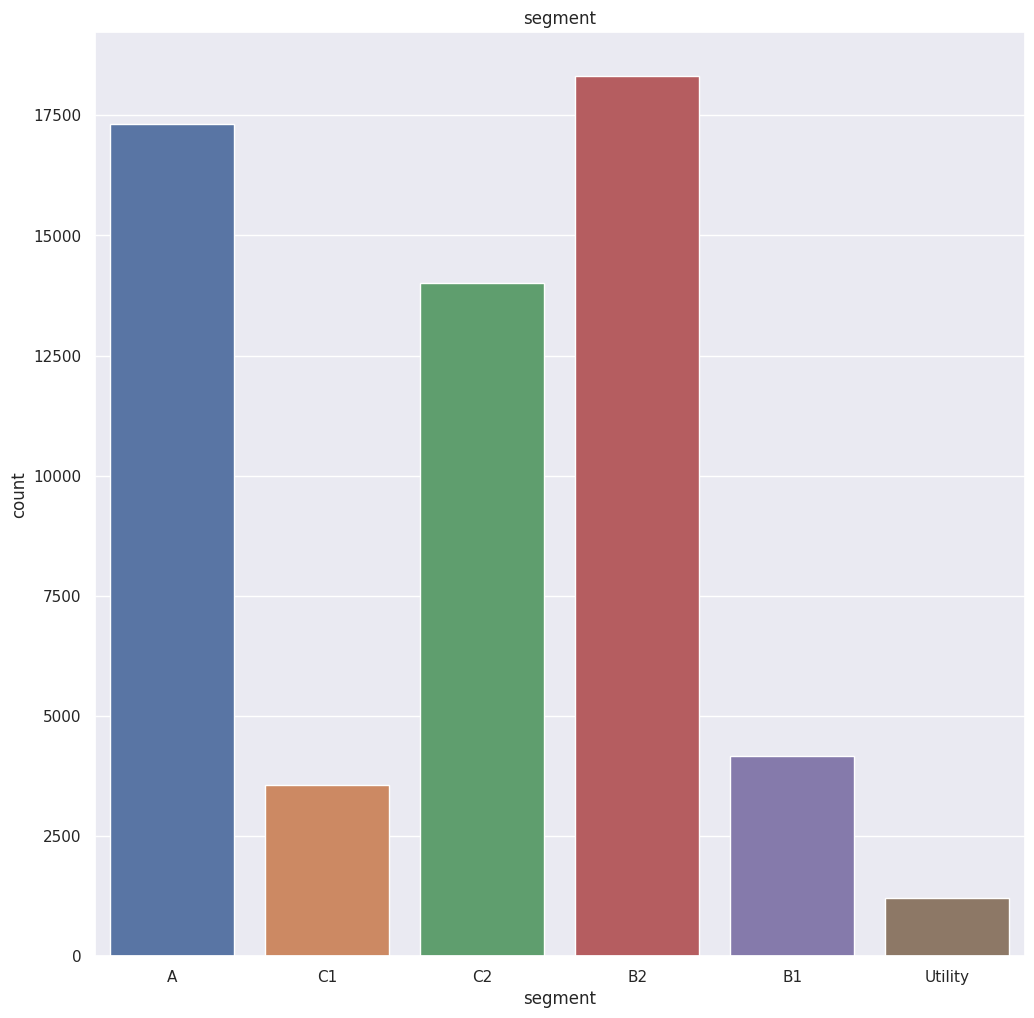

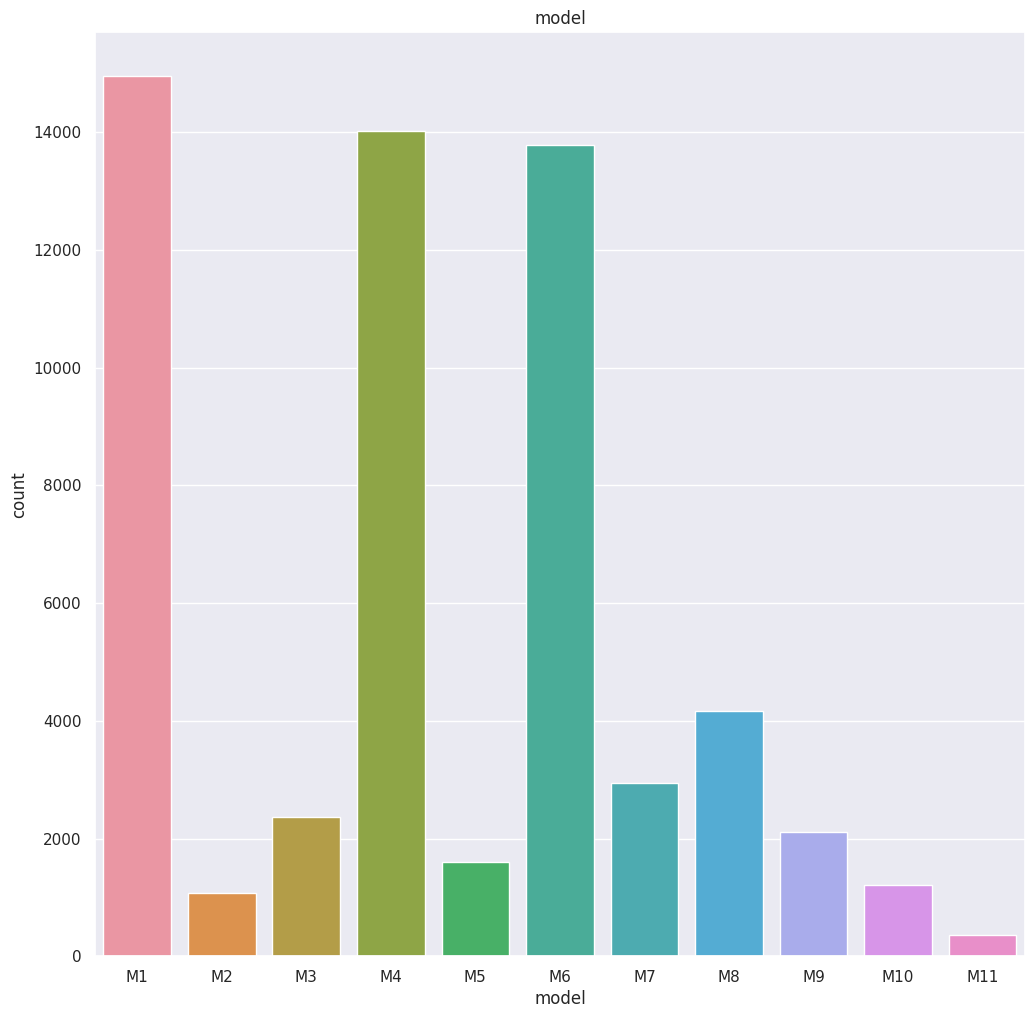

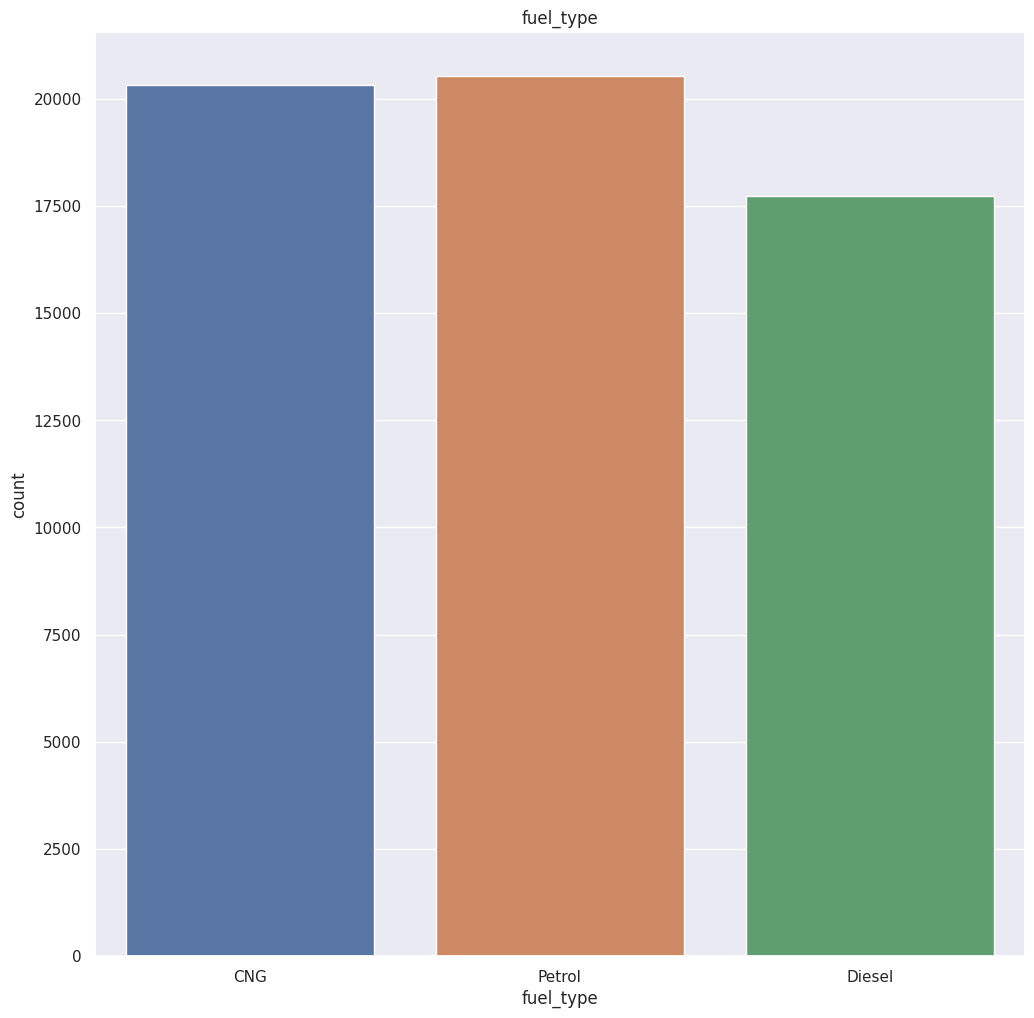

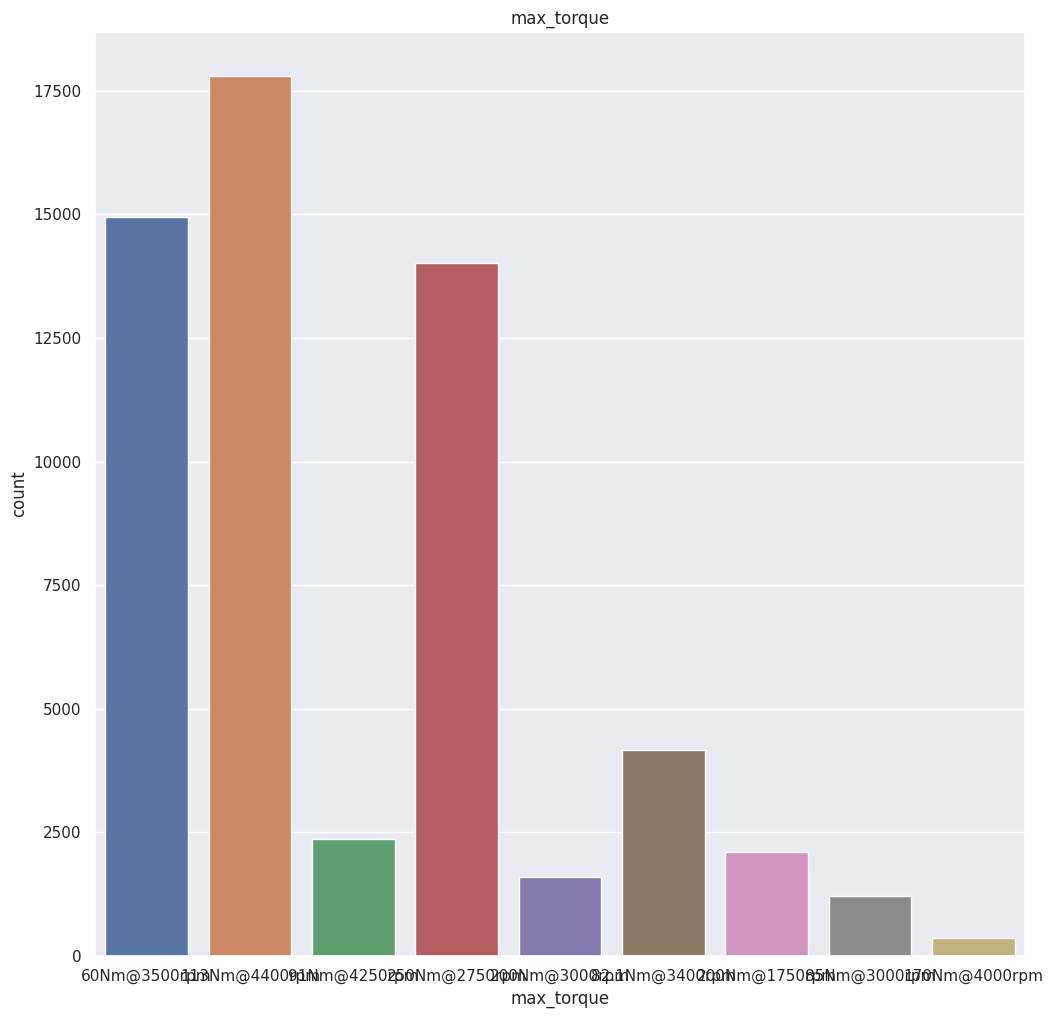

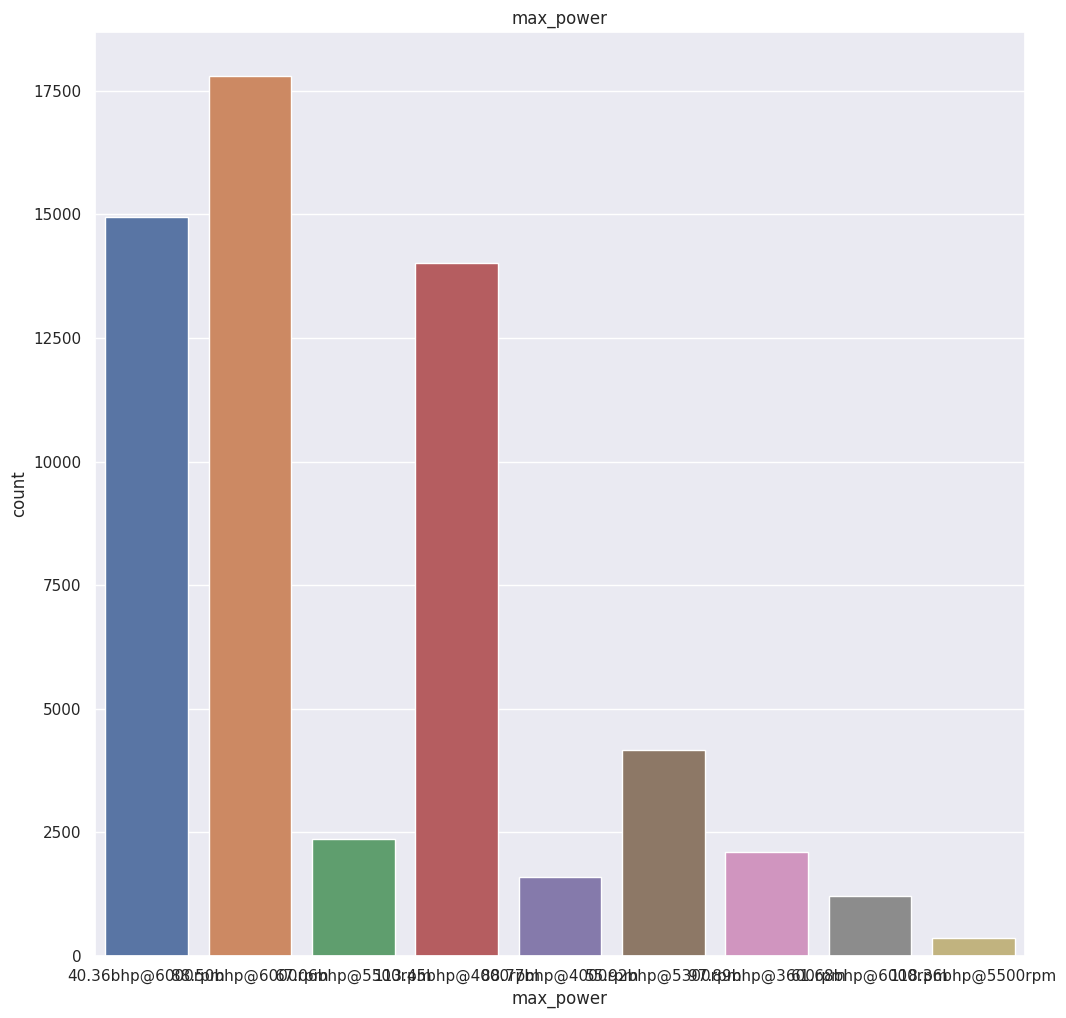

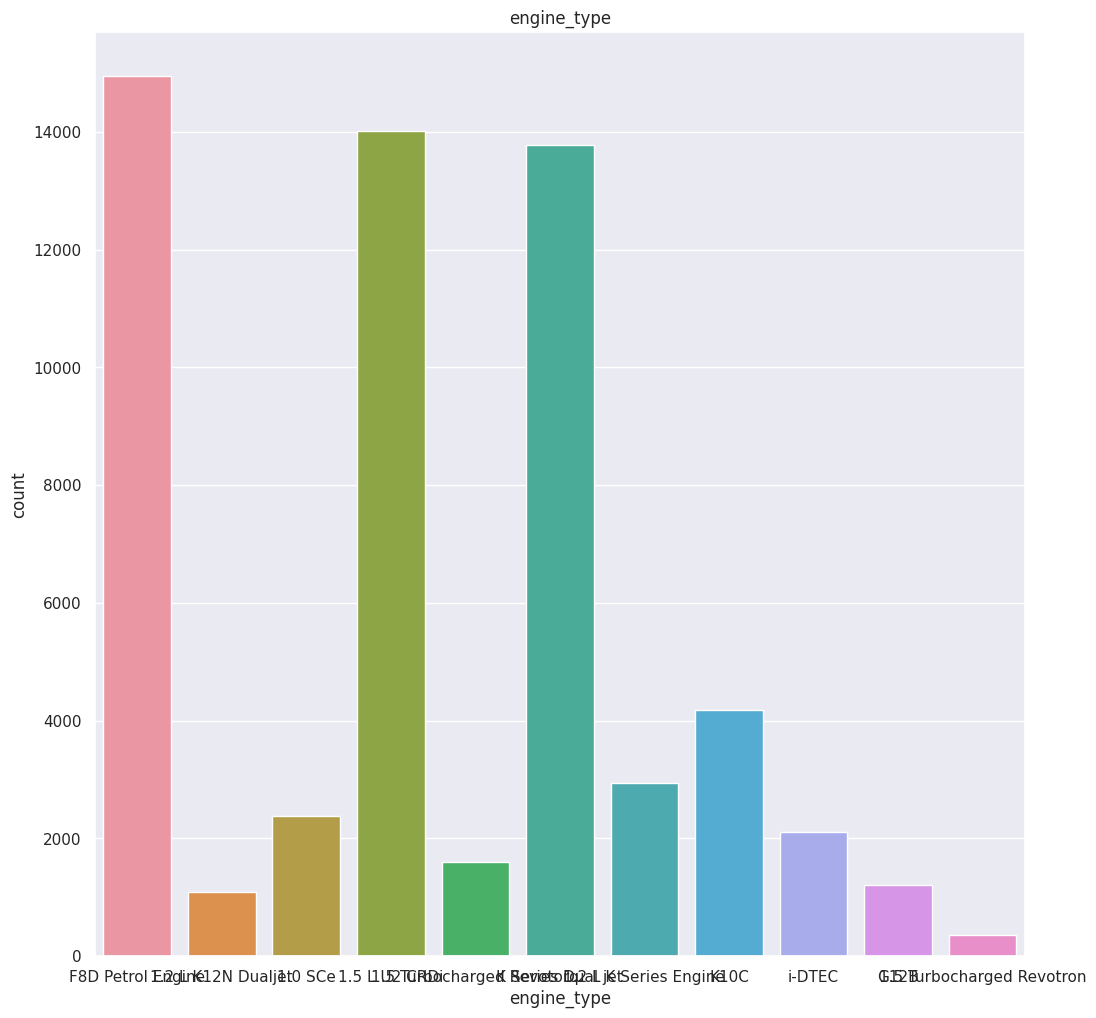

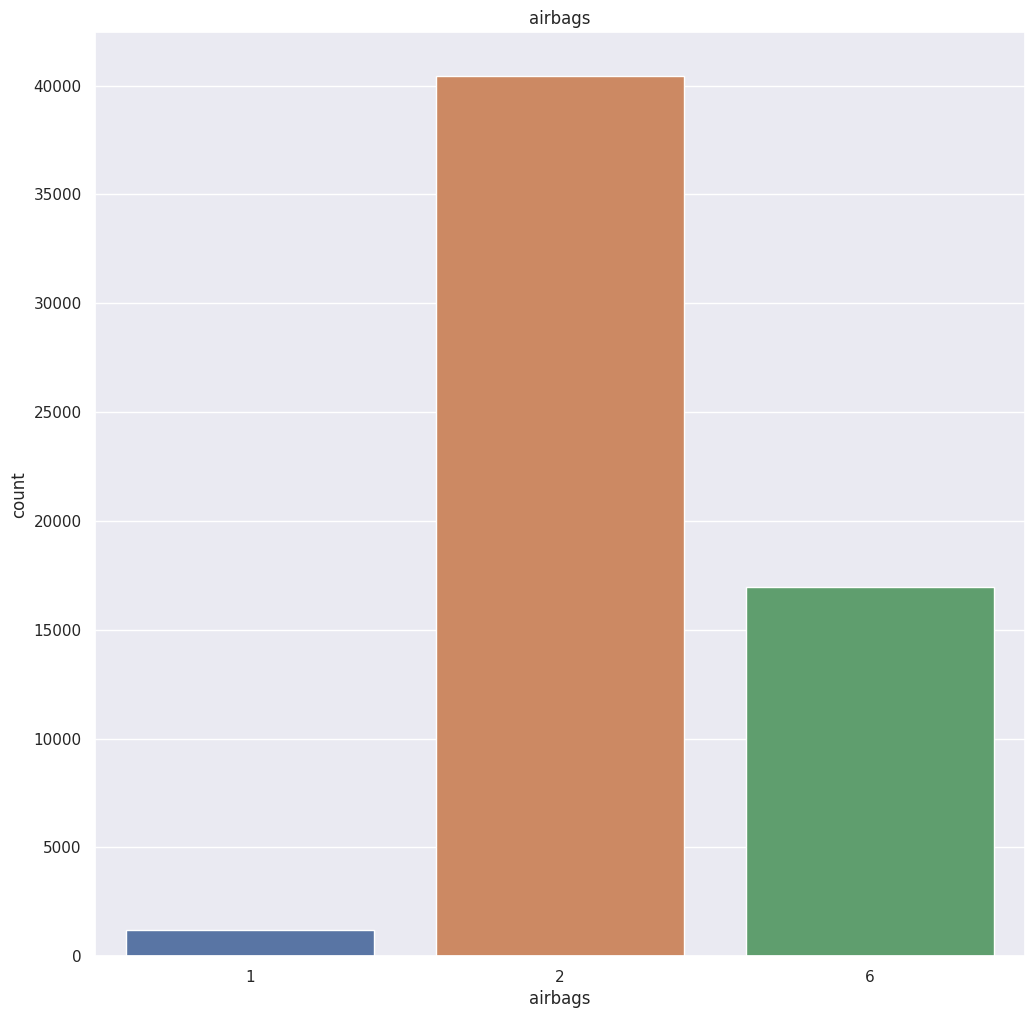

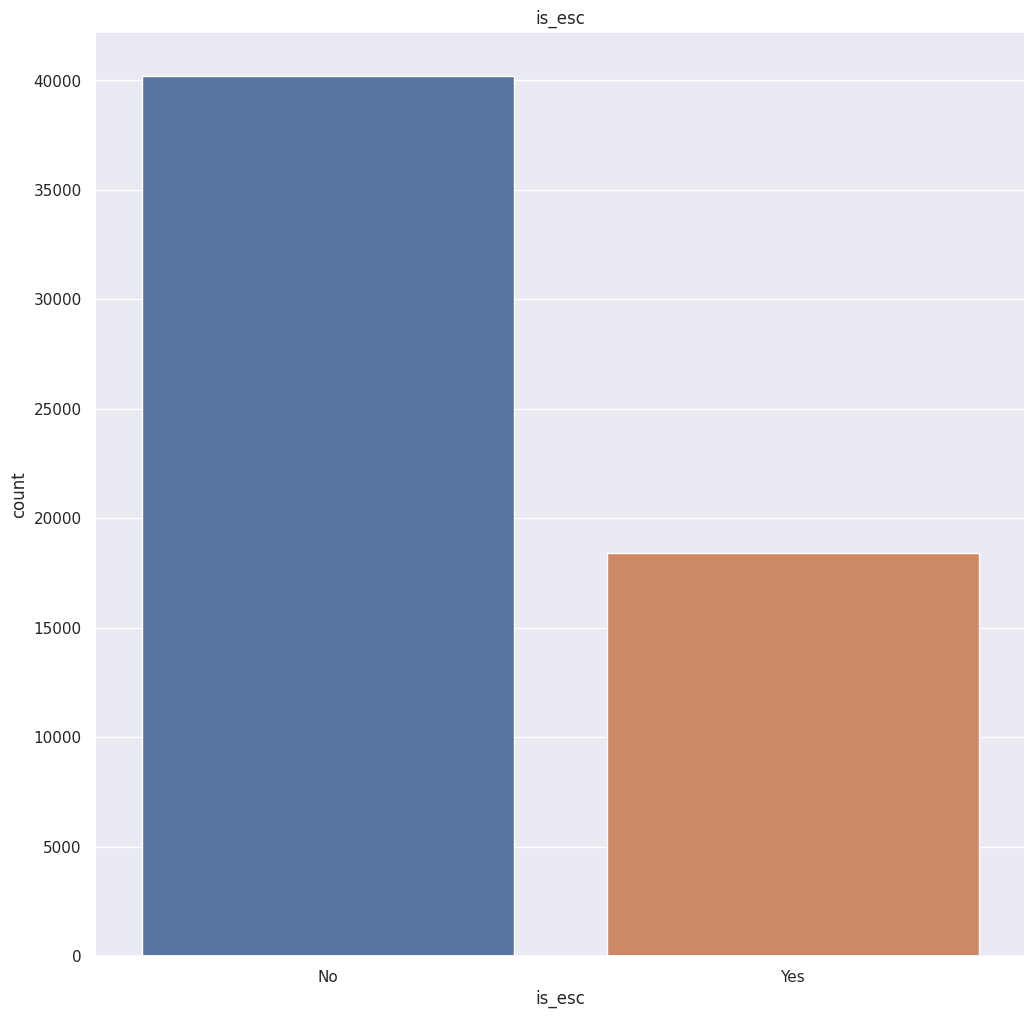

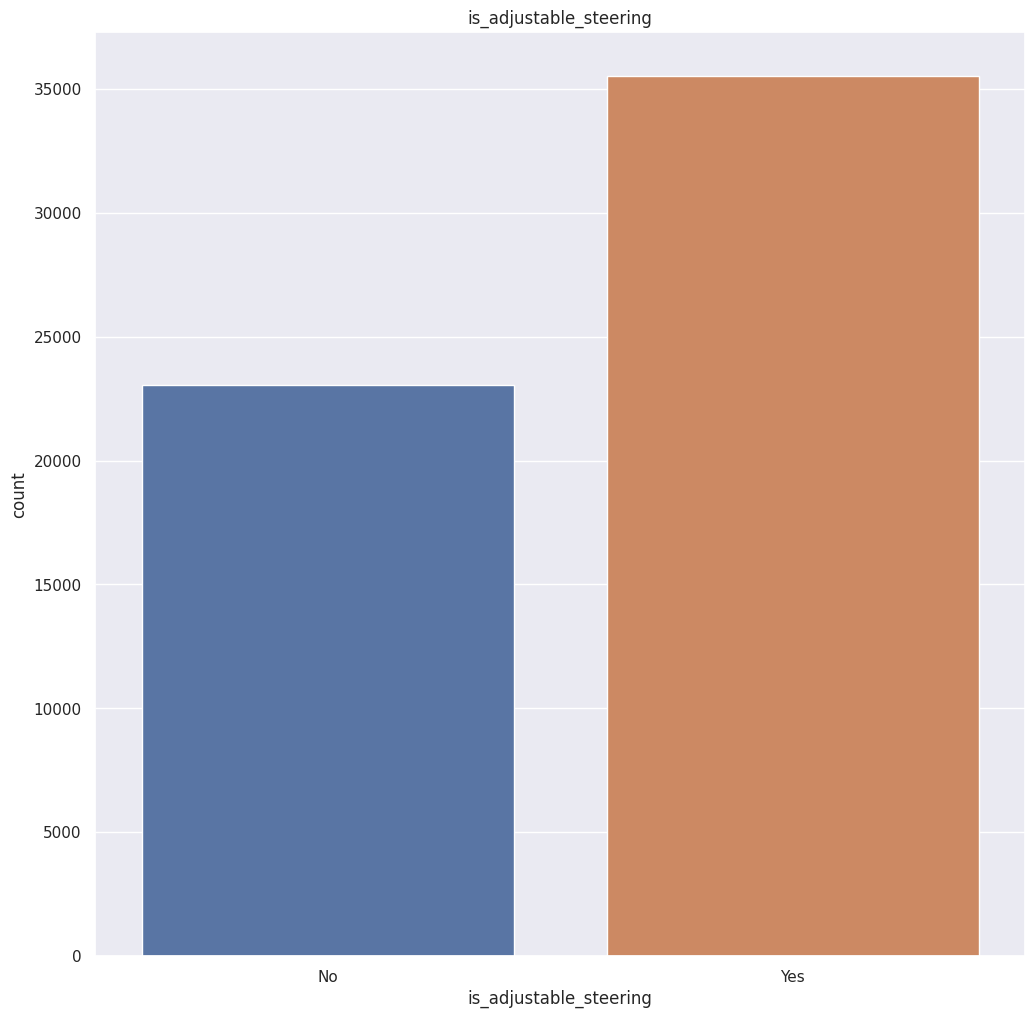

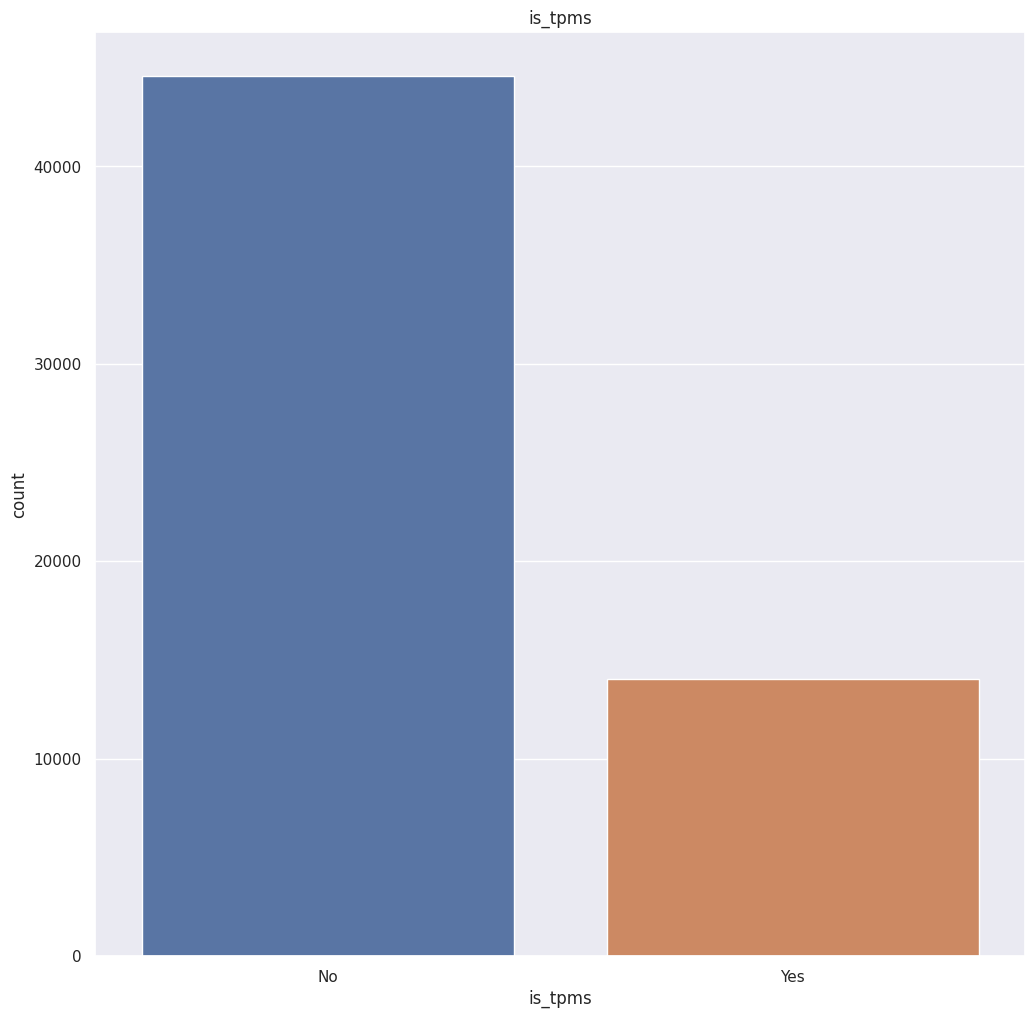

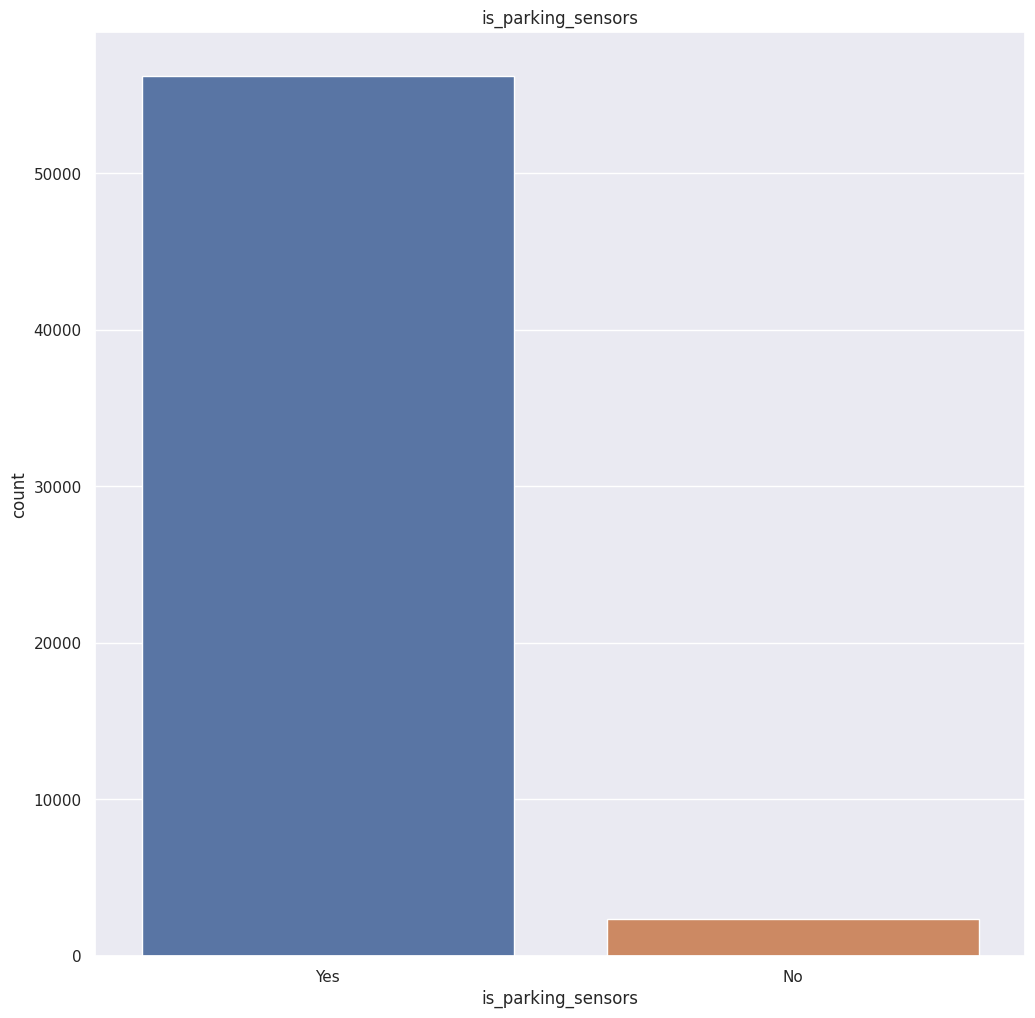

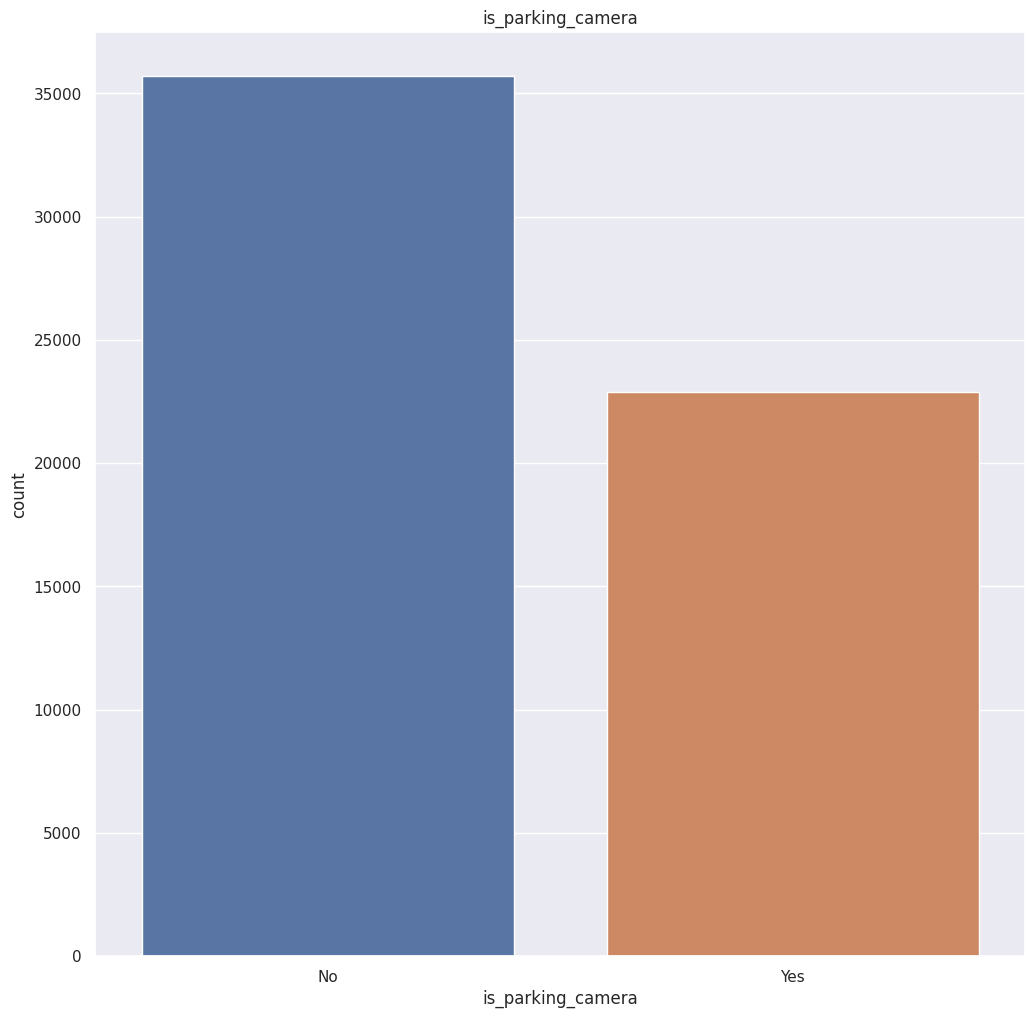

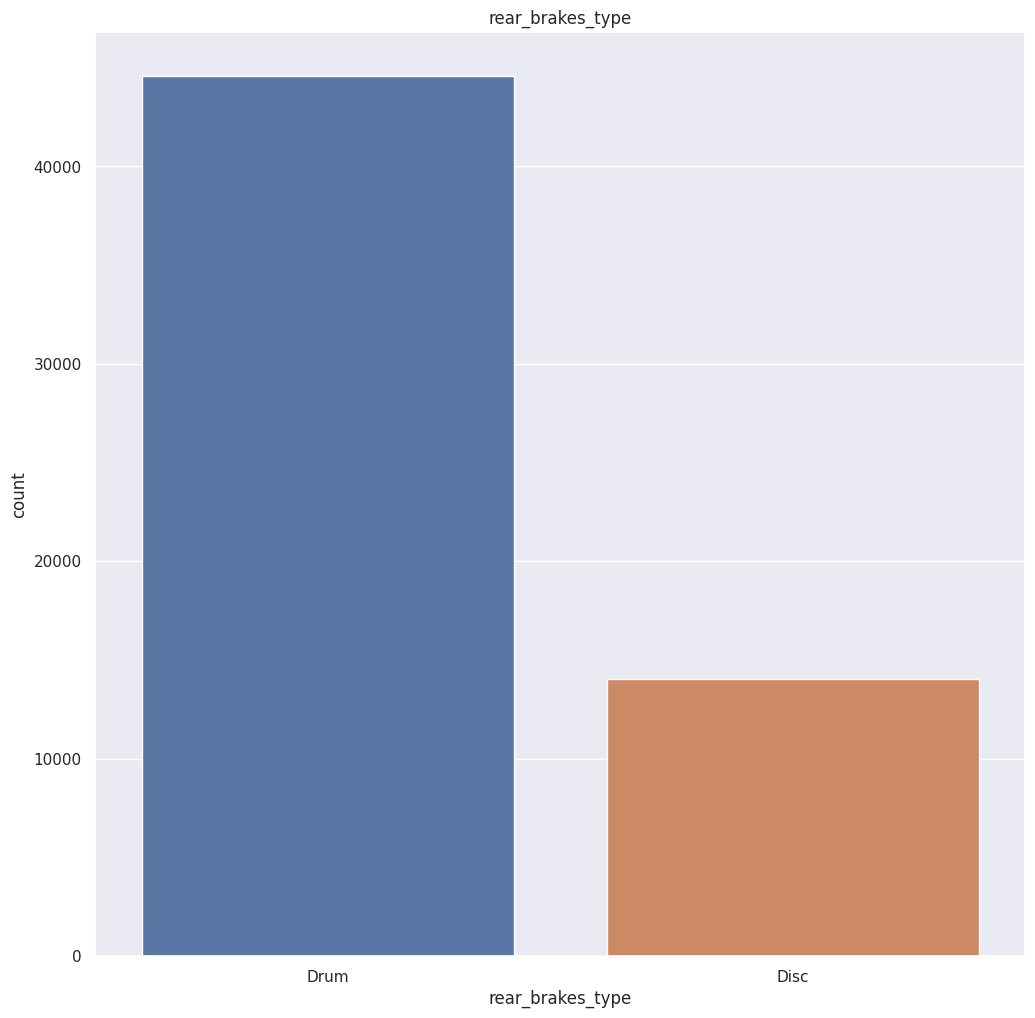

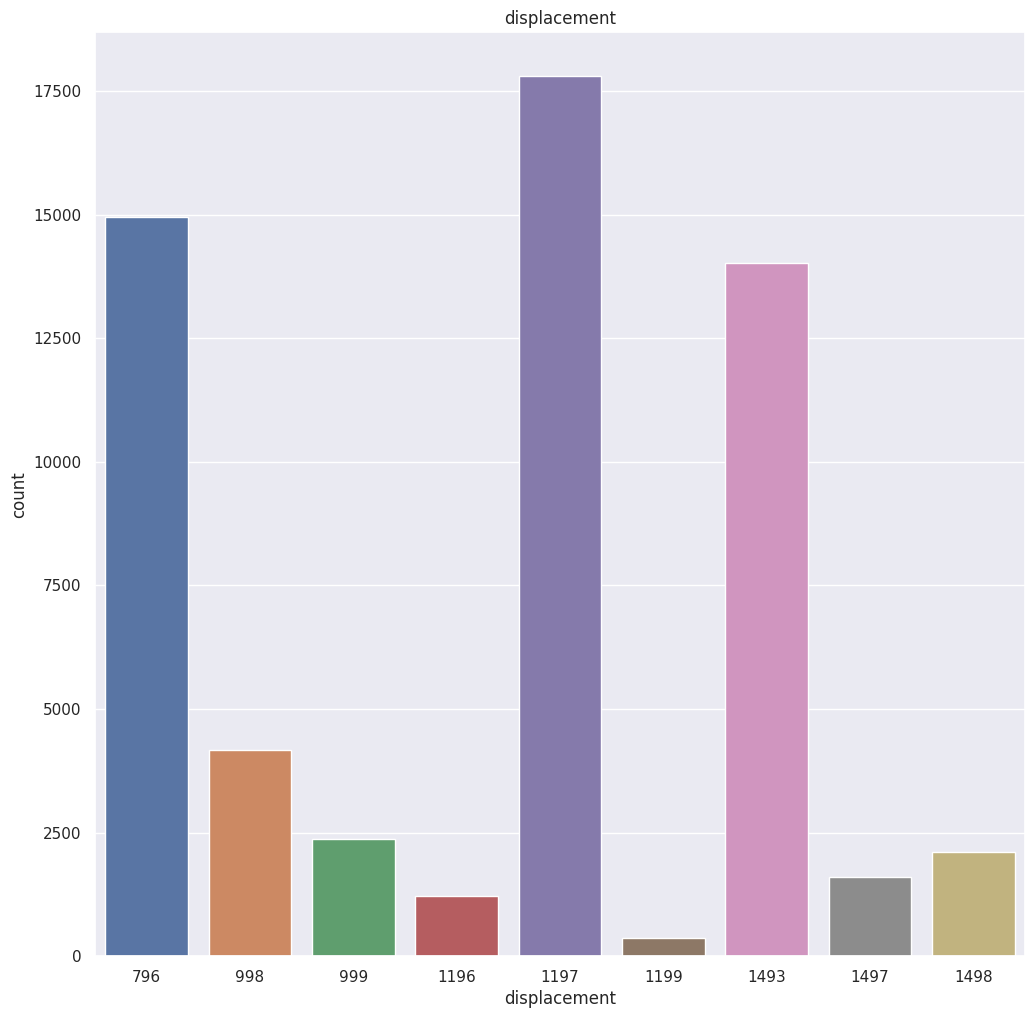

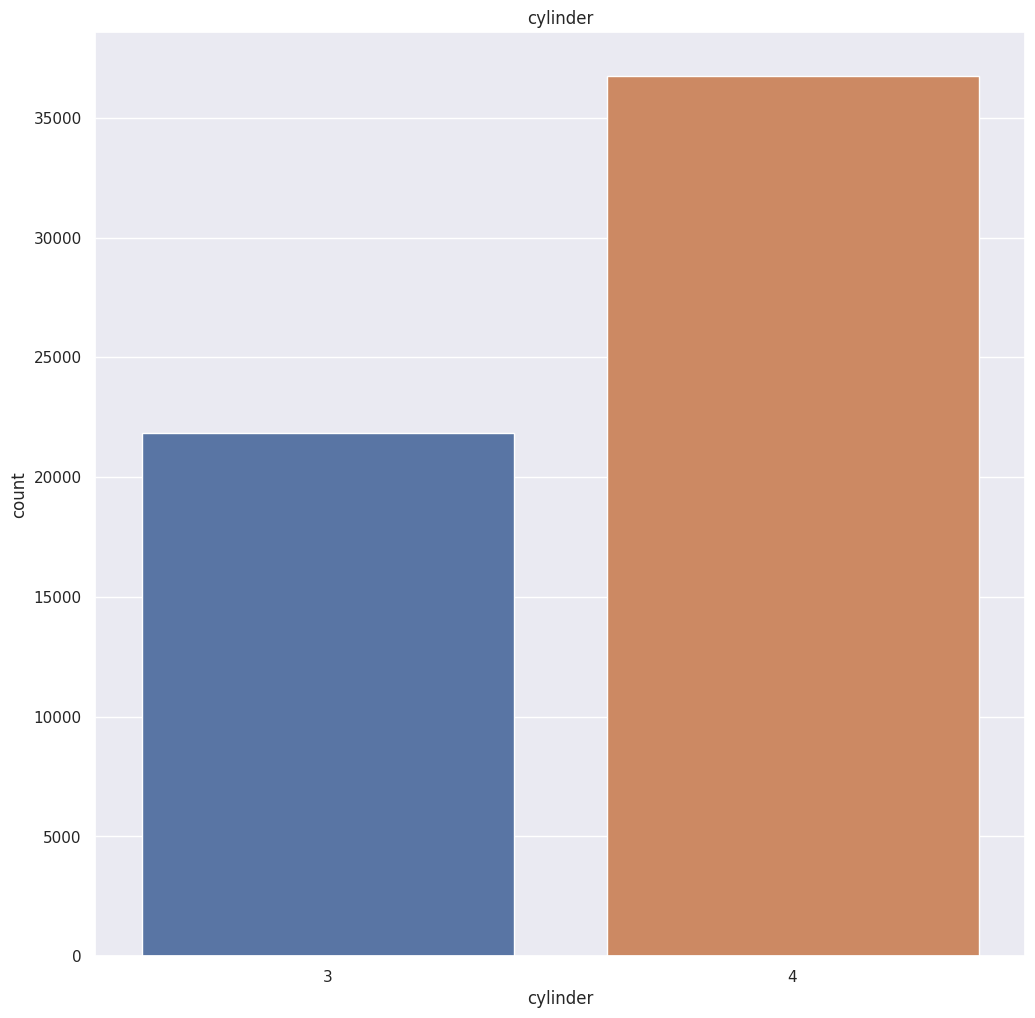

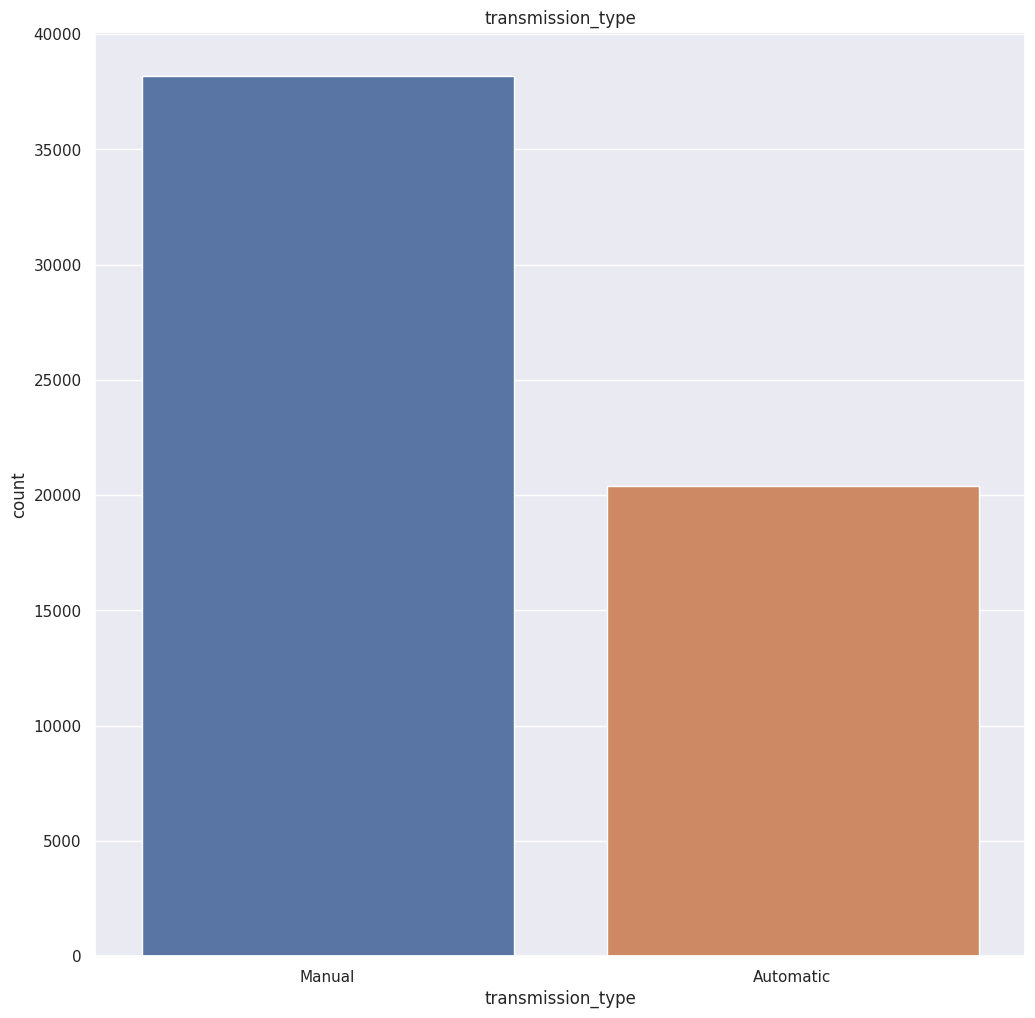

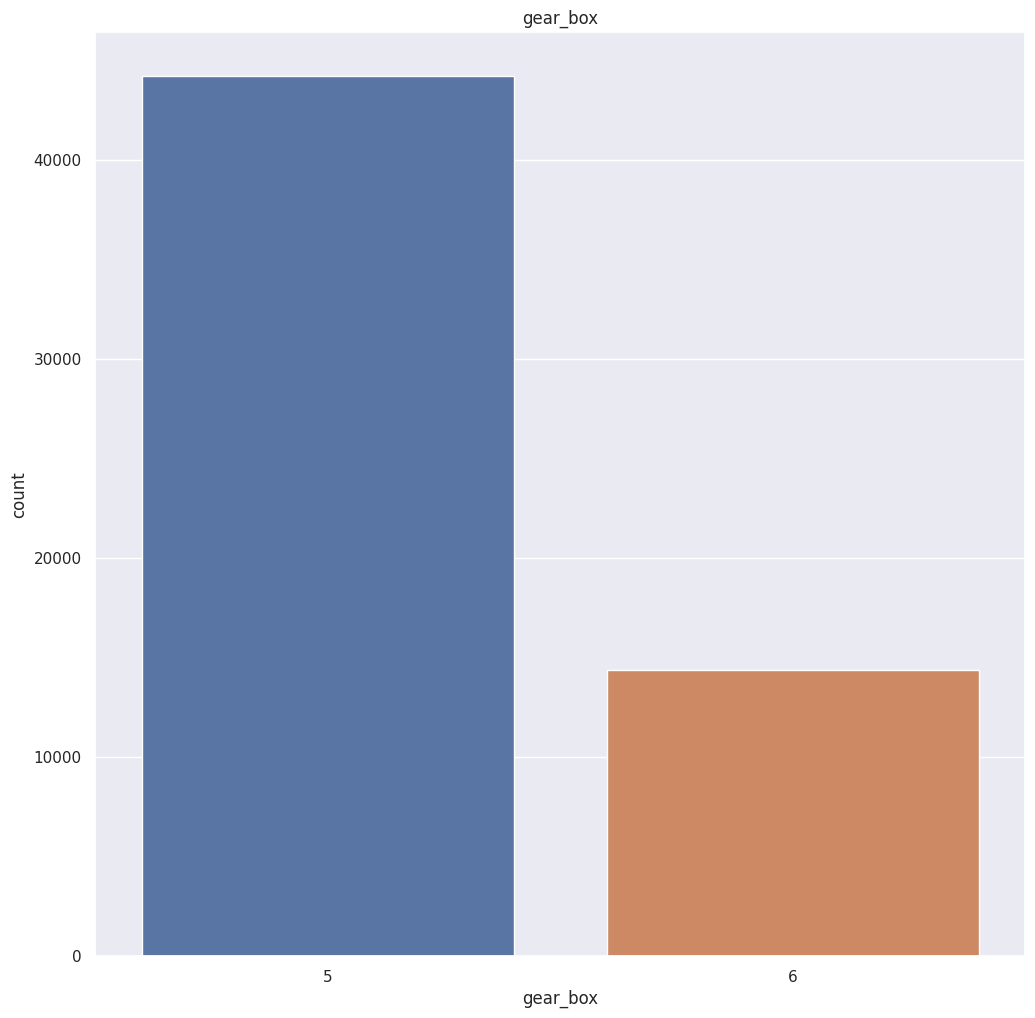

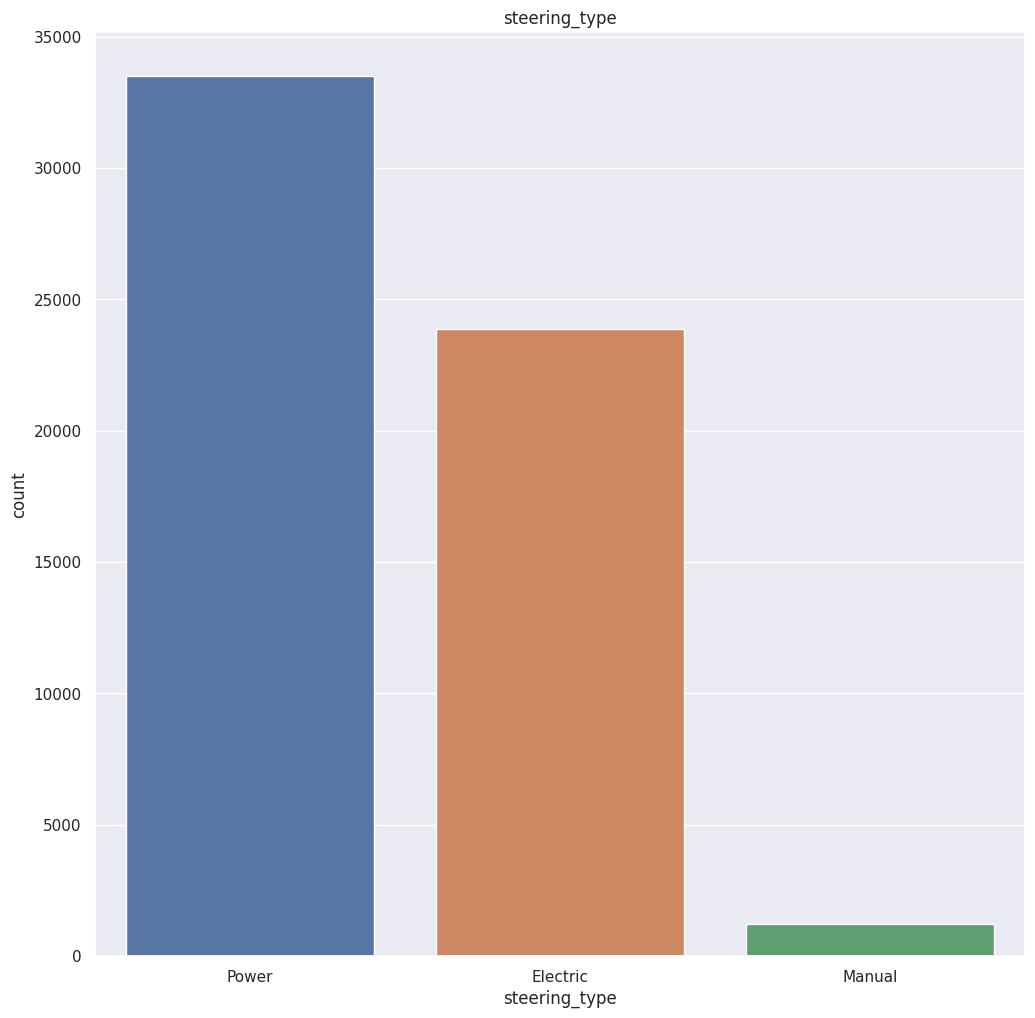

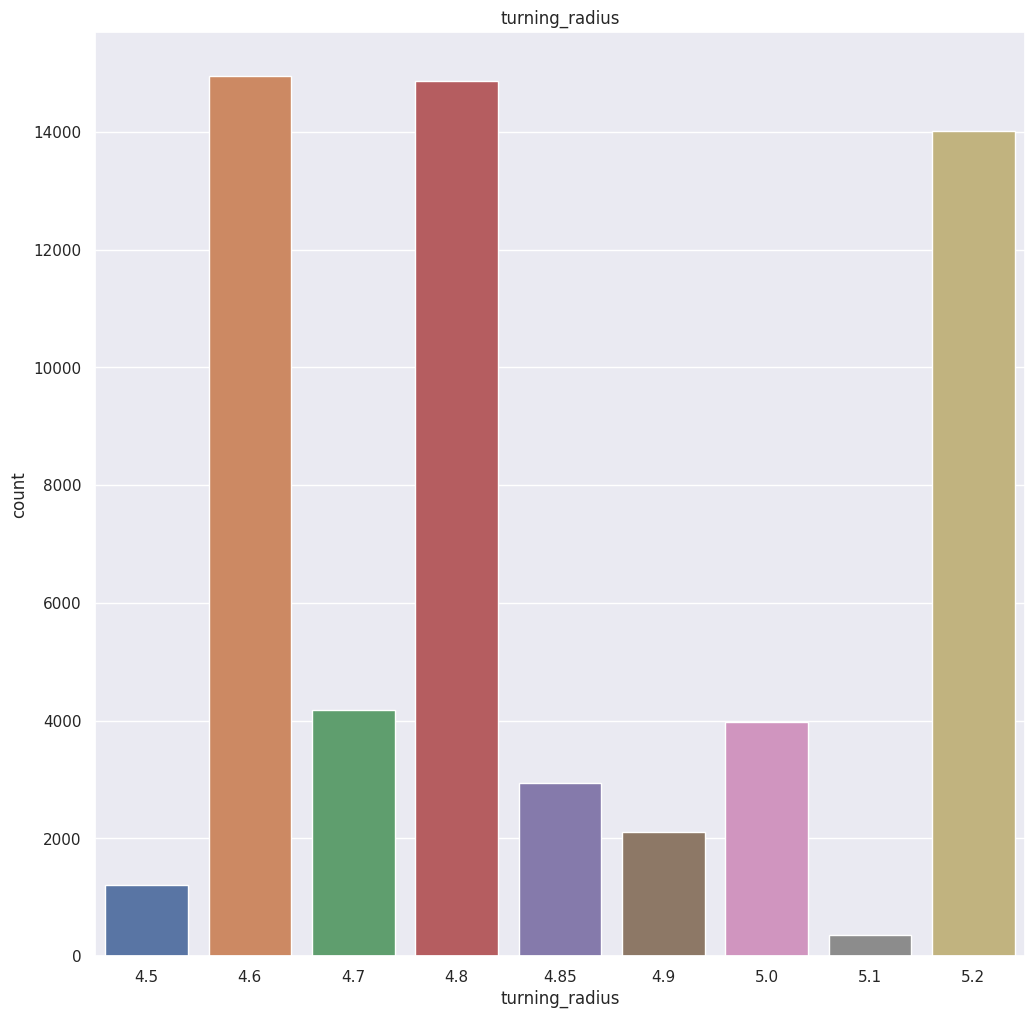

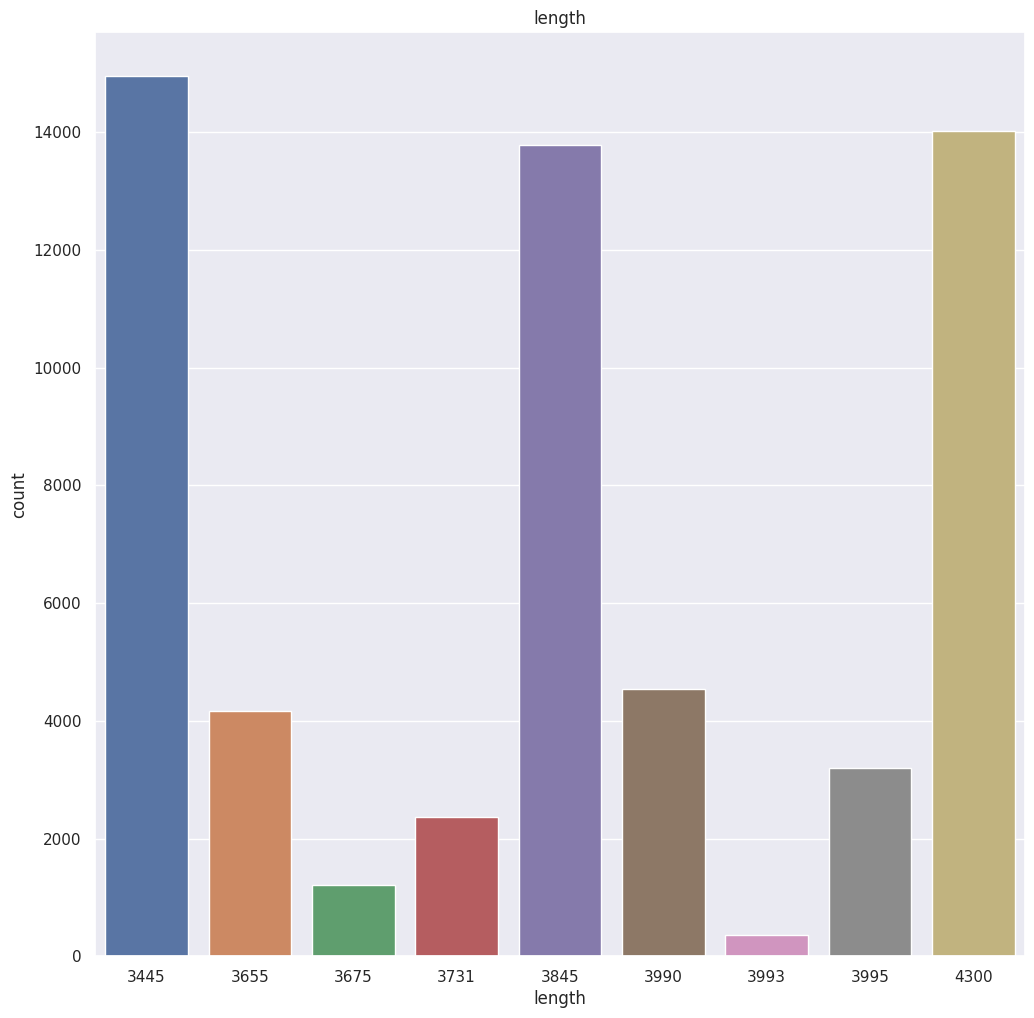

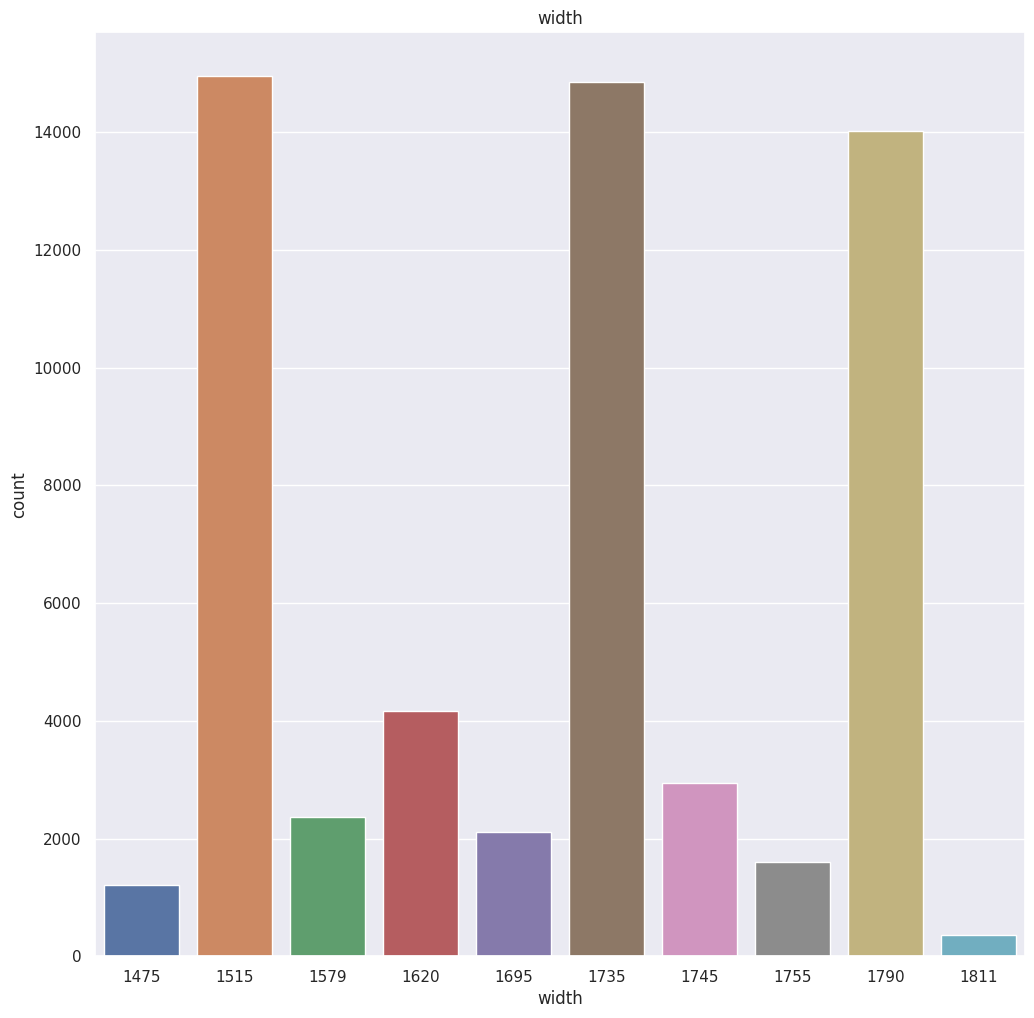

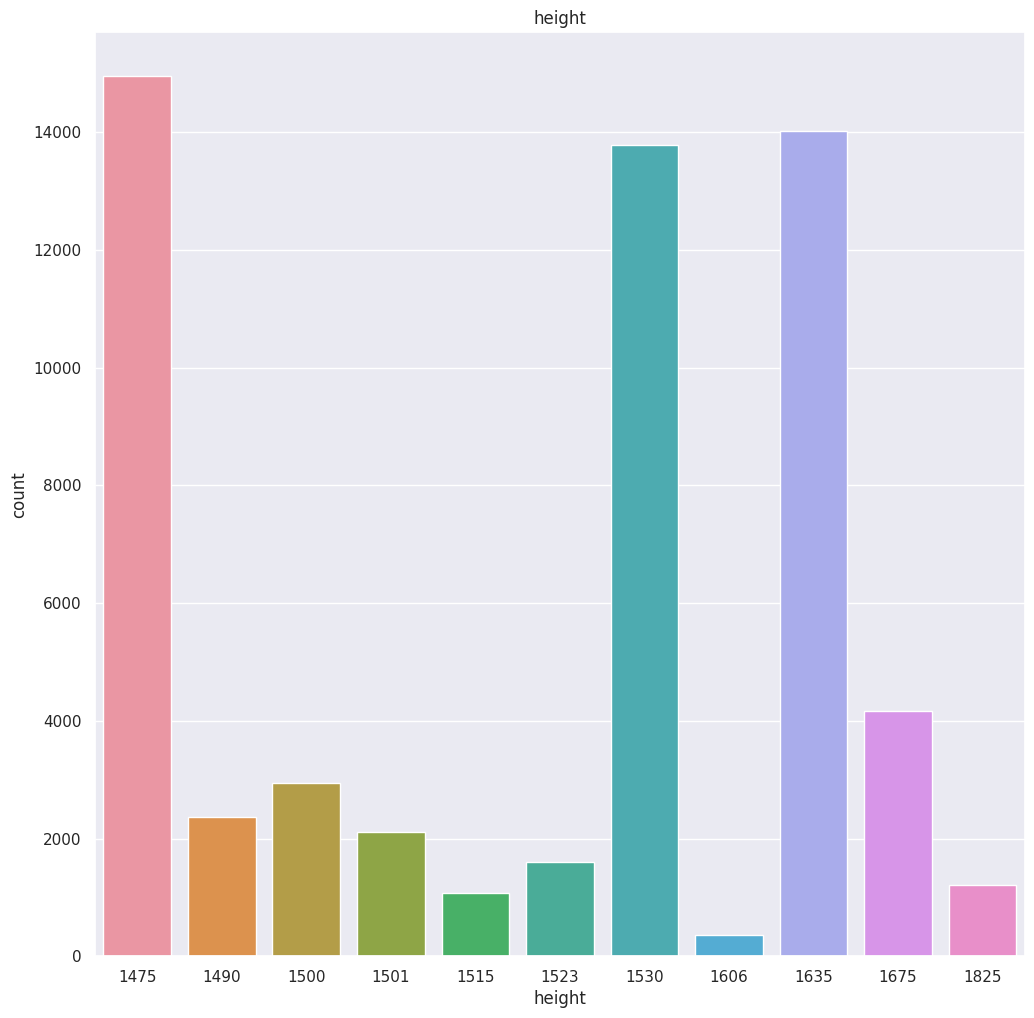

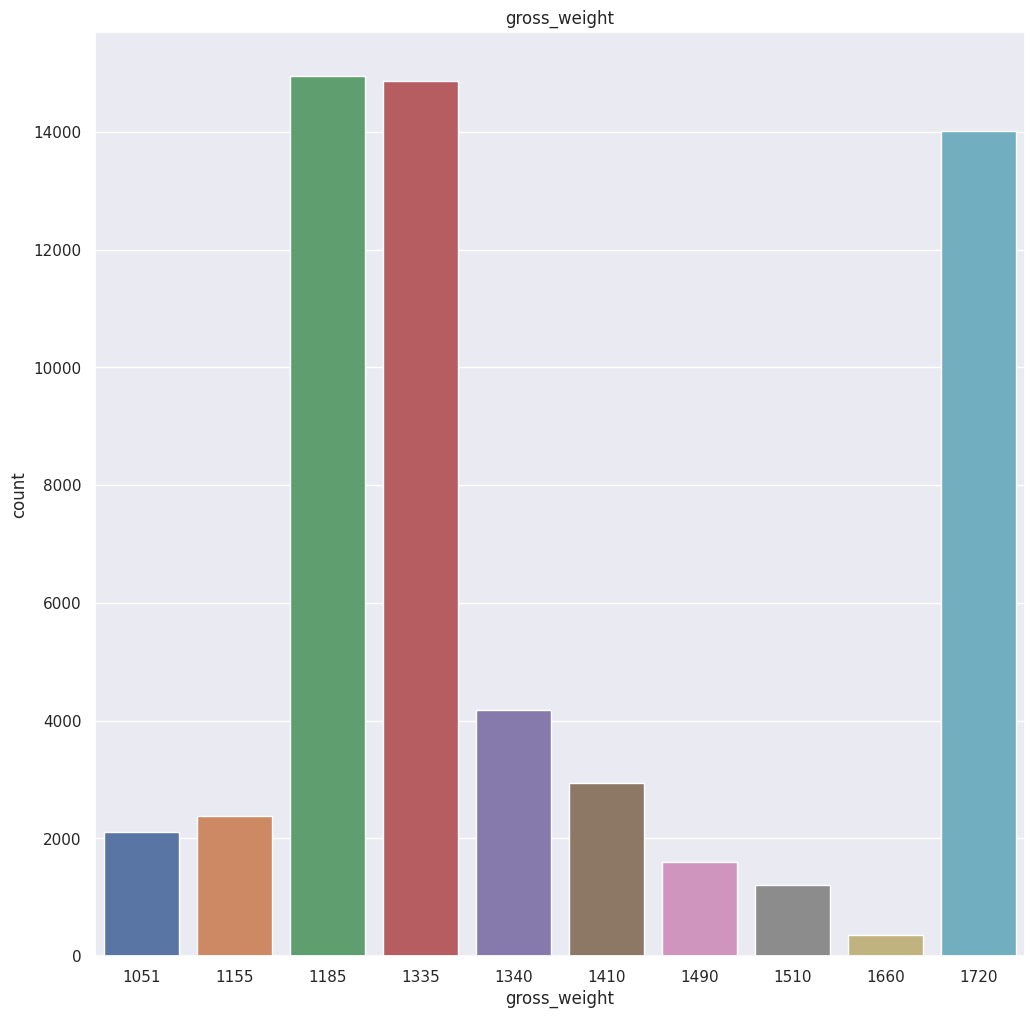

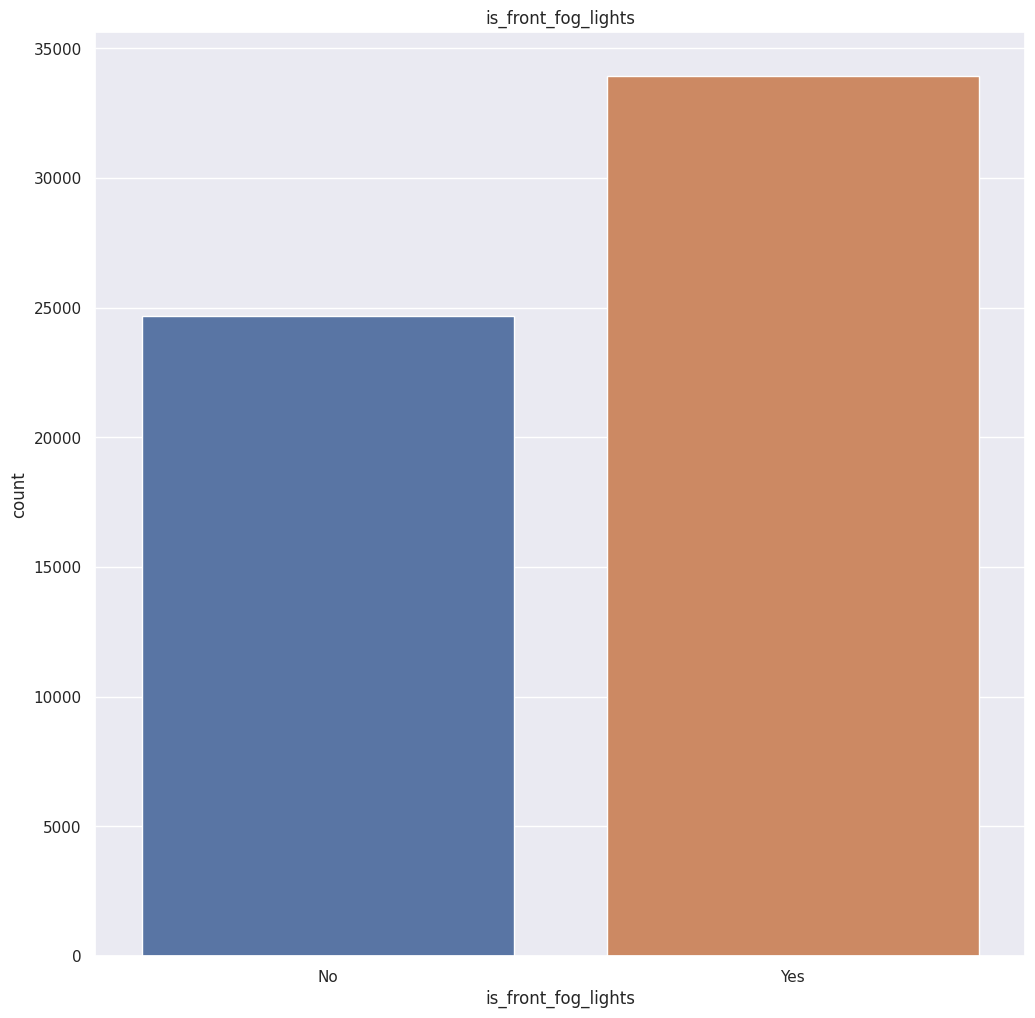

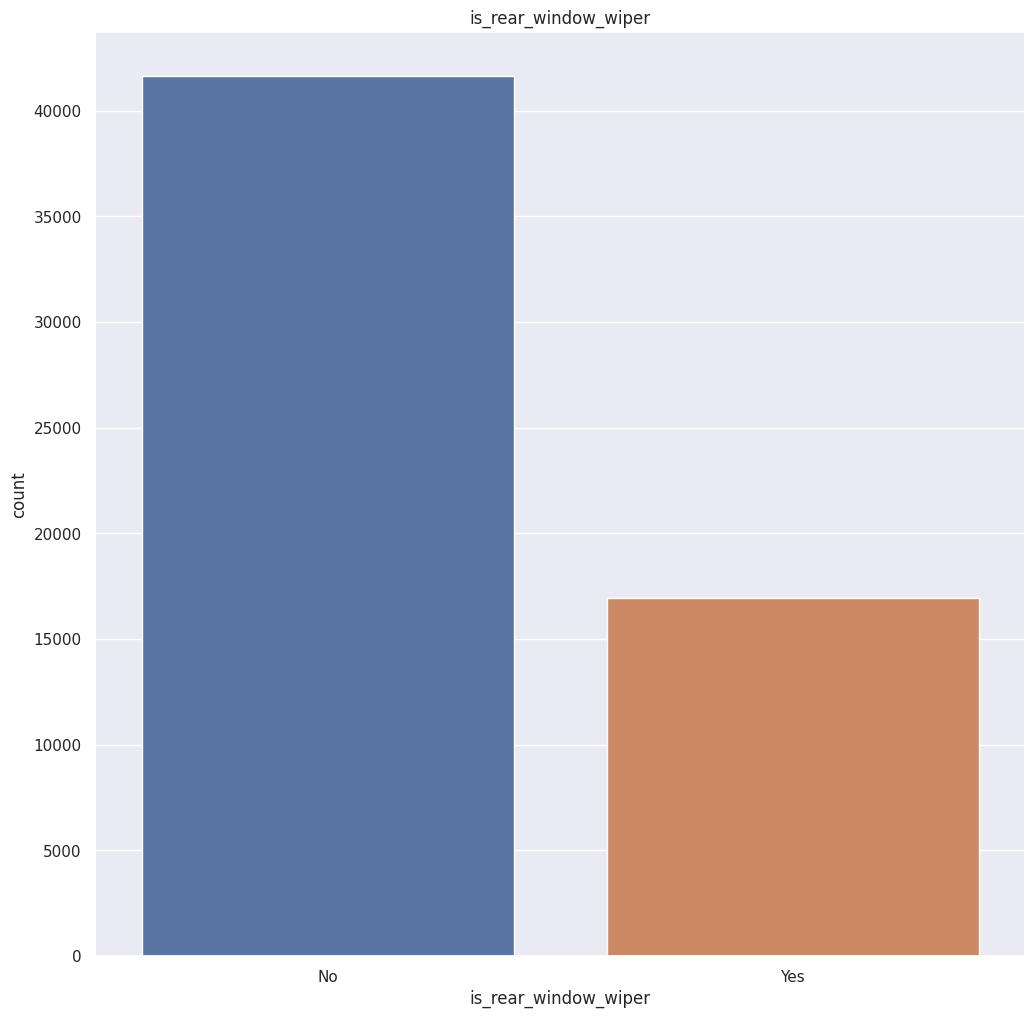

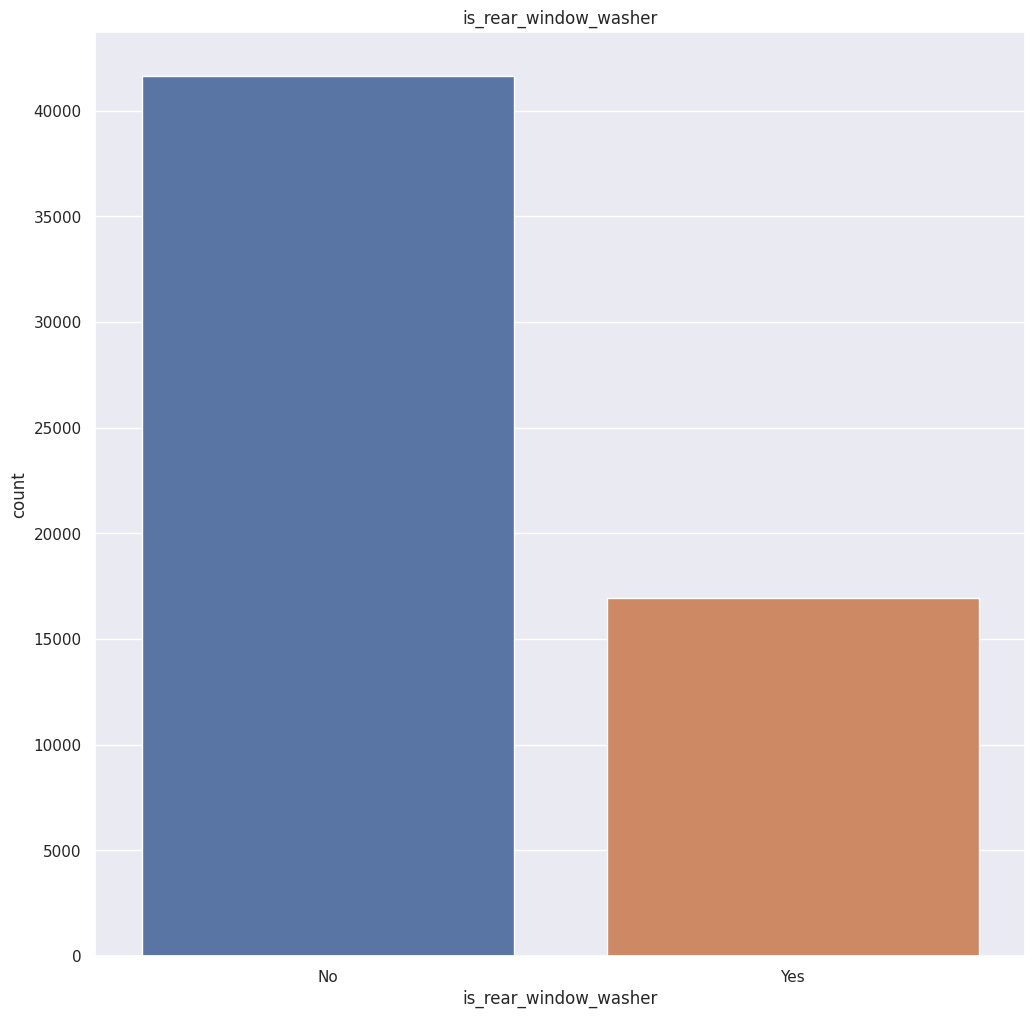

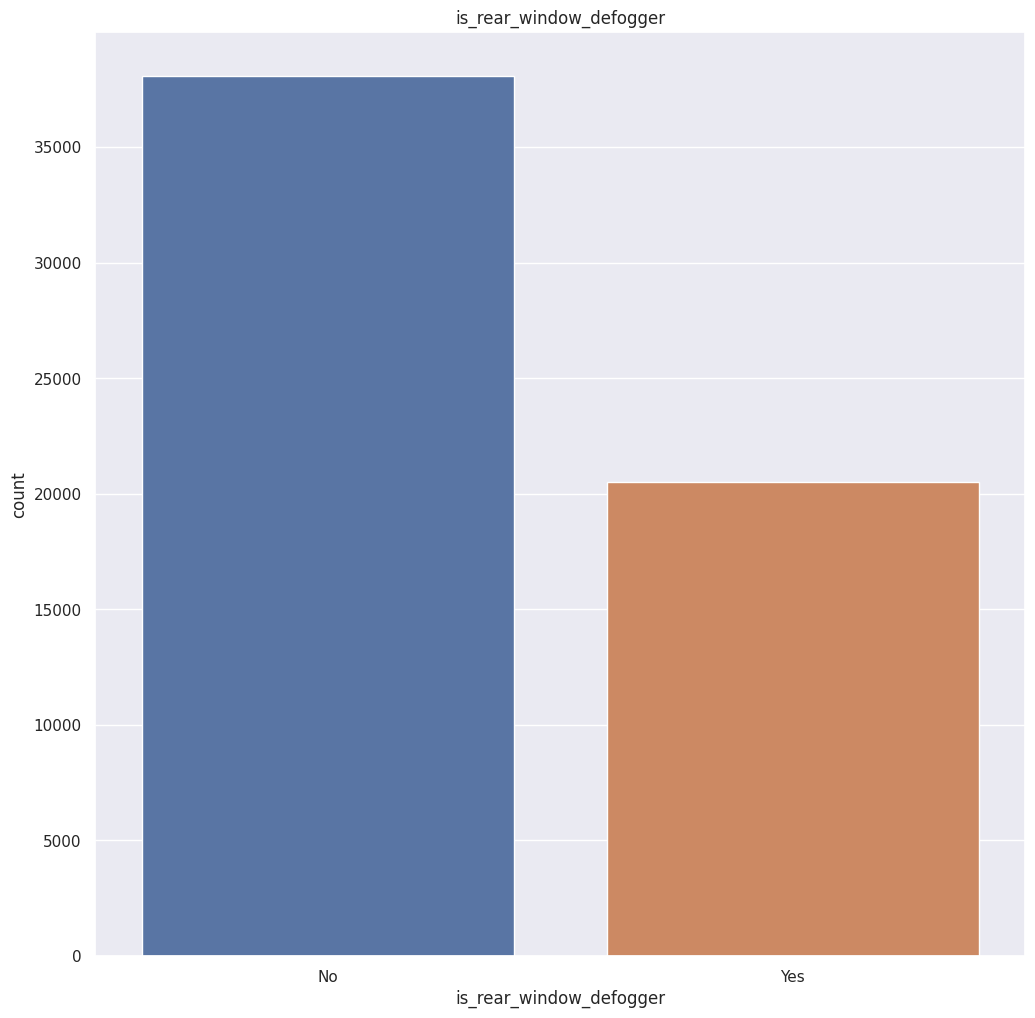

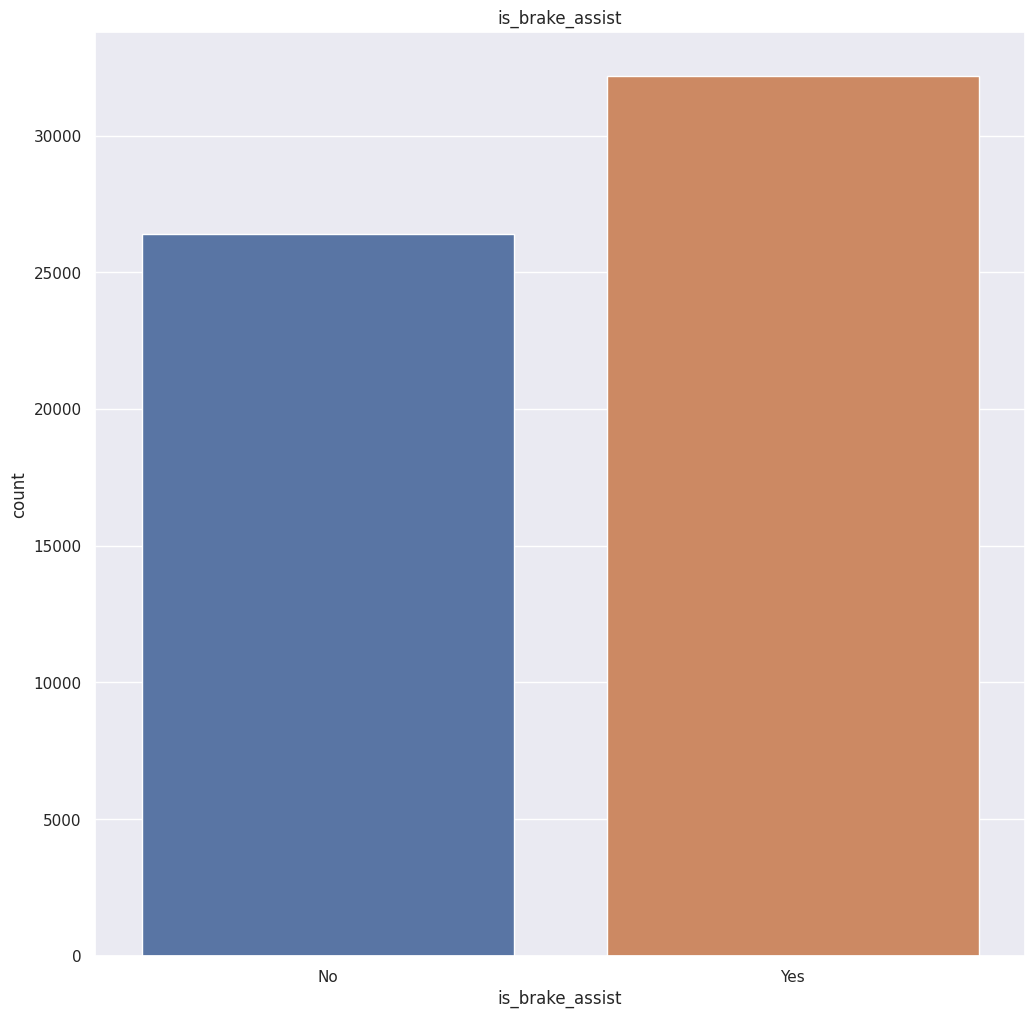

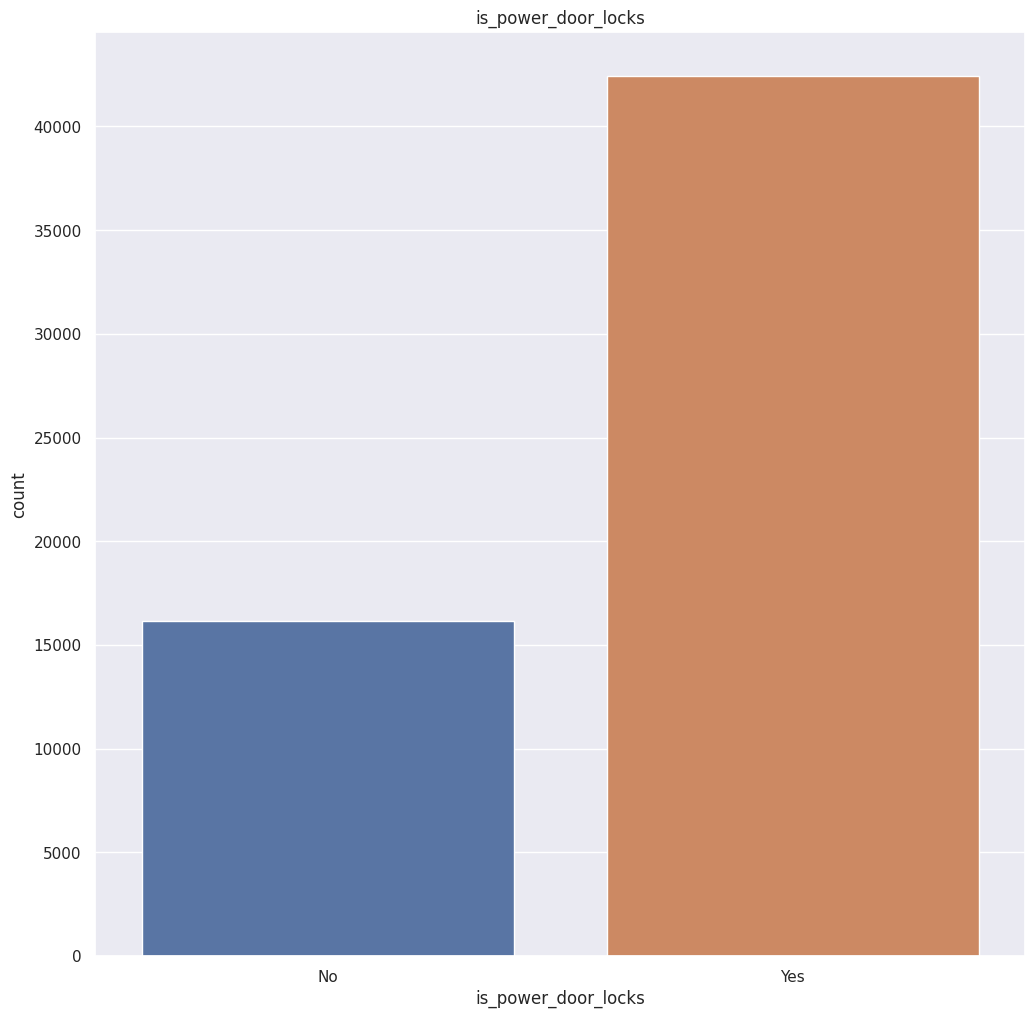

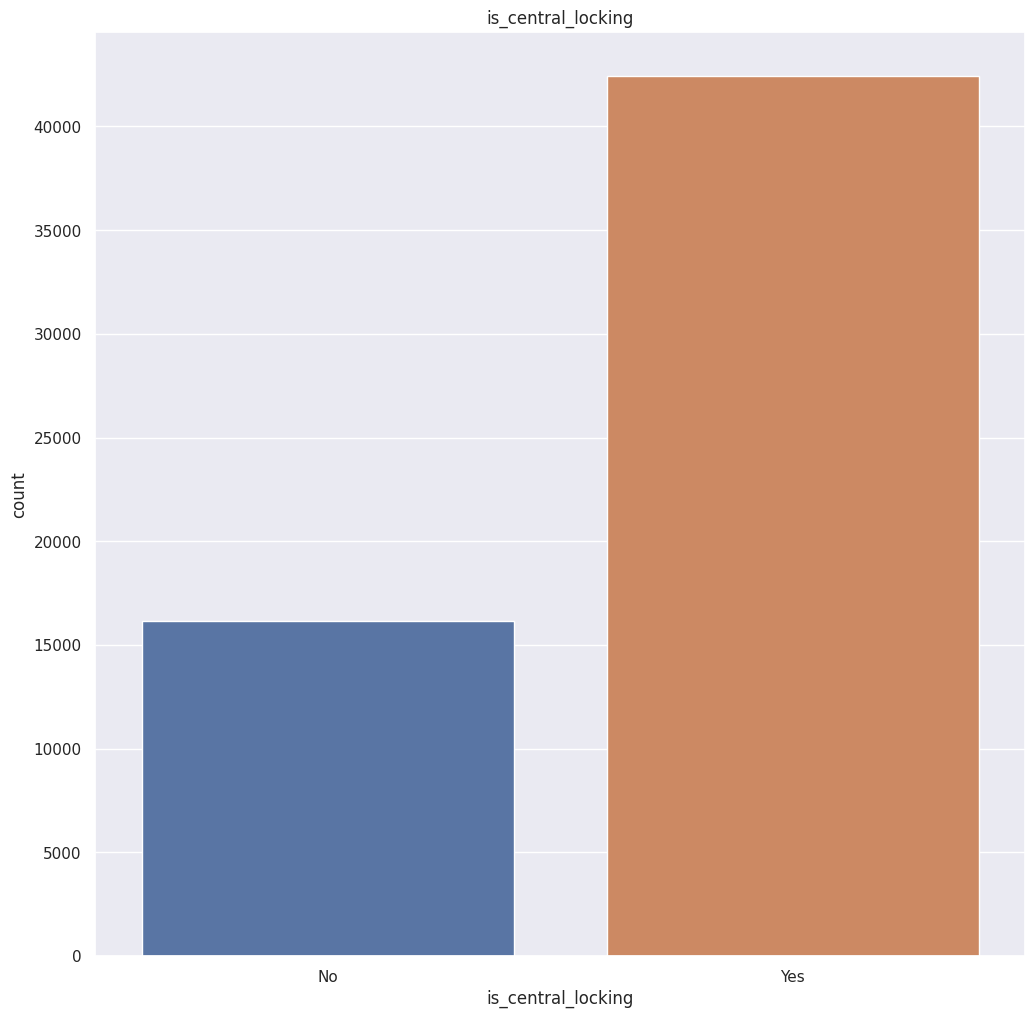

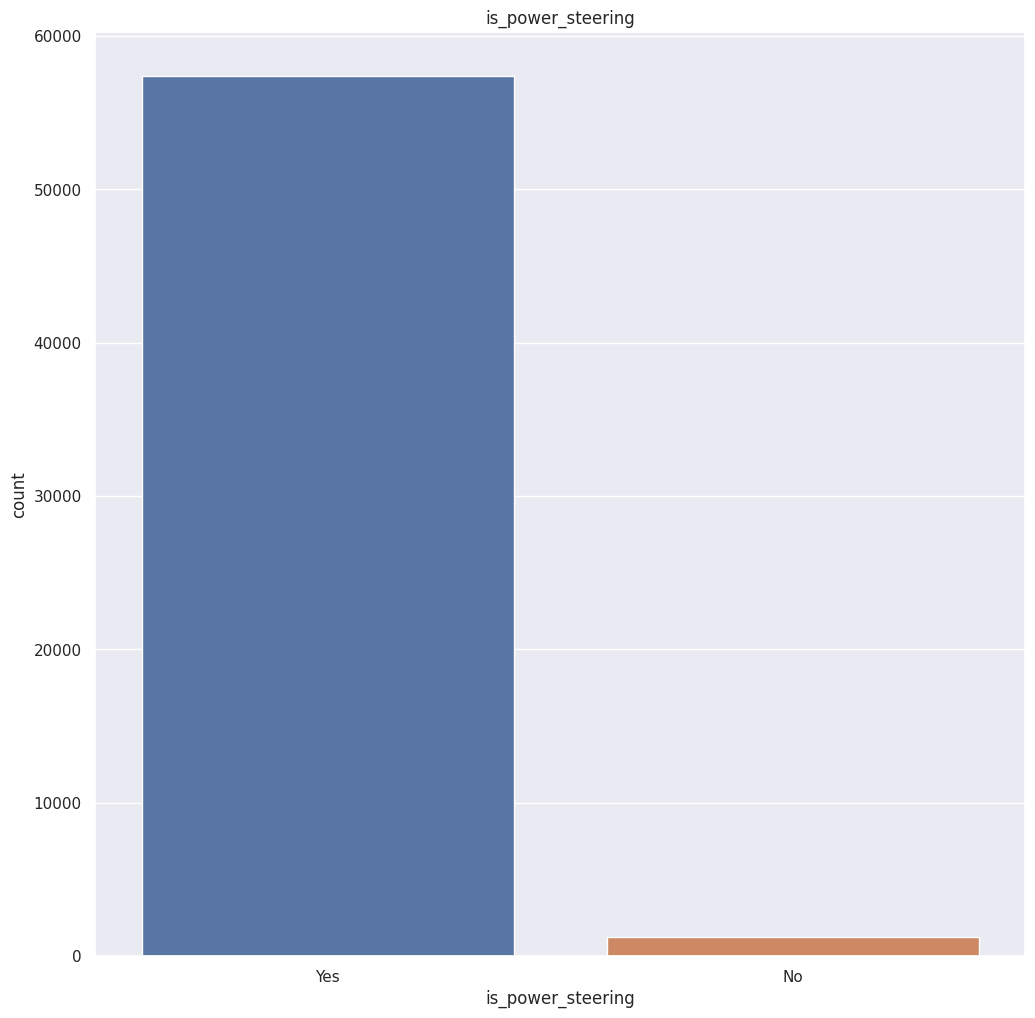

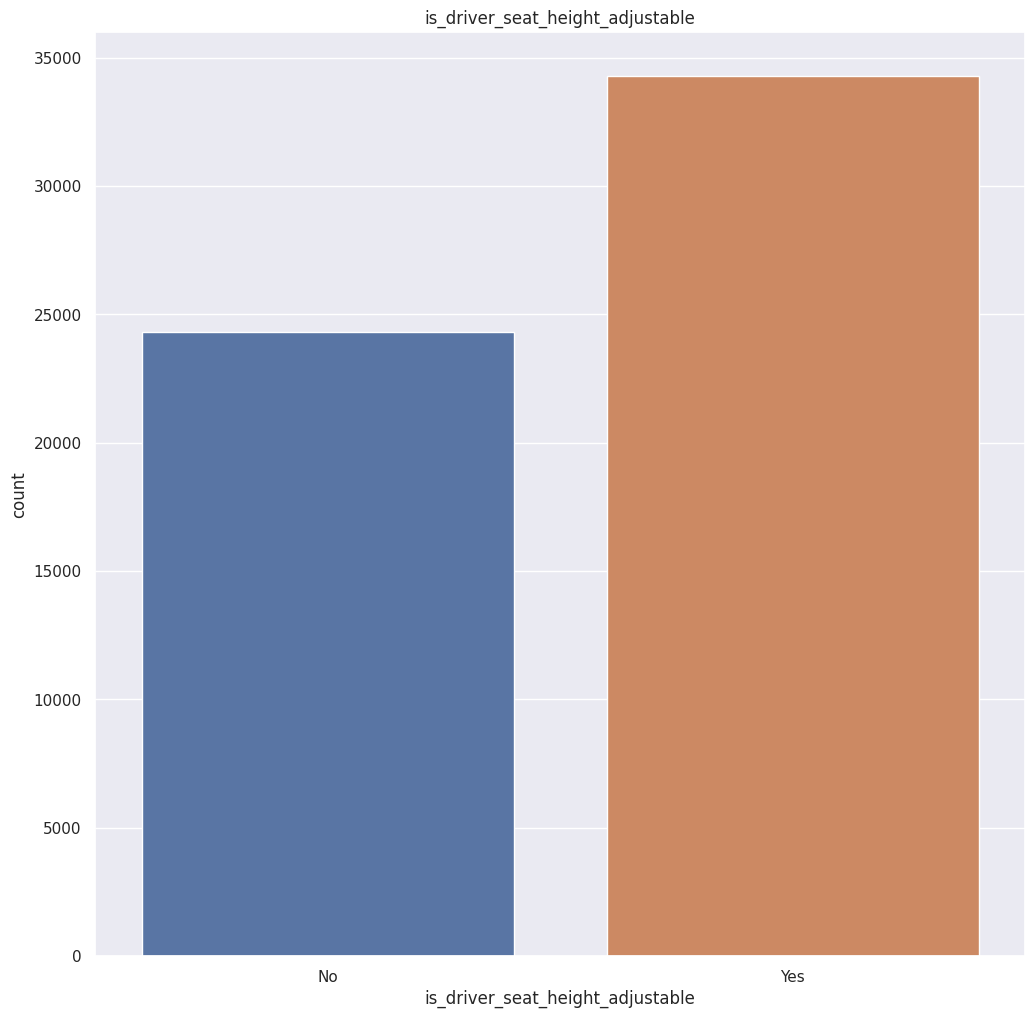

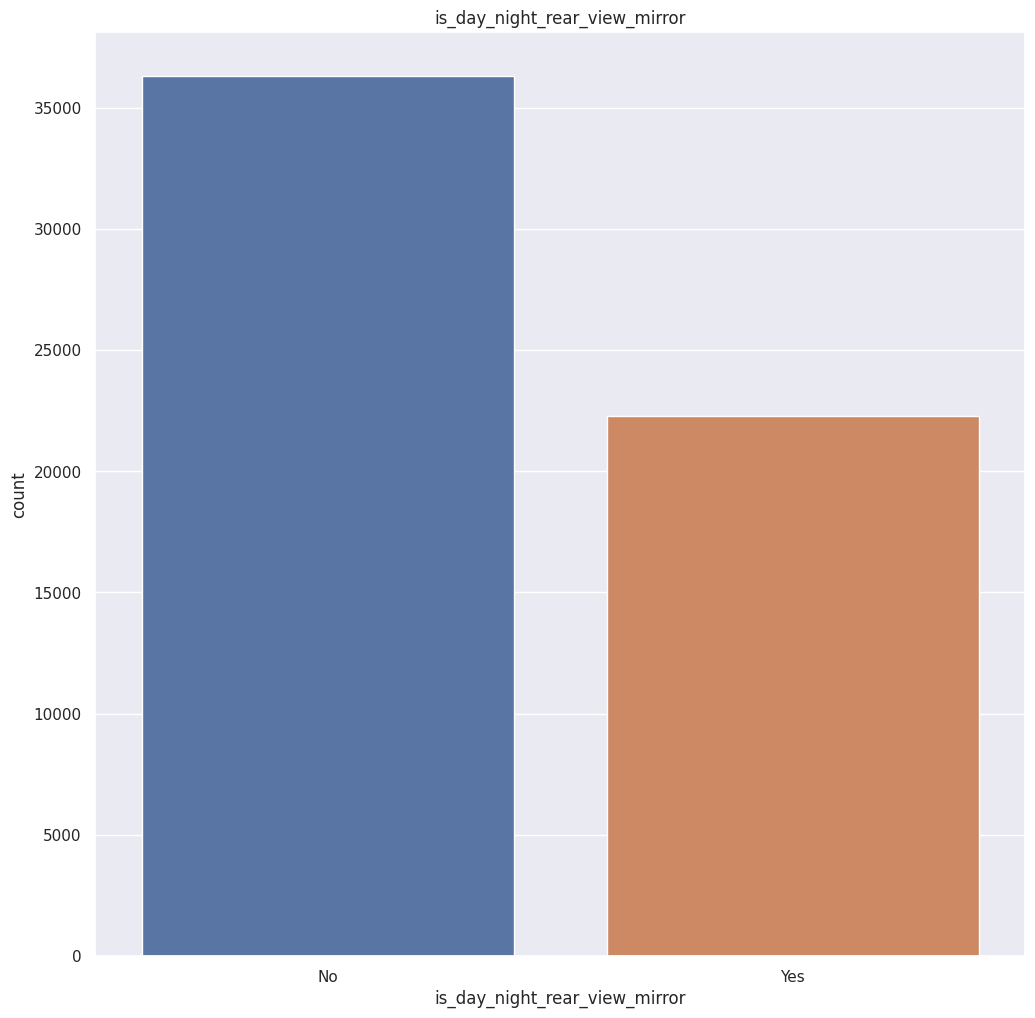

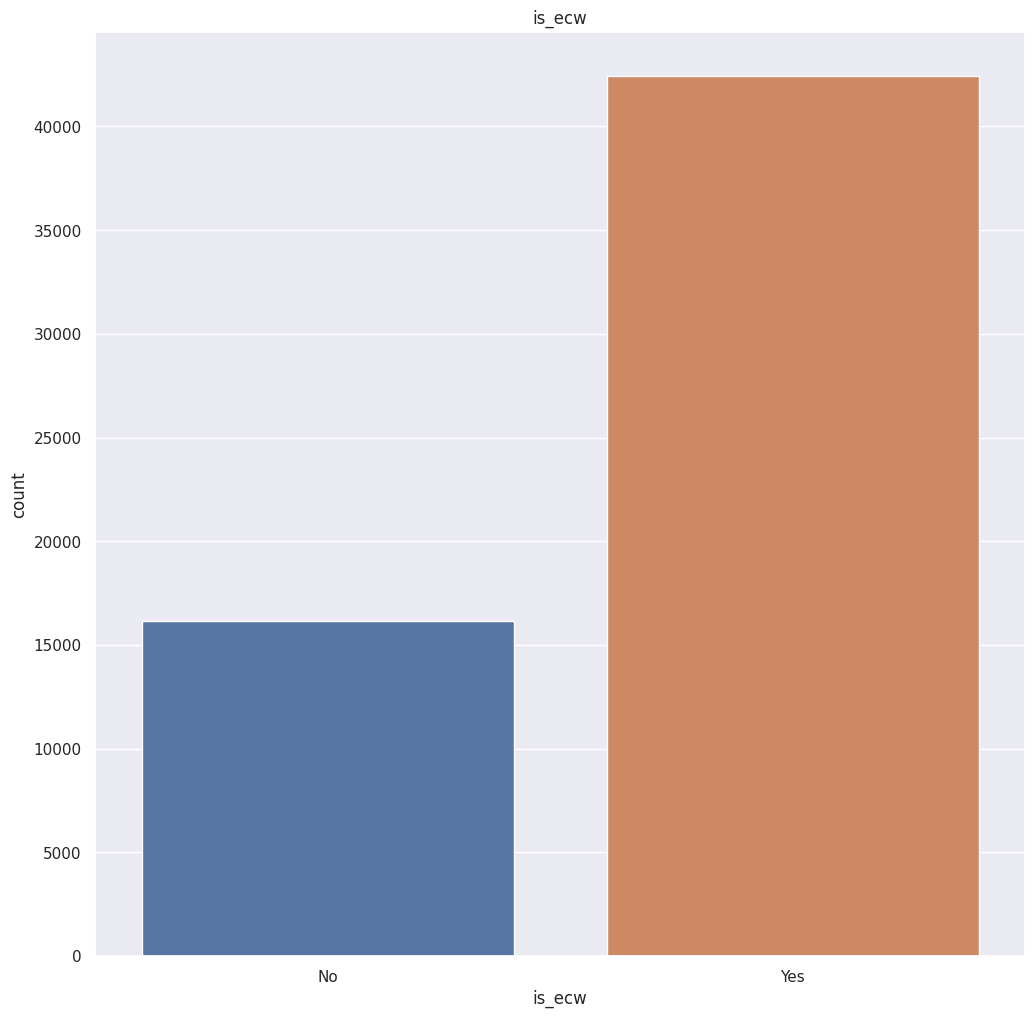

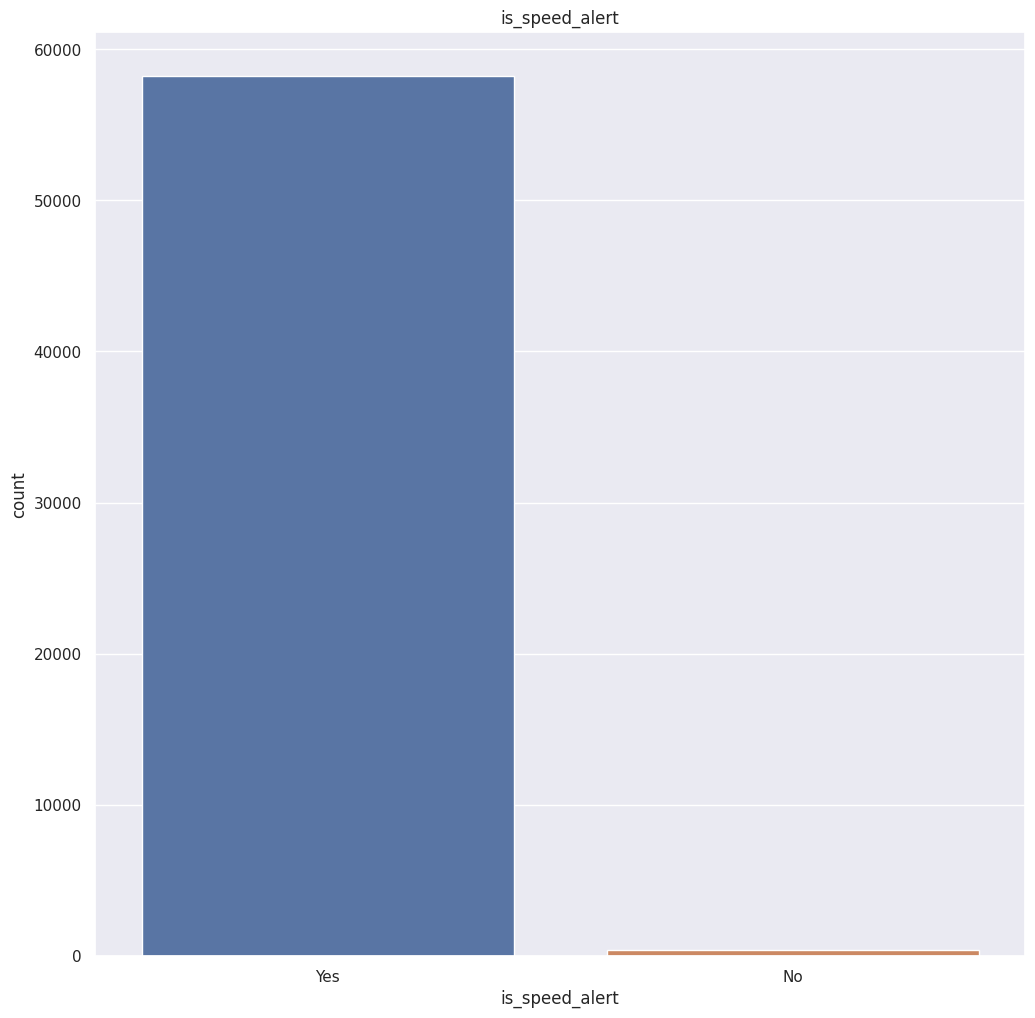

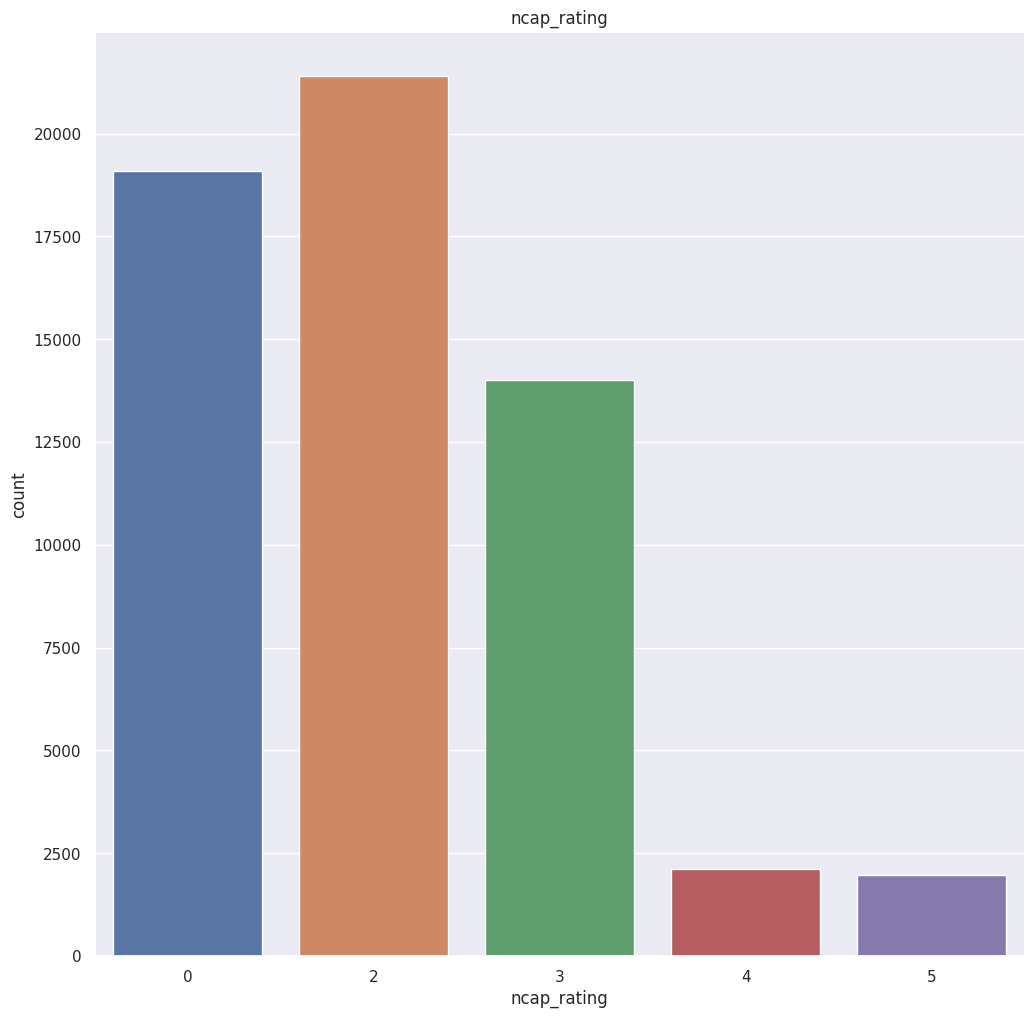

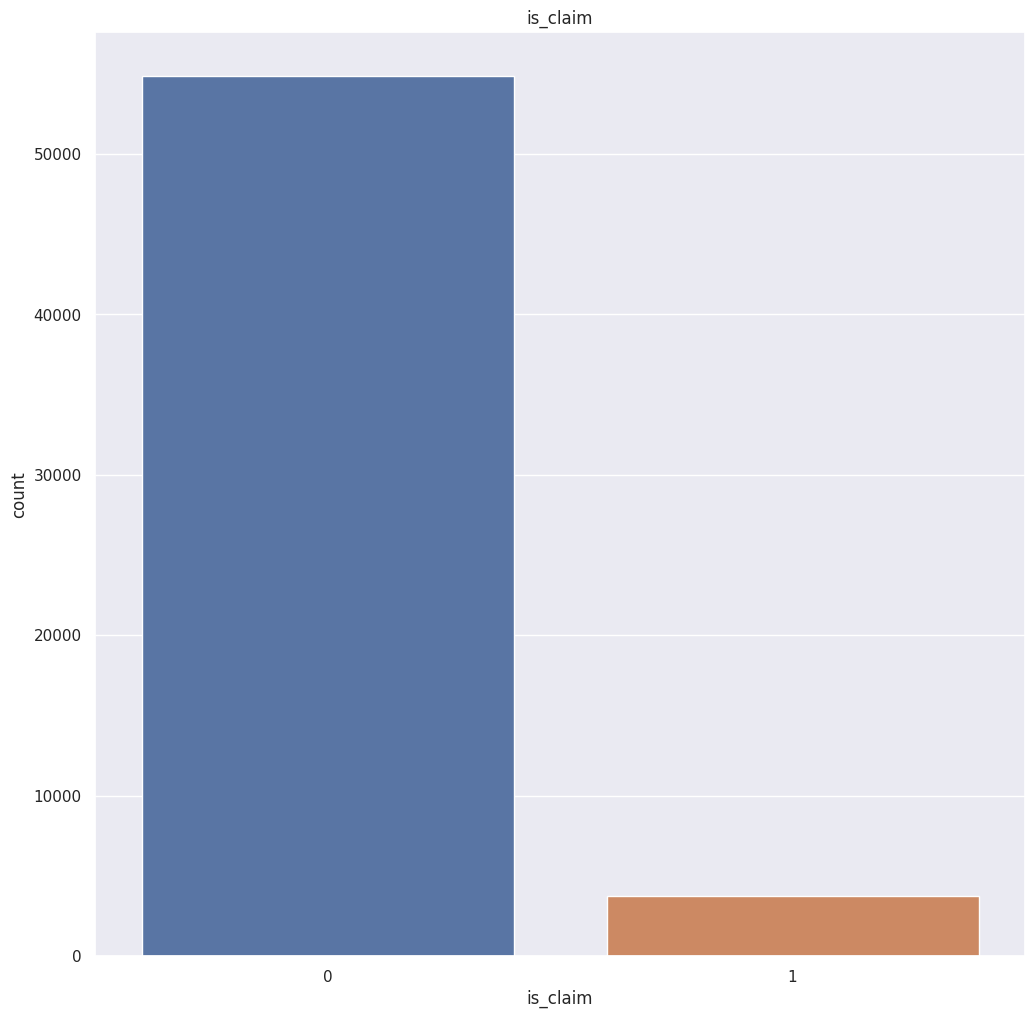

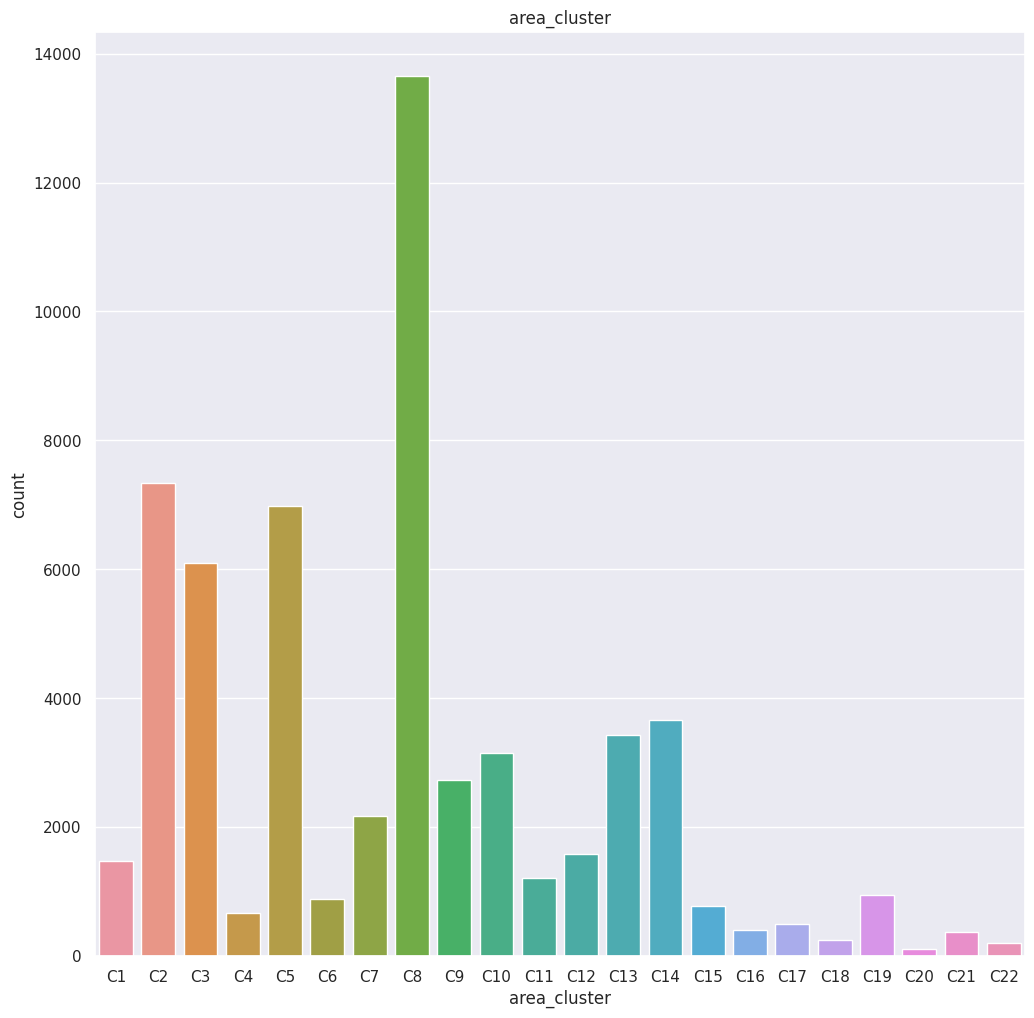

In [ ]:
for i in cat_list:
    
    plt.figure(figsize=(12,12))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)


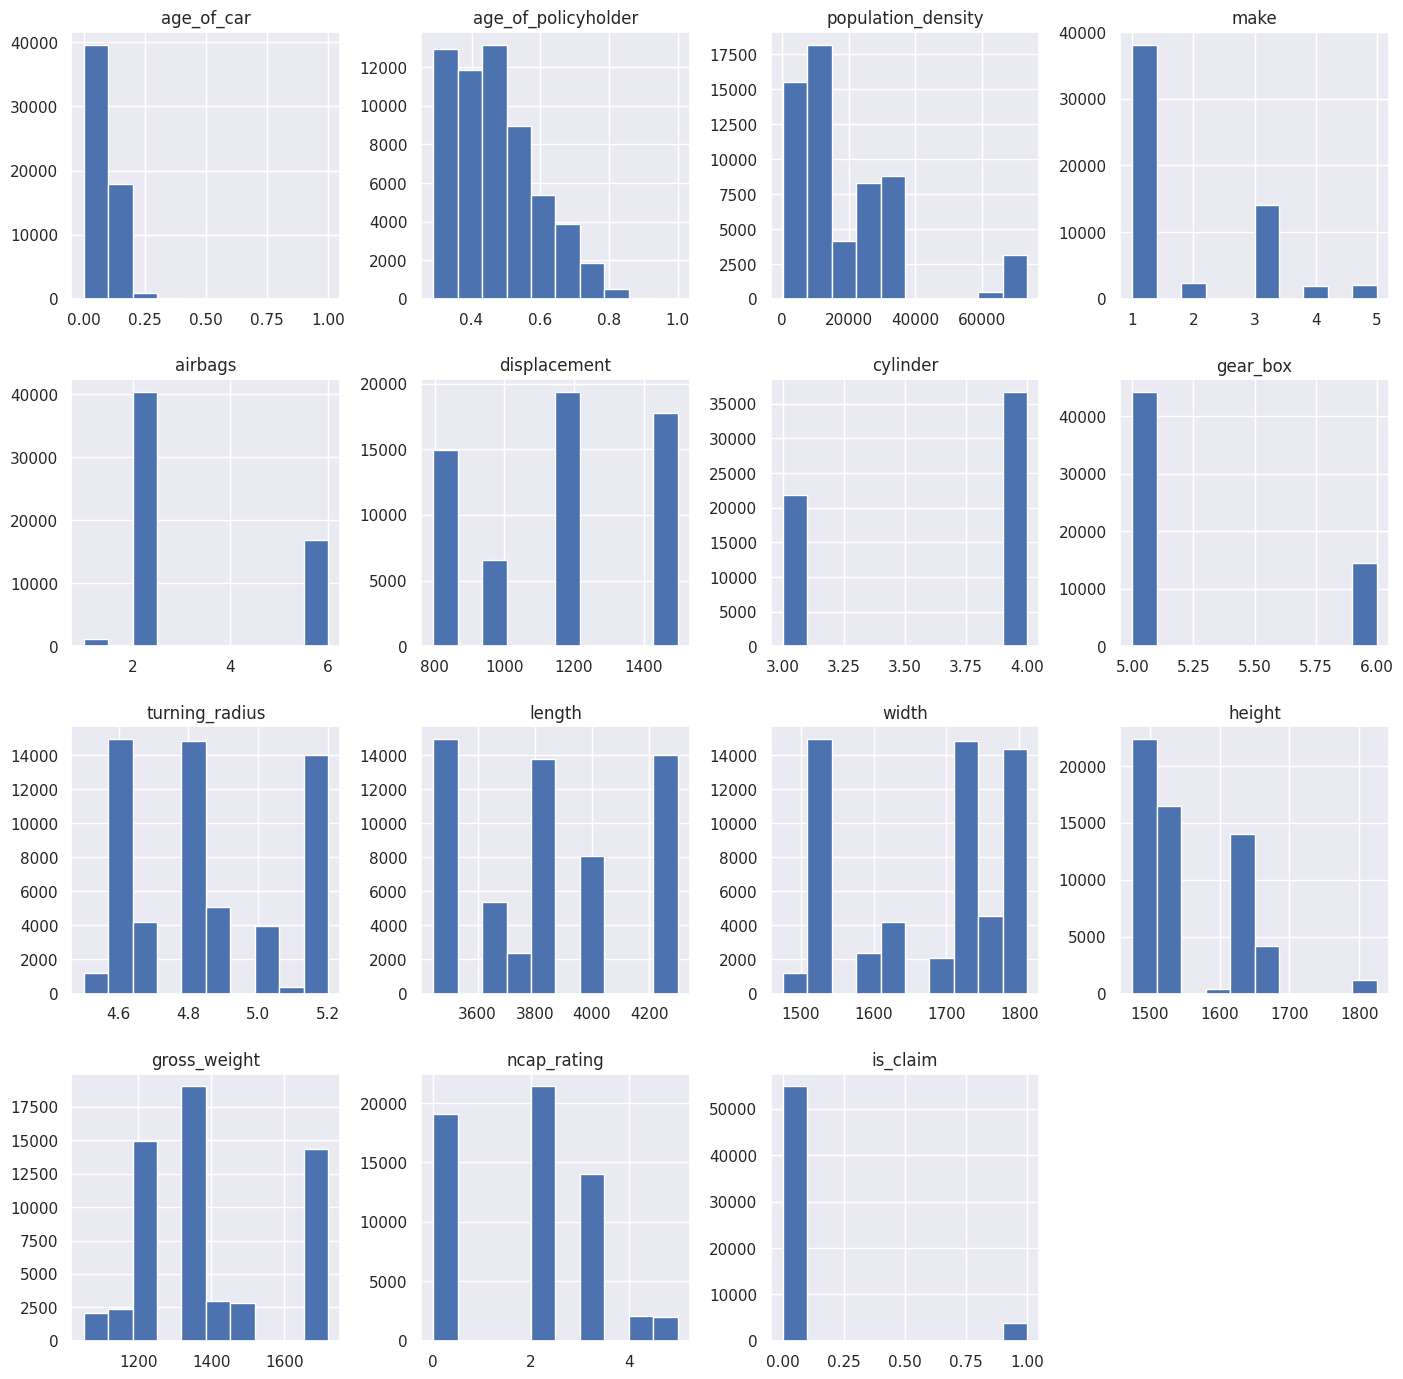

In [ ]:
df.hist(figsize=(17,17));

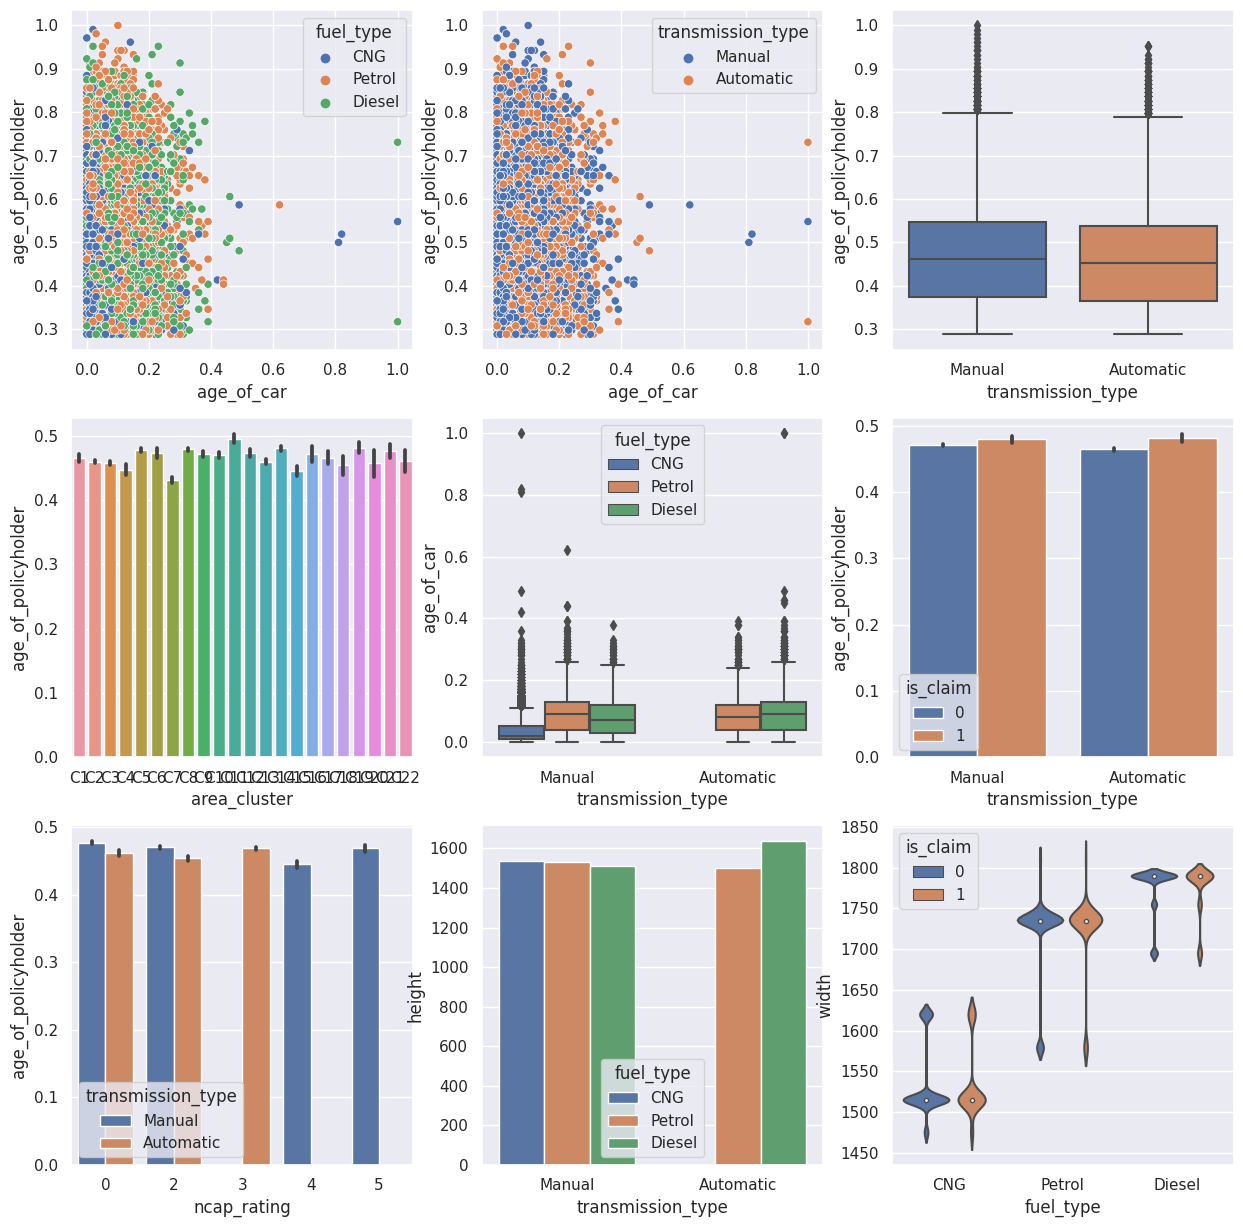

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.scatterplot(x ='age_of_car',y ='age_of_policyholder',hue="fuel_type",data = df)
plt.subplot(3,3,2)
sns.scatterplot(x="age_of_car",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,3)
sns.boxplot(x="transmission_type",y="age_of_policyholder",data=df)
plt.subplot(3,3,4)
sns.barplot(x="area_cluster",y="age_of_policyholder",data=df)
plt.subplot(3,3,5)
sns.boxplot(x="transmission_type",y="age_of_car",hue="fuel_type",data=df)
plt.subplot(3,3,6)
sns.barplot(x="transmission_type",y="age_of_policyholder",hue="is_claim",data=df)
plt.subplot(3,3,7)
sns.barplot(x="ncap_rating",y="age_of_policyholder",hue="transmission_type",data=df)
plt.subplot(3,3,8)
sns.barplot(x="transmission_type",y="height",hue="fuel_type",data=df)
plt.subplot(3,3,9)
sns.violinplot(x="fuel_type",y="width",hue="is_claim",data=df)
plt.show()

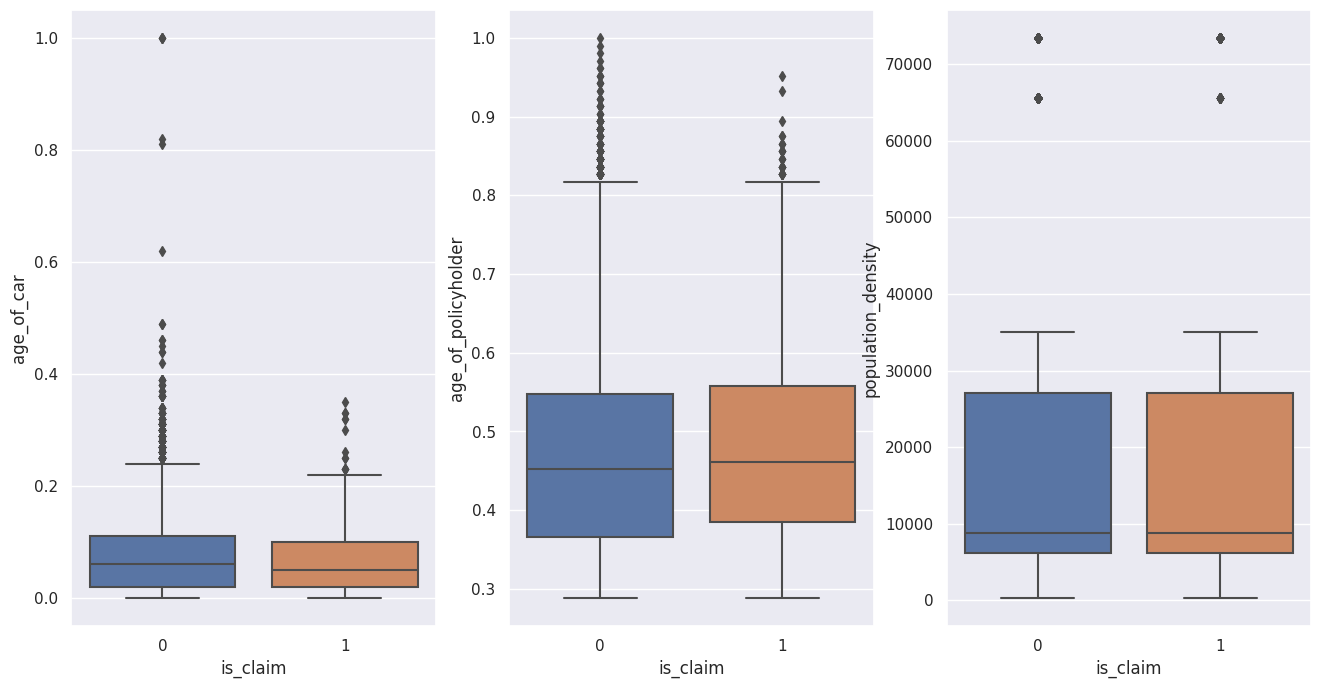

In [ ]:
names = df[
    [
        "age_of_car",
 "age_of_policyholder",
 "population_density",
 "is_claim",
    ]
].columns.drop("is_claim")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="is_claim",
        data=df[
            [
                "age_of_car",
 "age_of_policyholder",
 "population_density",
 "is_claim",
            ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)

# What kind of data exploration did you do?
Preliminary findings from the EDA.</br>

Datatype Check - All the features in the dataset are Integers/ Float/Object.</br>
Missing Data Check - Our Dataset Didn't had any missing values in any of the features.
Distribution of training data - I checked the probability distribution of each and every feature in the training dataset</br>
Correlation Check - I performed a correlation check on the dataset using heatmap and pairplot, the findings from it was that the didn't had any significant multi colinearity issues.</br>
Barplot - Performed Barplot analysis to findout how a variable impacts the insurance claim</br>


## Data Cleaning
This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.


## How to handle missing data</br>
Missing data is a common issue in data analysis, and it can arise due to various reasons, such as incomplete survey responses, equipment failure, or errors in data collection. The missing data can lead to biased results and inaccurate statistical models. Therefore, it is important to handle missing data appropriately. One common approach is to use data imputation techniques, which involve estimating the missing values based on the available data.</br>

Here are some commonly used data imputation techniques:</br>

Mean/median imputation: In this approach, the missing values are replaced with the mean or median value of the available data.</br>

Hot-deck imputation: This method involves replacing missing values with a value from a similar record in the same dataset.</br>

Regression imputation: This approach uses a regression model to predict the missing values based on the available data.</br>

Multiple imputation: This technique involves creating multiple copies of the dataset and imputing missing values in each copy using a different imputation method. The results are combined to obtain a final estimate.</br>

K-nearest neighbor imputation: In this approach, the missing values are estimated based on the values of the nearest neighbor(s) in the available data.</br>

Maximum likelihood imputation: This method estimates the missing values by maximizing the likelihood of the observed data given a statistical model.</br>

It is important to note that each of these techniques has its advantages and limitations, and the choice of the appropriate method depends on the nature of the data and the research question. Additionally, it is recommended to perform sensitivity analyses to assess the impact of the missing data and the imputation method on the results.</br>

We will intentionally introduce missing values into our dataset and compare the effectiveness of two methods, Mean Imputation and MICE imputation, in recovering the missing data. Specifically, we will remove 1%, 5%, and 10% of the data from the "age_of_car" variable and evaluate how well each method can restore the missing values.





# DATA IMPUTATION

In [ ]:
df_imputation= df[['age_of_car']]
df_imputation['1_percent'] = df_imputation[['age_of_car']]
df_imputation['5_percent'] = df_imputation[['age_of_car']]
df_imputation['10_percent'] = df_imputation[['age_of_car']]
df_imputation.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


age_of_car  1_percent  5_percent  10_percent
0        0.05       0.05       0.05        0.05
1        0.02       0.02       0.02        0.02
2        0.02       0.02       0.02        0.02
3        0.11       0.11       0.11        0.11
4        0.11       0.11       0.11        0.11

In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [ ]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
age_of_car  age_of_car              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
age_of_car  age_of_car         0.000000
1_percent    1_percent         1.000137
5_percent    5_percent         5.000683
10_percent  10_percent         9.999659


In [ ]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")


Length of number_1_idx is 586 and it contains 1.0001365374112507% of total data in column | Total rows: 58592
Length of number_5_idx is 2930 and it contains 5.000682687056254% of total data in column | Total rows: 58592
Length of number_10_idx is 5859 and it contains 9.999658656471873% of total data in column | Total rows: 58592


KNN Imputation

In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [ ]:
# imputed_number_df.sample(10)
imputed_number_df.head()

1_percent  5_percent  10_percent
0       0.05       0.05        0.05
1       0.02       0.02        0.02
2       0.02       0.02        0.02
3       0.11       0.11        0.11
4       0.11       0.11        0.11

In [ ]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
ageofcar = df["age_of_car"]
imputed_mean = pd.concat([ageofcar,imputed_number_df])
imputed_mean.columns = ["age_of_car","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

age_of_car    0.003217
1_Percent     0.003217
5_Percent     0.003217
10_Percent    0.003217
dtype: float64

Mean based Imputation with Simpleimputer

In [ ]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [ ]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
ageofcar = df["age_of_car"]
combined_mean = pd.concat([ageofcar,imputed_mean])
combined_mean.mean()

0             0.069424
age_of_car    0.069424
1_Percent     0.069423
5_Percent     0.069423
10_Percent    0.069423
dtype: float64

Imputation Using Multivariate Imputation by Chained Equation (MICE)

In [ ]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         1.000137
5_percent    5_percent         5.000683
10_percent  10_percent         9.999659


In [ ]:
!pip install impyute
from impyute.imputation.cs import mice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# start the MICE training
imputed_training=mice(df_imputation_mice.values)

In [ ]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [ ]:
# imputed_mice = pd.DataFrame(imputed_training.fit_transform(df_imputation_mice), columns = df_imputation_mice.columns)
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
ageofacar = df["age_of_car"]

In [ ]:
combined_mice = pd.concat([ageofcar,imputed_training])
combined_mice.columns = ["age_of_car","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

age_of_car    0.069424
1_Percent     0.069423
5_Percent     0.069423
10_Percent    0.069423
dtype: float64

In [ ]:
# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

From above we can infer that mean amd mice imputation works the best.

## FEATURE IMPORTANCE AND SELECTION

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [ ]:
ls = ['make',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'airbags',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'displacement',
 'cylinder',
 'transmission_type',
 'gear_box',
 'area_cluster',
 'steering_type',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert',
 'ncap_rating'
 ]
for i in ls:
    unique_vals = df[i].unique()
    df[i].replace(to_replace=unique_vals, 
                      value= list(range(len(unique_vals))),
                      inplace=True)

In [ ]:
columns = list(df.columns)
print(columns)  # Name of all predictors and result

['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']


In [ ]:
df.select_dtypes(["object"]).columns.tolist()

[]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df[['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

divide by zero encountered in double_scalars


variables       VIF
0                         age_of_car  3.129581
1                age_of_policyholder  5.152599
2                       area_cluster  3.055091
3                 population_density  2.022286
4                               make       inf
5                            segment       inf
6                              model       inf
7                          fuel_type       inf
8                         max_torque       inf
9                          max_power       inf
10                       engine_type       inf
11                           airbags       inf
12                            is_esc       inf
13            is_adjustable_steering       inf
14                           is_tpms       inf
15                is_parking_sensors       inf
16                 is_parking_camera       inf
17                  rear_brakes_type       inf
18                      displacement       inf
19                          cylinder       inf
20                 transmission_type       inf
21                          gear_box       inf
22                     steering_type       inf
23                    turning_radius       inf
24                            length       inf
25                             width       inf
26                            height       inf
27                      gross_weight       inf
28               is_front_fog_lights       inf
29              is_rear_window_wiper       inf
30             is_rear_window_washer       inf
31           is_rear_window_defogger       inf
32                   is_brake_assist       inf
33               is_power_door_locks       inf
34                is_central_locking       inf
35                 is_power_steering       inf
36  is_driver_seat_height_adjustable       inf
37     is_day_night_rear_view_mirror       inf
38                            is_ecw       inf
39                    is_speed_alert       inf
40                       ncap_rating       inf

VID for every feature except for 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density' is inf. If there is perfect correlation, then VIF = infinity. A large value of VIF indicates that there is a correlation between the variables. Not removing make, model, power and engine type as they are important features in regard with car.

# FEATURE IMPORTANCE AND SELECTION

In [ ]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df1 = df.drop(["is_claim"], axis=1)
df_norm = (df1 - df1.min()) / (df1.max() - df1.min())
df_norm = pd.concat((df_norm, df.is_claim), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [ ]:
import statsmodels.api as sm

results = sm.OLS(df_norm['is_claim'], df_norm[['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']]).fit()

# Print out the statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               is_claim   R-squared (uncentered):                   0.059
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              264.6
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:23:52   Log-Likelihood:                         -796.03
No. Observations:               58592   AIC:                                      1620.
Df Residuals:                   58578   BIC:                                      1746.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
age_of_car                          -0.1011      0.020     -5.092      0.000      -0.140      -0.062
age_of_policyholder                  0.0898      0.005     17.476      0.000       0.080       0.100
area_cluster                         0.0331      0.004      7.568      0.000       0.025       0.042
population_density                   0.0156      0.004      4.001      0.000       0.008       0.023
make                                -0.0046      0.003     -1.777      0.076      -0.010       0.000
segment                              0.0084      0.002      4.594      0.000       0.005       0.012
model                               -0.0016      0.001     -1.165      0.244      -0.004       0.001
fuel_type                           -0.0004      0.002     -0.164      0.870      -0.005       0.004
max_torque                           0.0032      0.001      2.588      0.010       0.001       0.006
max_power                            0.0032      0.001      2.588      0.010       0.001       0.006
engine_type                         -0.0016      0.001     -1.165      0.244      -0.004       0.001
airbags                              0.0011      0.001      0.819      0.413      -0.002       0.004
is_esc                               0.0040      0.003      1.295      0.195      -0.002       0.010
is_adjustable_steering               0.0056      0.002      3.055      0.002       0.002       0.009
is_tpms                              0.0011      0.002      0.503      0.615      -0.003       0.005
is_parking_sensors                  -0.0024      0.002     -1.022      0.307      -0.007       0.002
is_parking_camera                   -0.0012      0.001     -0.948      0.343      -0.004       0.001
rear_brakes_type                     0.0011      0.002      0.503      0.615      -0.003       0.005
displacement                         0.0032      0.001      2.588      0.010       0.001       0.006
cylinder                             0.0091      0.002      4.215      0.000       0.005       0.013
transmission_type                    0.0075      0.002      3.330      0.001       0.003       0.012
gear_box                            -0.0048      0.002     -2.118      0.034      -0.009      -0.000
steering_type                        0.0046      0.002      2.391      0.017       0.001       0.008
turning_radius                    3.273e-05      0.001      0.038      0.970      -0.002       0.002
length                               0.0014      0.002      0.700      0.484      -0.003       0.005
width                                0.0007      0.001      0.906      0.365      -0.001       0.002
height                              -0.0016      0.001 

Feature selection is the process of selecting a subset of relevant features or variables from a larger set of features that are available in a dataset. In machine learning, feature selection is a critical step in the model building process, as it can improve the accuracy and efficiency of the models by reducing the dimensionality of the data.</br>

The goal of feature selection is to identify and remove irrelevant, redundant, or noisy features from the dataset, which can negatively impact the performance of the model. By selecting only the most relevant features, the model can focus on the most important patterns in the data, and reduce the likelihood of overfitting.

In [ ]:
df_norm_feature_selected = df_norm[
    [
        'age_of_car', 'age_of_policyholder','population_density','area_cluster','make',
 'model',
 'max_power',
 'engine_type',
 'is_claim',
    ]
]

In [ ]:
import statsmodels.api as sm

results2 = sm.OLS(df_norm_feature_selected['is_claim'], df_norm_feature_selected[['age_of_car', 'age_of_policyholder','population_density','area_cluster','make',
 'model',
 'max_power',
 'engine_type']]).fit()

# Print out the statistics
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               is_claim   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.058
Method:                 Least Squares   F-statistic:                              515.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:25:23   Log-Likelihood:                         -840.77
No. Observations:               58592   AIC:                                      1696.
Df Residuals:                   58585   BIC:                                      1758.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
age_of_car             -0.0380      0.019     -2.052      0.040      -0.074      -0.002
age_of_policyholder     0.0964      0.005     18.950      0.000       0.086       0.106
population_density      0.0170      0.004      4.370      0.000       0.009       0.025
area_cluster            0.0400      0.004      9.258      0.000       0.032       0.048
make                    0.0242      0.005      4.700      0.000       0.014       0.034
model                   0.0288      0.003      9.270      0.000       0.023       0.035
max_power              -0.0274      0.008     -3.258      0.001      -0.044      -0.011
engine_type             0.0288      0.003      9.270      0.000       0.023       0.035
==============================================================================
Omnibus:                    41053.267   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           391145.059
Skew:                           3.518   Prob(JB):                         0.00
Kurtosis:                      13.522   Cond. No.                     9.07e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is  5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
predicted_claim_1 = results.predict(
    df_norm[
        [
            'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating',
        ]
    ]
)
df_norm["predicted_claim_1"] = predicted_claim_1.round()

In [ ]:
predicted_claim_2 = results2.predict(
    df_norm_feature_selected[
        [
           'age_of_car', 'age_of_policyholder','population_density','area_cluster','make',
 'model',
 'max_power',
 'engine_type',
        ]
    ]
)
df_norm_feature_selected["predicted_claim_2"] = predicted_claim_2.round()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print(
    "Accuracy of predicting the correct claim of insurance using all features = ",
    100 - percentage_change(df_norm["is_claim"], df_norm["predicted_claim_1"]),
)
print(
    "Accuracy of predicting the correct claim of insurance using only significant features is = ",
    100 
    - percentage_change(
        df_norm_feature_selected["is_claim"],
        df_norm_feature_selected["predicted_claim_2"],
    ),
)


Accuracy of predicting the correct claim of insurance using all features =  93.6032222893023
Accuracy of predicting the correct claim of insurance using only significant features is =  93.6032222893023


Based on the two summaries provided, it appears that selecting only significant features (i.e. those without high collinearity) did not have a significant impact on the outcome compared to using all features. Both models yielded an accuracy of 93.6%. Therefore, it can be inferred that the models predict insurance claims well and there is no notable difference between the two approaches. Given this observation, it is recommended to use the data with all features and explore different models.

In [ ]:
df_norm = df_norm.drop(["predicted_claim_1"], axis=1)

In [ ]:
X = df_norm.drop(["is_claim"], axis=1)  # Training Feature
Y = df_norm["is_claim"]  # Target

In [ ]:
df_norm.drop([ 'segment',  'fuel_type', 'max_torque',   'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating'],axis=1,inplace=True)

# How did you split into train, and test?</br>
The data was splitted into Training ad Testing Data into 90% and 10% respectively.


In [ ]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process


Fitting a Linear Model

In [ ]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_tra 

LinearRegression()

In [ ]:
y_linear_predictions = linear_model.predict(x_test).round()

In [ ]:
#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

In [ ]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, y_linear_predictions))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_linear_predictions)))   
print('R2 %f' % r2_score(y_test, y_linear_predictions))

Linear Model - Test
MAE: 0.064676
RMSE: 0.254314
R2 -0.069148


Fitting a Tree Based Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=41, n_estimators=10, random_state=0)

In [ ]:
y_tree_based_predictions = tree_model.predict(x_test).round()

Fitting a Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)

In [ ]:
svm_predictions = svm_model.predict(x_test).round()

Fitting a MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [ ]:
mlp_predictions = regr.predict(x_test).round()

Using AutoML to find out the best Model

In [ ]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:32227..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpf592hsaq
  JVM stdout: /tmp/tmpf592hsaq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpf592hsaq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:32227
Connecting to H2O server at http://127.0.0.1:32227 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_35kpnr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:32227
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
claim_hf = h2o.H2OFrame(df)  # Converting Pandas dataframe in H2O dataframe


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = claim_hf.split_frame([pct_rows])

In [ ]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "is_claim"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [ ]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |
20:07:36.850: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
20:07:47.932: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:07:49.739: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
20:08:00.643: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
20:08:02.937: _response param, We hav

In [ ]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                     rmse        mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  --------  --------  ------------------------
GBM_grid_1_AutoML_1_20230409_200735_model_7              0.241507  0.0583257  0.117874  0.16844                  0.0583257
GBM_grid_1_AutoML_1_20230409_200735_model_6              0.241513  0.0583287  0.117807  0.168452                 0.0583287
GBM_grid_1_AutoML_1_20230409_200735_model_11             0.241549  0.0583459  0.117785  0.168356                 0.0583459
GBM_grid_1_AutoML_1_20230409_200735_model_2              0.241657  0.058398   0.117974  0.16868                  0.058398
GBM_grid_1_AutoML_1_20230409_200735_model_9              0.24166   0.0583994  0.117928  0.168545                 0.0583994
StackedEnsemble_BestOfFamily_4_AutoML_1_20230409_200735  0.241815  0.0584745  0.117563  0.16893                  0.0584745
GBM_grid_1_AutoML_1_20230409_200735_model_3              0.241903  0.0585169  0.117906  0.168951                 0.0585169
StackedEnsemble_AllModels_3_AutoML_1_20230409_200735     0.241911  0.0585207  0.117602  0.169028                 0.0585207
StackedEnsemble_AllModels_1_AutoML_1_20230409_200735     0.242005  0.0585666  0.118331  0.168884                 0.0585666
StackedEnsemble_AllModels_2_AutoML_1_20230409_200735     0.24204   0.0585835  0.118301  0.168915                 0.0585835
[43 rows x 6 columns]

In [ ]:

autoML_model = getBestModel(autoML[2])  # Getting Best Model

14


In [ ]:
autoML_best_predictions = autoML_model.predict(df_test).round()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["is_claim"], use_pandas=False)

In [ ]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [ ]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

# Hyperparameter Tuning of AutoML's Best Model

In [ ]:
train, validate, test = np.split(
    df.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="is_claim",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_21
Best R2: 0.009582092551314703


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


To assess the best regression model, I am utilizing several evaluation metrics including Mean Squared Error, Root Mean Squared Error, Mean Absolute Error, Mean Residual Deviance, and Accuracy. Among these metrics, Mean Residual Deviance and Accuracy are the most crucial ones for evaluating the model's performance.

Mean Residual Deviance is a measure that indicates the model's ability to predict the response variable based on p predictor variables. The lower the value of Mean Residual Deviance, the better the model is at predicting the response variable.

Accuracy measures the precision and correctness of the model, indicating how accurately it can predict the outcome of interest.

In [ ]:
best_drf_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_21


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    100                100                         39825                  5            5            5             16            32            26.98

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.05906162975575095
RMSE: 0.2430259857623274
MAE: 0.11853571899220113
RMSLE: 0.1693834802300656
Mean Residual Deviance: 0.05906162975575095

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.0601330690043323
RMSE: 0.2452204498086004
MAE: 0.11970399501591174
RMSLE: 0.17082223737729232
Mean Residual Deviance: 0.0601330690043323

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance     validation_rmse      validation_mae       validation_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  --------------------  -------------------  -------------------  ---------------------
     2023-04-09 20:22:23  2 min 58.912 sec  0.0                nan                  nan                  nan                   nan                  nan                  nan
     2023-04-09 20:22:23  2 min 58.989 sec  1.0                0.24496427938767243  0.11847838155746507  0.06000749817592163   0.24688802908196616  0.11946464485178392  0.060953698903977775
     2023-04-09 20:22:23  2 min 59.058 sec  2.0                0.24422039993309047  0.1167437256127166   0.05964360374347865   0.24582124552636633  0.1175099515386643   0.06042808475213408
     2023-04-09 20:22:23  2 min 59.122 sec  3.0                0.2439654156587845   0.11807666624938613  0.05951912403756349   0.24565803911015624  0.11897249048483452  0.06034787217944705
     2023-04-09 20:22:23  2 min 59.197 sec  4.0                0.24373097122193893  0.11855865013514508  0.05940478633278962   0.2455985305386087   0.11943585642264244  0.0603186382027239
     2023-04-09 20:22:23  2 min 59.268 sec  5.0                0.24353228745527886  0.11858392802421305  0.059307975033200566  0.24558716250819956  0.11954026797198133  0.06031305438882883
     2023-04-09 20:22:23  2 min 59.336 sec  6.0                0.24338819458836214  0.118100812073095    0.05923781326498243   0.24550050883831834  0.1190921543528866   0.060270499839873225
     2023-04-09 20:22:23  2 min 59.405 sec  7.0                0.24331638961939003  0.11781762100698907  0.059202865457414815  0.245546071737566    0.11887536300469352  0.06029287334574992
     2023-04-09 20:22:24  2 min 59.476 sec  8.0                0.24335258469365703  0.118548811523223    0.059220480477083524  0.24556380847568027  0.11969837444733036  0.06030158403308058
     2023-04-09 20:22:24  2 min 59.552 sec  9.0                0.24332801830404285  0.11830908155821747  0.059208524491772614  0.24554359344880658  0.11943686978978098  0.06029165628375281
---  ---                  ---               ---                ---                  ---                  ---                   ---                  ---                  ---
     2023-04-09 20:22:26  3 min  1.701 sec  30.0               0.24310503726503374  0.11834713464018816  0.05910005914363345   0.24523779074718258  0.11946168080718392  0.06014157401055891
     2023-04-09 20:22:26  3 min  1.822 sec  31.0               0.2431146971854752   0.11836479404250132  0.059104755987585314  0.24526351385748768  0.11946436473227522  0.06015419122972206
     2023-04-09 20:22:26  3 min  1.949 sec  32.0               0.2431164753184659   0.11840434377335474  0.05910562057127424   0.24527176254901376  0.11951427883135754  0.060

In [ ]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["is_claim"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Can you describe the models that you investigated, and whether you attempted to optimize the hyperparameters of the most effective model?

To predict the insurance claim, you trained various models such as Linear Regression, Random Forest Regressor, MLP Regressor, SVM Regressor, and AutoML. Among these models, SVM and AutoML performed the best, with the AutoML's RandomForestRegressor slightly outperforming SVM. You further improved the AutoML model's accuracy by tuning its hyperparameters,there is no change in accuracy from 93.45% to 93.45%. 


In [ ]:
mlp_accuracy = 100 * (mlp_predictions == y_test).sum() / len(y_test)
linear_accuracy = 100 * (y_linear_predictions == y_test).sum() / len(y_test)
tree_accuracy = 100 * (y_tree_based_predictions == y_test).sum() / len(y_test)
svm_accuracy = 100 * (svm_predictions == y_test).sum() / len(y_test)
automl_accuracy = 100 * (autoMLpredictions == y_test_h2O).sum() / len(y_test_h2O)
tuned_automl_accuracy = 100 * (autoMLpredictions_2 == y_test_h2O_2).sum() / len(y_test_h2O_2)

print(f"Accuracy of predicting the choice of wfh vs who using MLP Regressor = {mlp_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using Linear Model = {linear_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using Tree Based Model = {tree_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using SVM = {svm_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using best AutoML model = {automl_accuracy:.2f}")
print(f"Accuracy of predicting the choice of wfh vs who using best AutoML model with Tuned Hyper-Parameters = {tuned_automl_accuracy:.2f}")

Accuracy of predicting the choice of wfh vs who using MLP Regressor = 93.53
Accuracy of predicting the choice of wfh vs who using Linear Model = 93.53
Accuracy of predicting the choice of wfh vs who using Tree Based Model = 91.89
Accuracy of predicting the choice of wfh vs who using SVM = 93.53
Accuracy of predicting the choice of wfh vs who using best AutoML model = 93.45
Accuracy of predicting the choice of wfh vs who using best AutoML model with Tuned Hyper-Parameters = 93.45


# **Model Selection**
From the above summary of the models trained on the dataset, the two best models are SVM and AutoML's best model with tuned hyperparameters.

SVM Regressor with an Accuracy of ~ 93.53%
AutoML's Hyperparameter Tuned Version ~ 93.45%
Let's try to understand how both the models have been trained.

# `**Interpreting SVM Regressor using SHAP values**`

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of is_parking_camera

The cross is made at approx E[f(x)] 5.00
So as the is_parking_camera increases the expected value also increases

Talking about the red line on the plot -  as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

In [ ]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

Permutation explainer: 101it [49:58, 29.98s/it]


In [ ]:
 for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )


Output hidden; open in https://colab.research.google.com to view.

# ***`*Interpreting SHAP Feature Importance Plot for Linear and Tree-based model*`***

However, in general, SHAP (SHapley Additive exPlanations) feature importance is a model-agnostic approach to interpret the importance of features in a machine learning model. The SHAP values quantify the contribution of each feature to the prediction for each sample in the dataset. By aggregating the SHAP values across all samples in the dataset, we can obtain a global measure of feature importance.

In the SHAP feature importance plot, the features are ranked in descending order of their importance. The importance of a feature is represented by the magnitude of its SHAP value. The plot can be used to identify the most important features in a model and to compare the importance of features across different models.

For a linear model, the SHAP feature importance plot can be used to interpret the coefficients of the model. A positive SHAP value for a feature indicates that the feature has a positive effect on the prediction, while a negative SHAP value indicates a negative effect. The magnitude of the SHAP value indicates the strength of the effect.

For a tree-based model, the SHAP feature importance plot can be used to interpret the importance of splitting on a feature in the tree. A high SHAP value for a feature indicates that the feature is frequently used in the splits and has a strong impact on the predictions.

Overall, the SHAP feature importance plot can be a useful tool for interpreting the importance of features in a model and gaining insights into the underlying patterns in the data.

The following plot is

SHAP feature importance plot for SVM model
Using the below plot we can come on the conclusion that the age_of_policyholder is the most important feature, followed by rear_brakes_type and is_tpms.

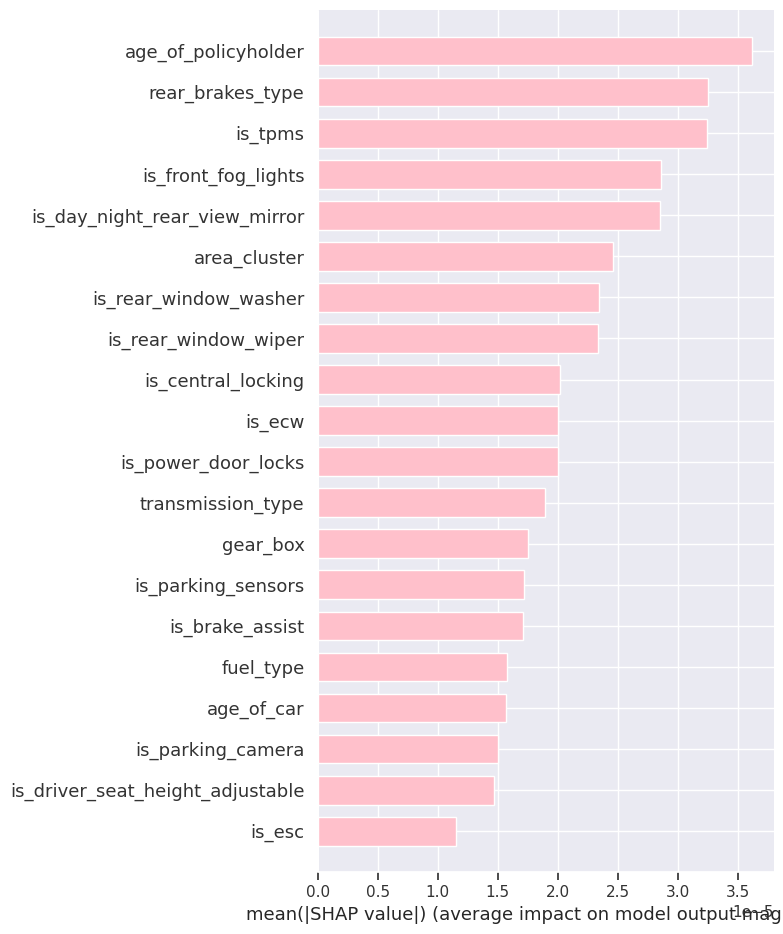

In [ ]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="pink")


In [ ]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)

# `**Interpreting Waterfall SHAP visualization**`


According to the model output, `f(x) = 0.1`, which is very close to the expected output of 0.1. This indicates that the model performed well in determining the output for this sample, with a difference of only 0. The waterfall model was used to explain how the expected output was obtained and which features contributed to it. The graph reveals that the feature "is_front_fog_lights" had the greatest and most positive impact on this specific amount of data.





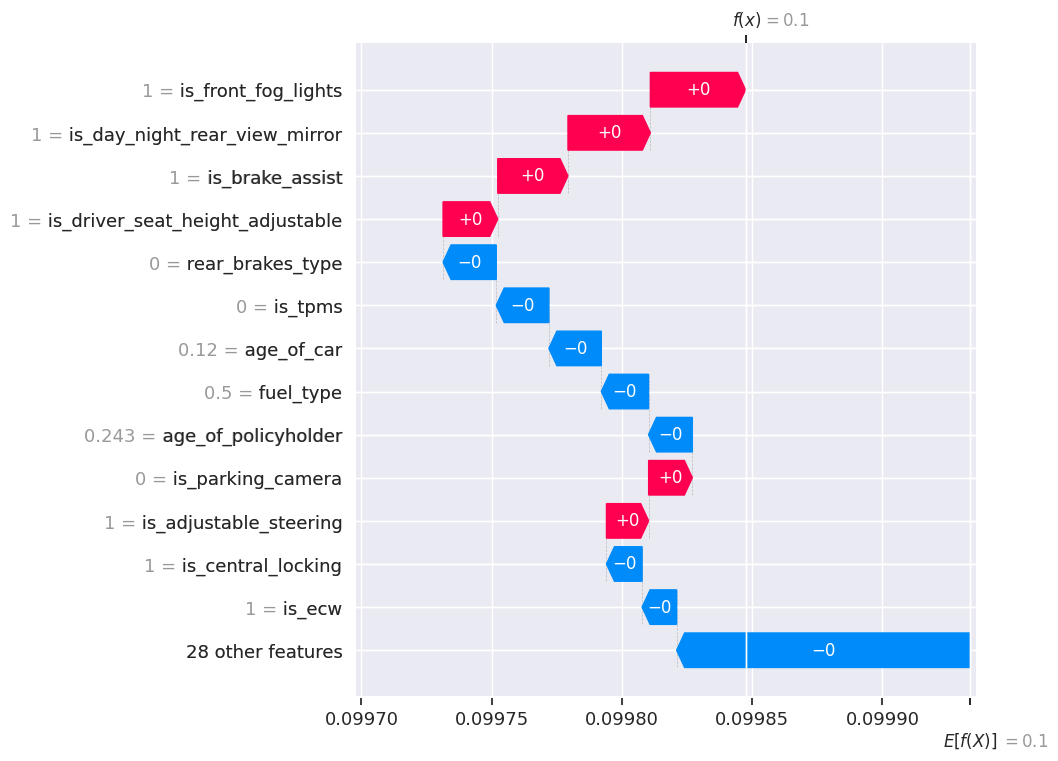

In [ ]:
get_SHAP()

# **`Interpret the summary plot SVM Model`**

Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

The list of features is arranged in descending order of their importance, which is one of the simplest methods to evaluate an ML model and comprehend how the features influence the target variable and to what degree. Each dot on the graph represents a feature of the insurance claim, with the red color indicating high values and the blue color representing low values. If a dot is positioned to the right of the y-axis, it had a positive effect, whereas if it is on the left side of the axis, it had a negative impact. The intensity of the feature's impact is represented by its position on the x-axis, with the greater the distance from the axis indicating a stronger impact.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


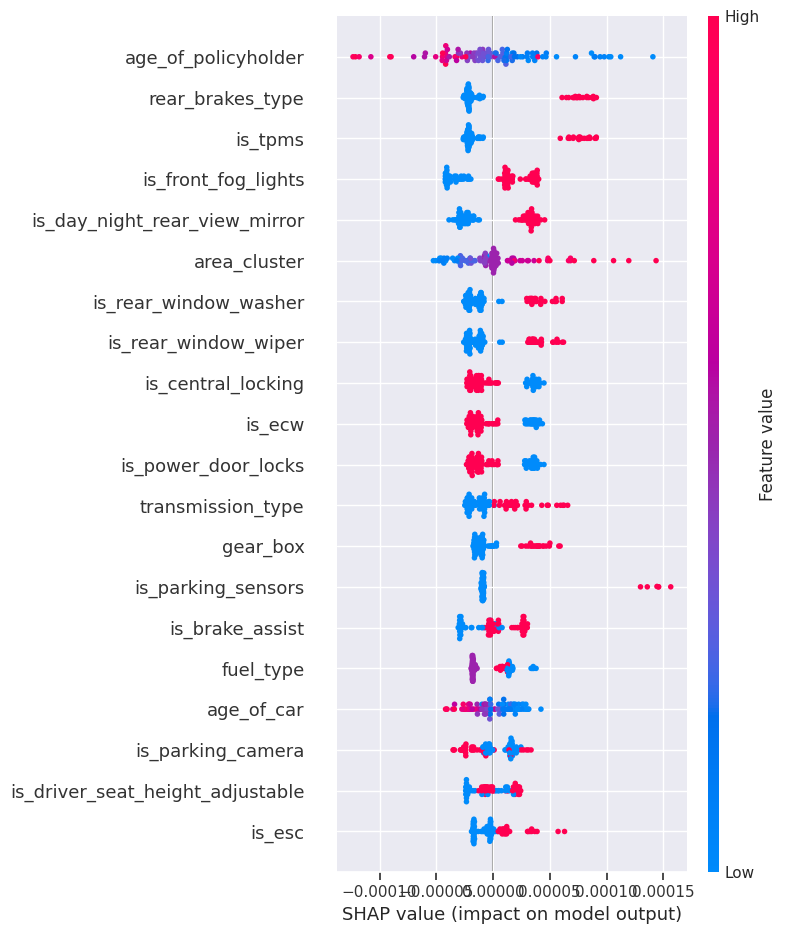

In [ ]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

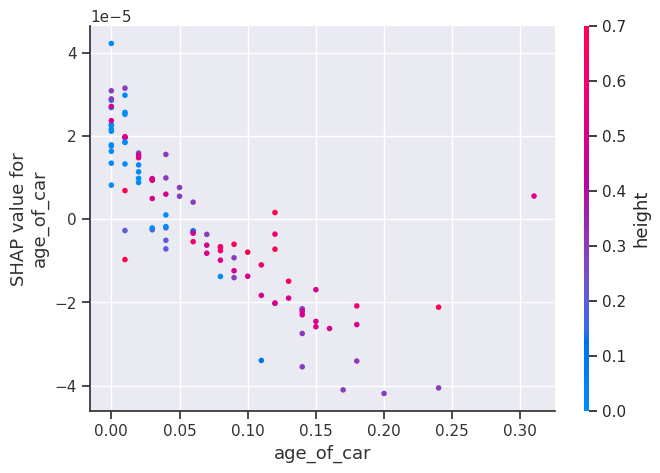

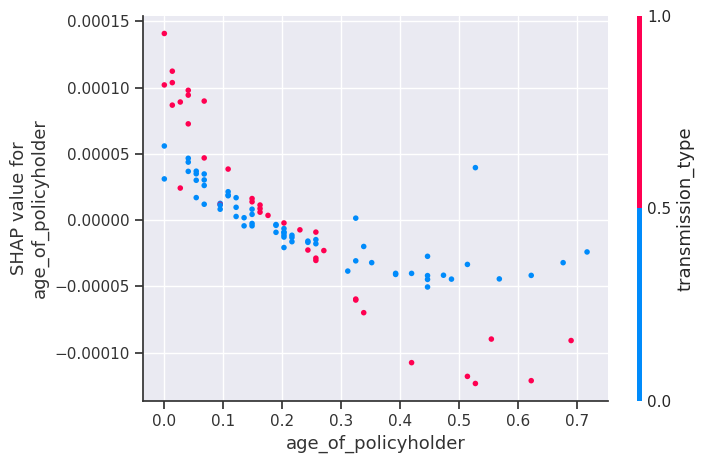

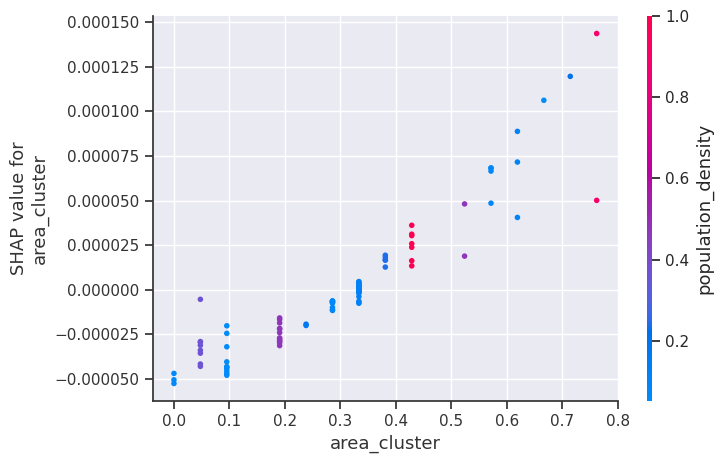

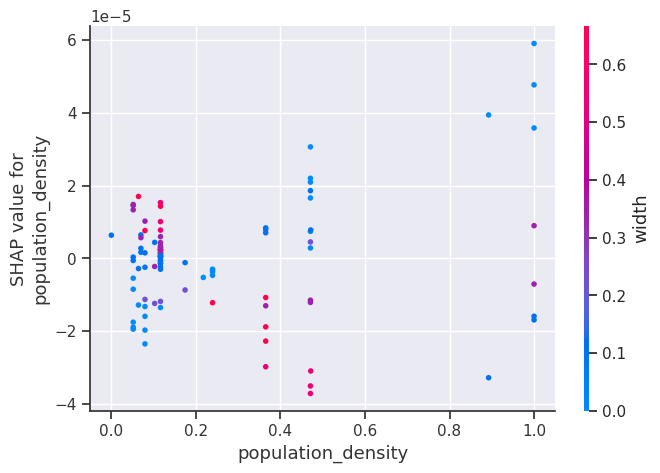

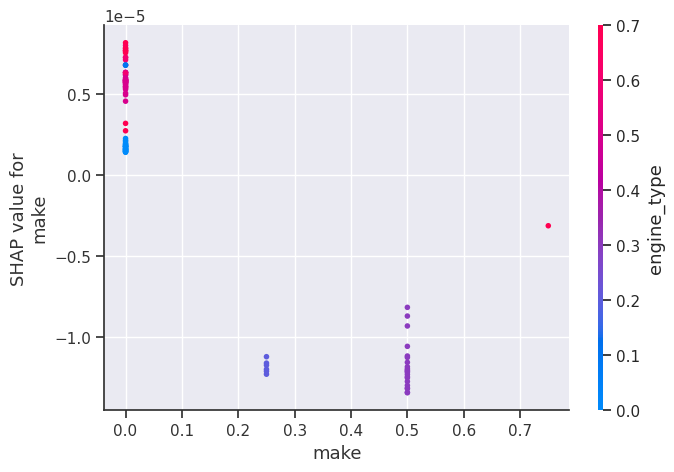

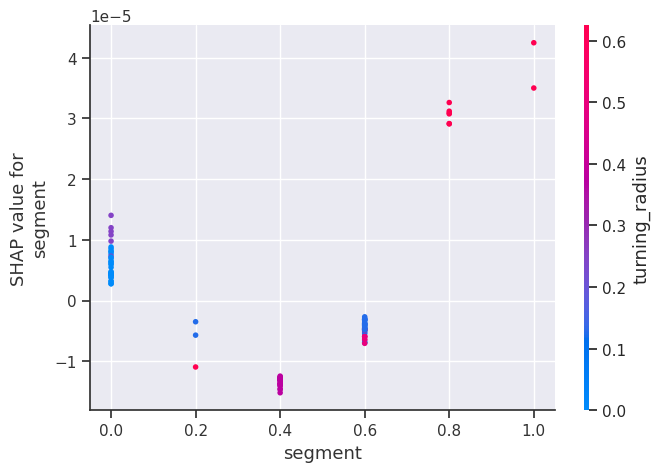

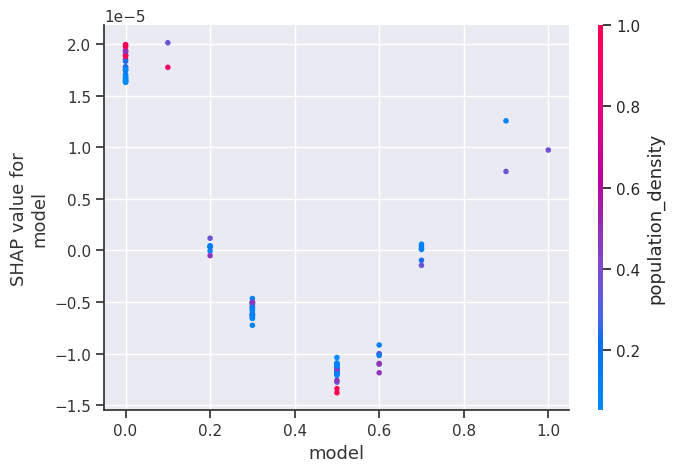

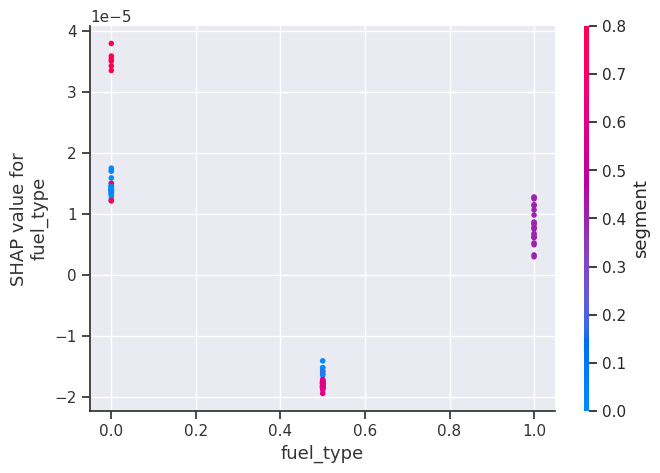

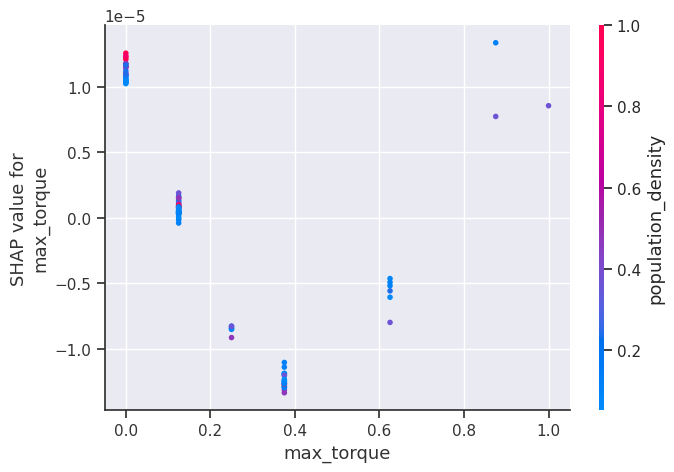

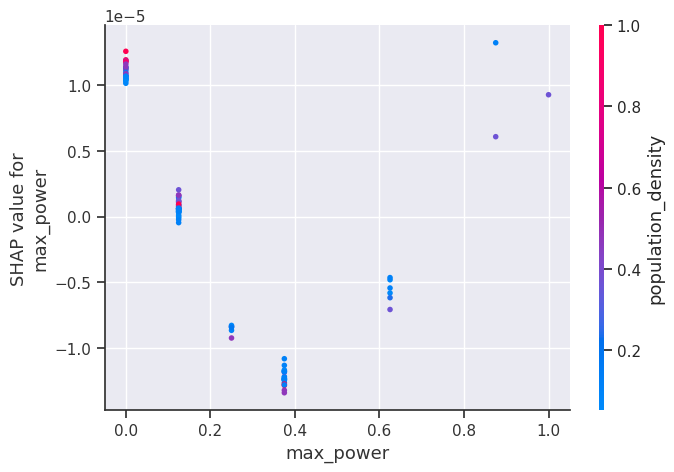

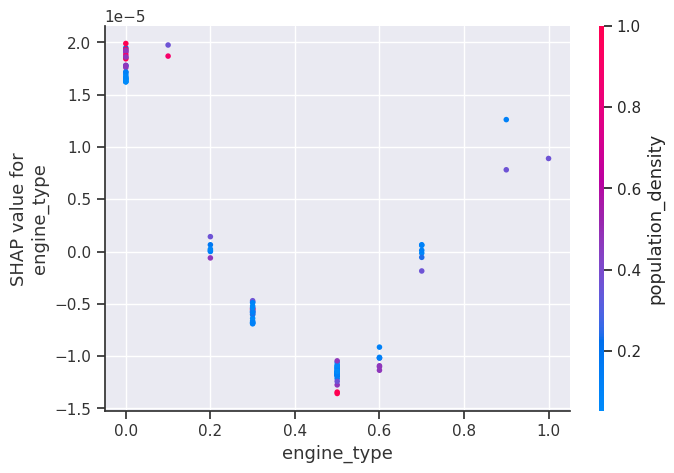

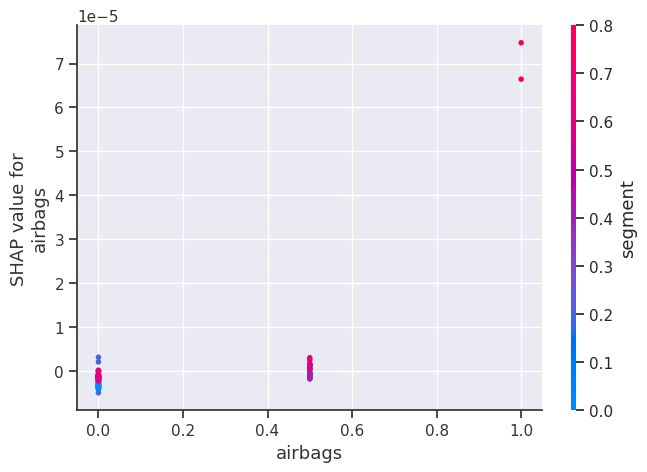

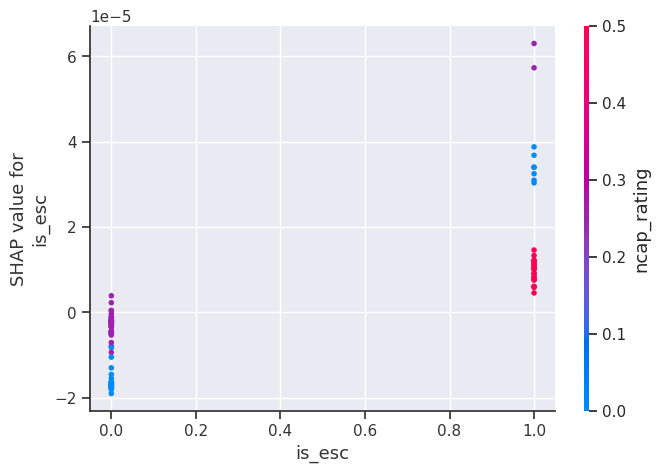

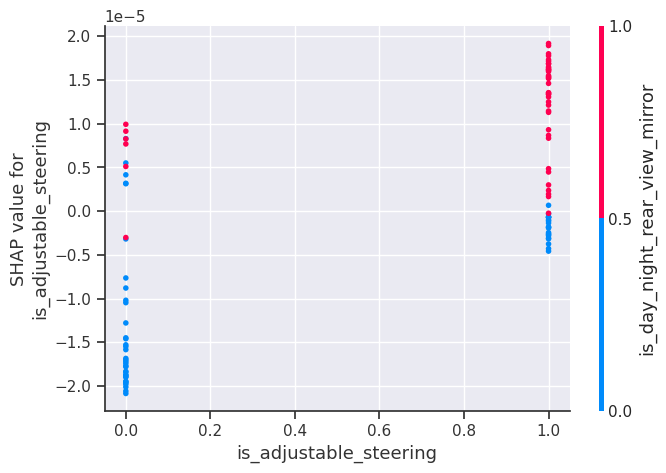

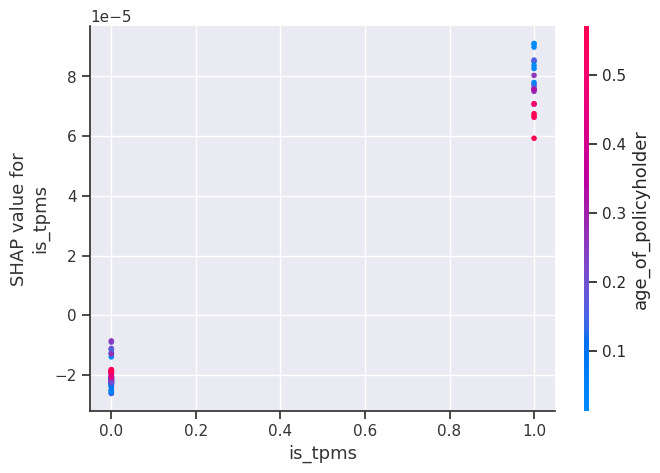

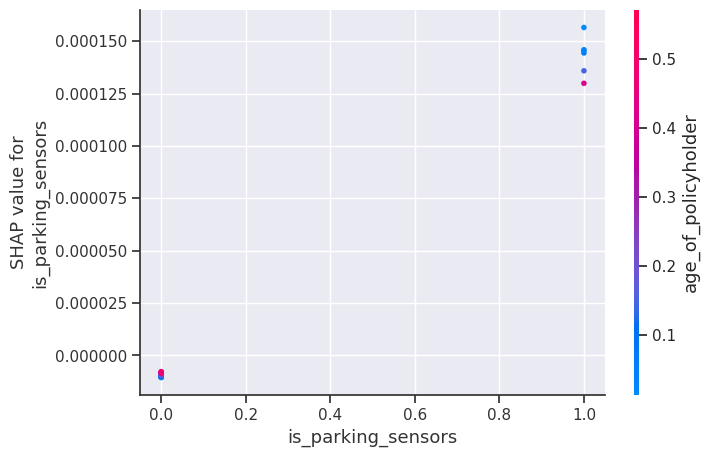

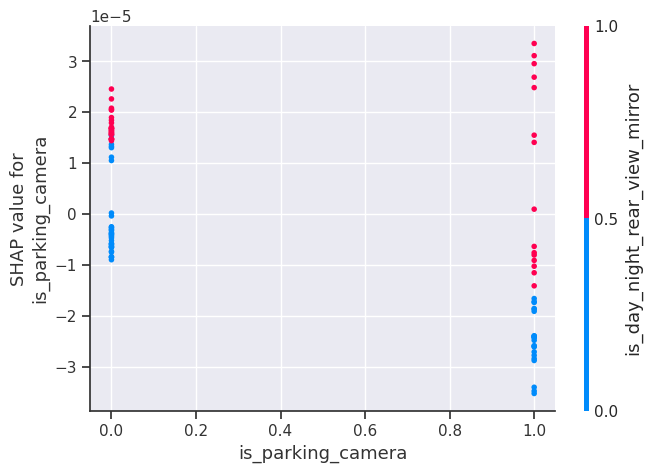

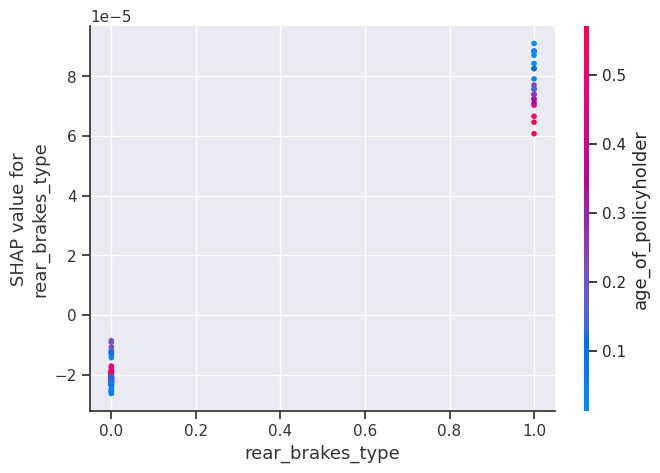

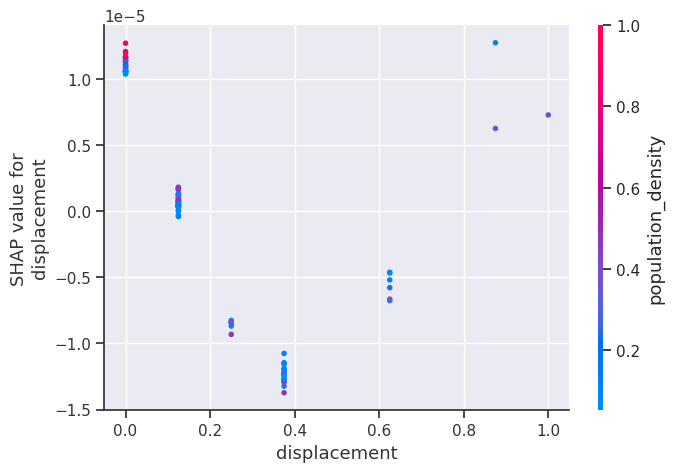

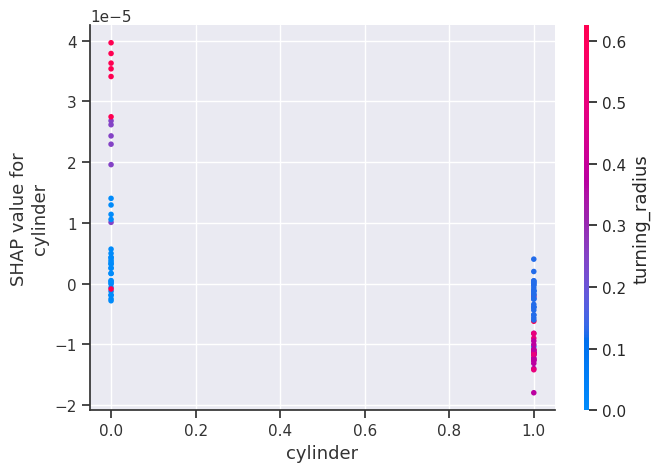

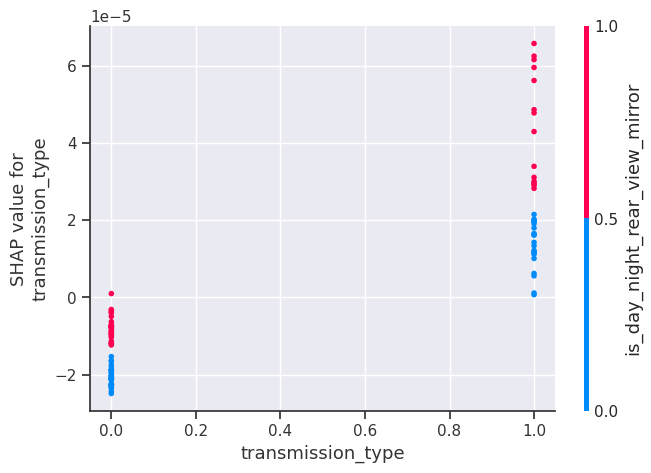

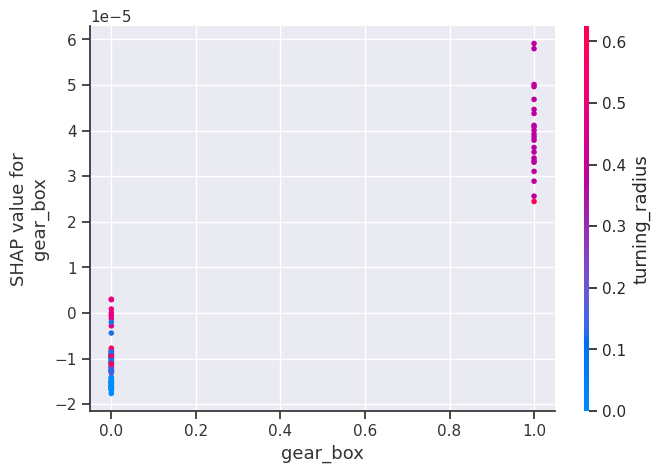

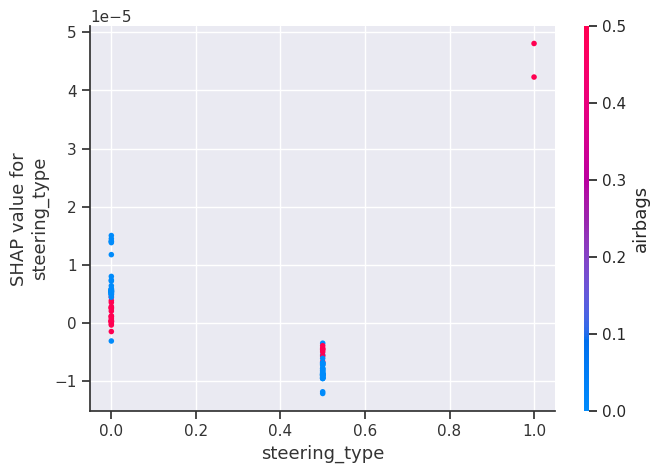

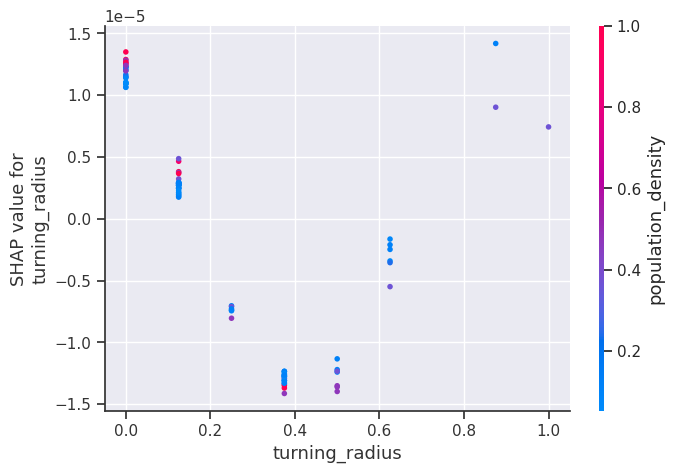

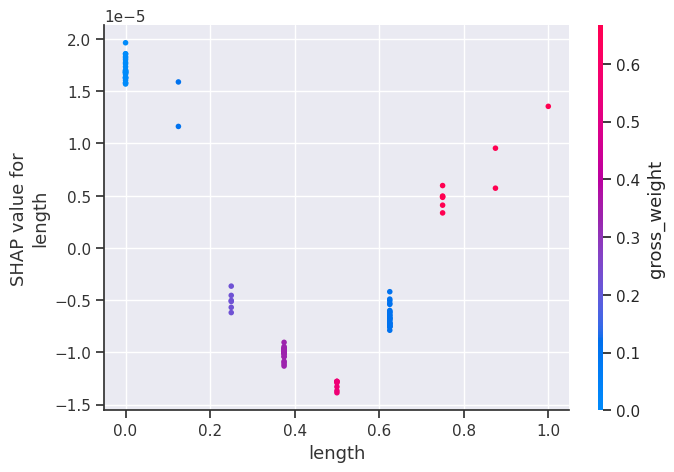

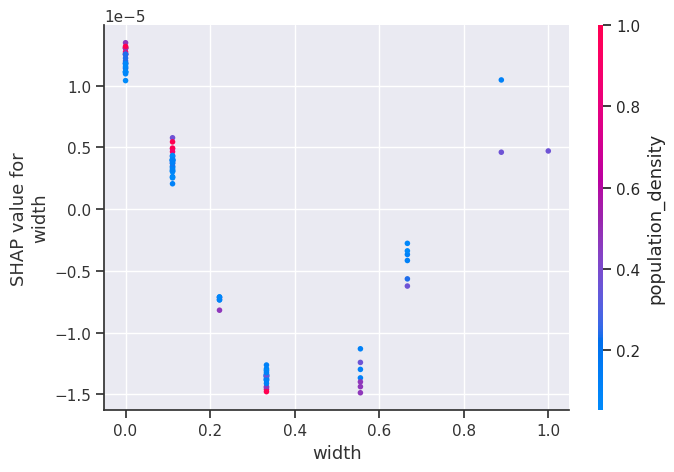

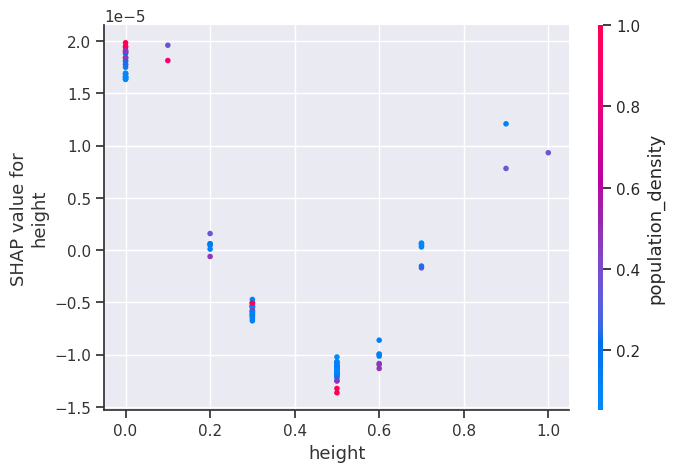

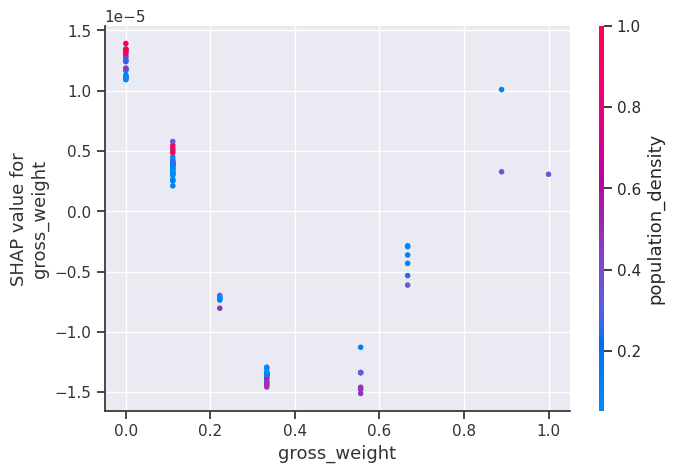

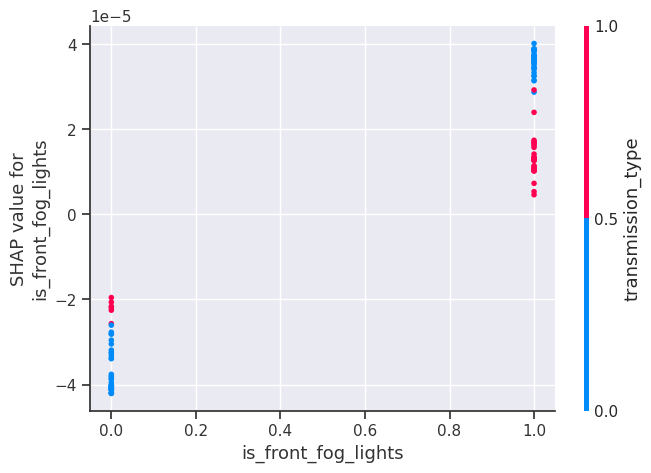

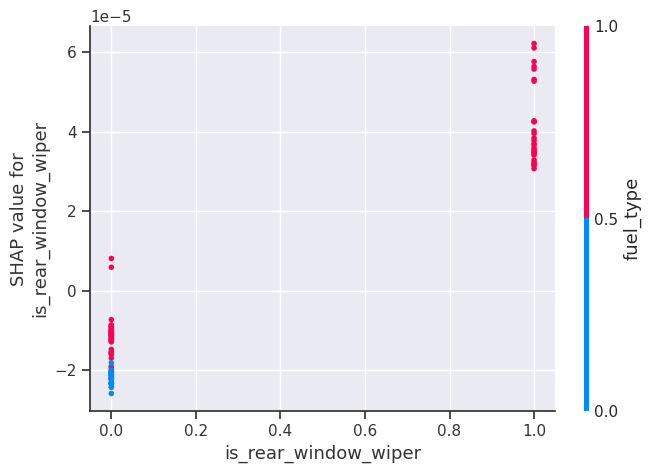

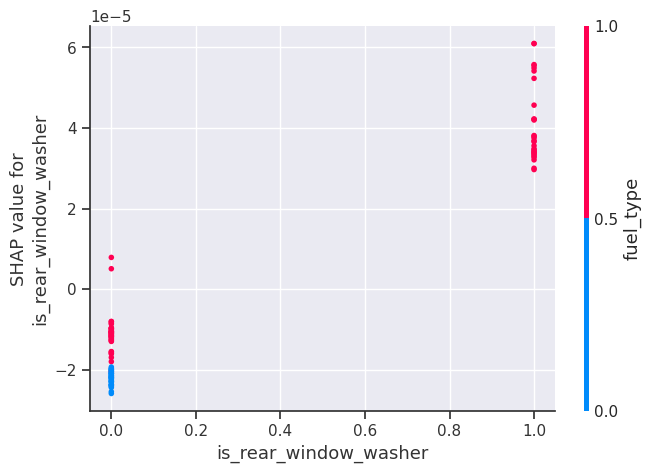

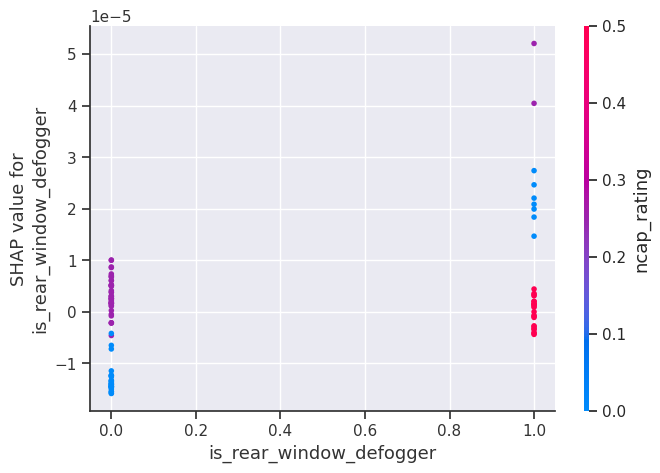

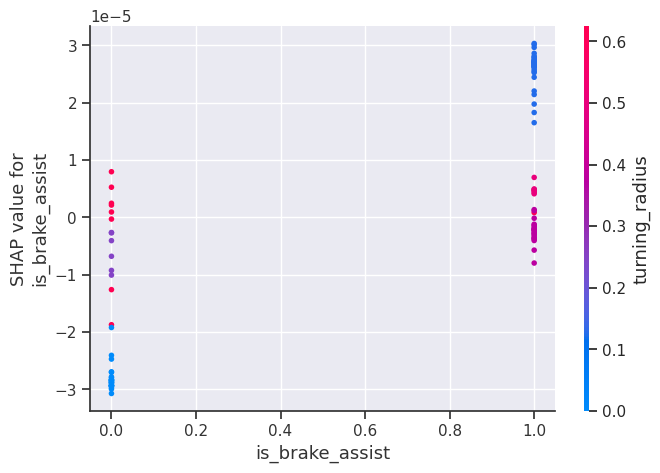

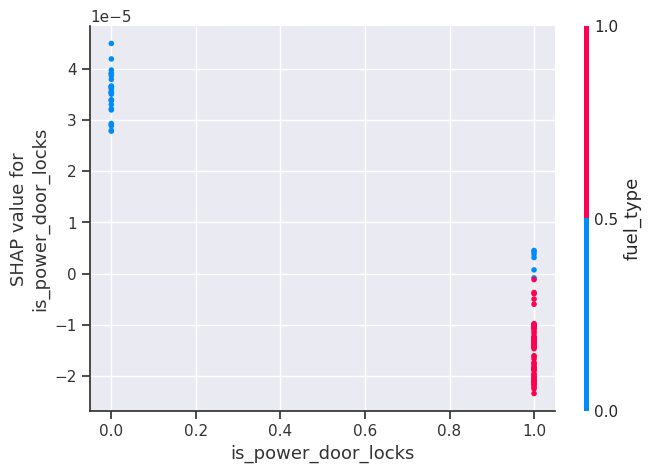

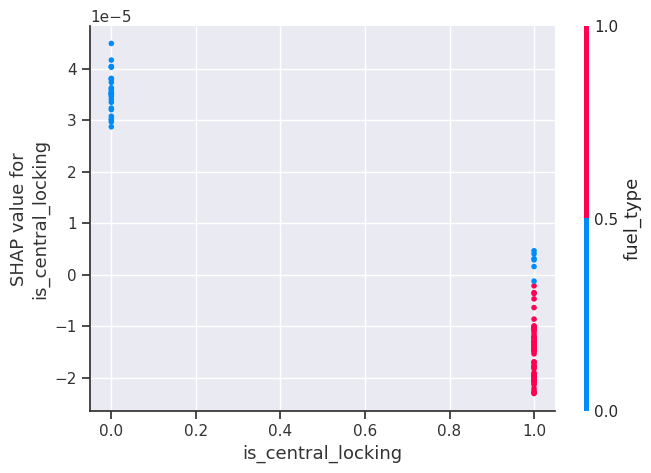

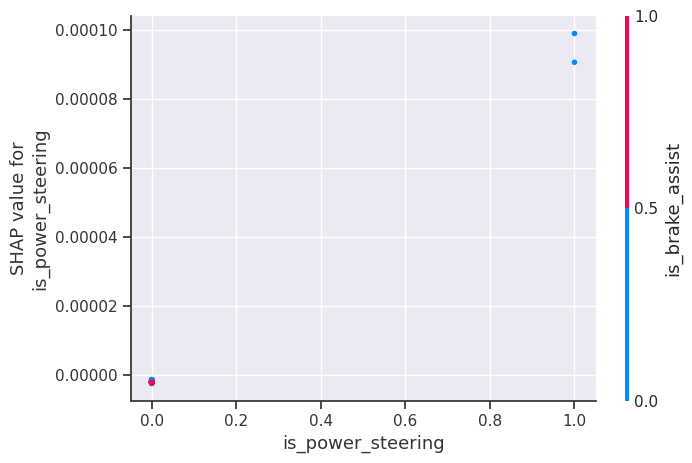

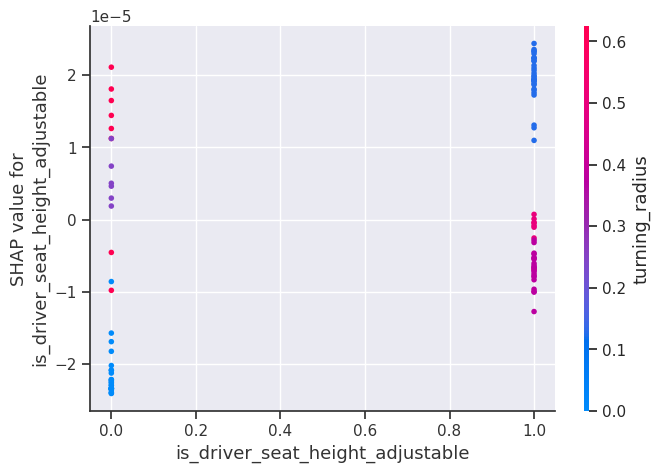

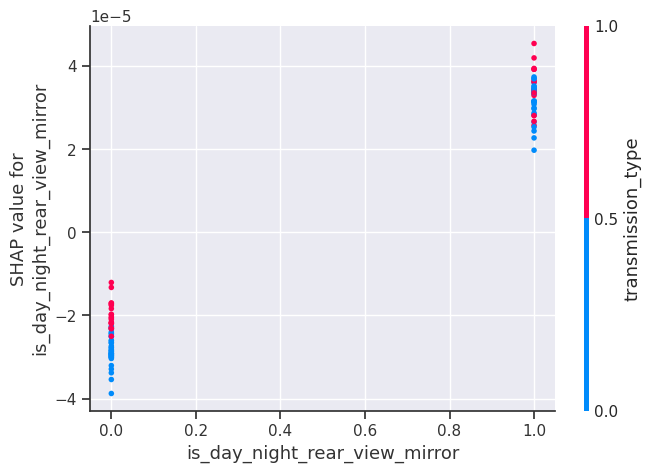

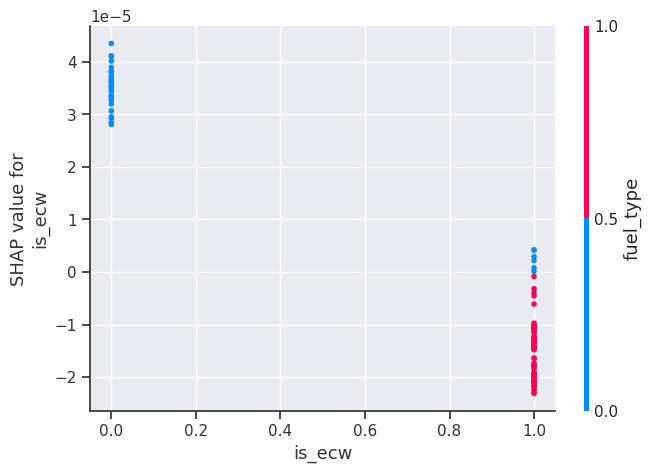

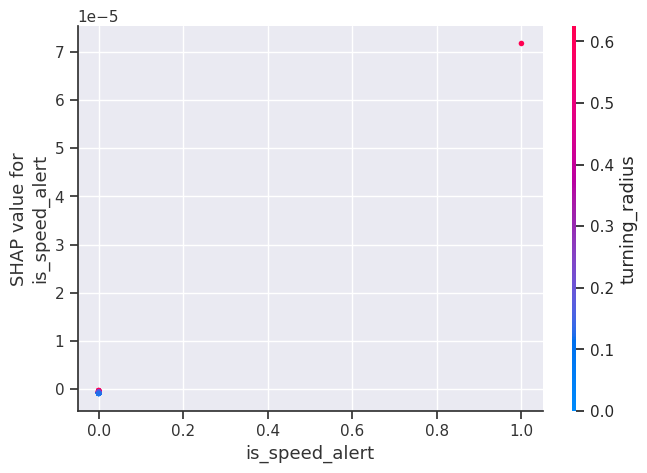

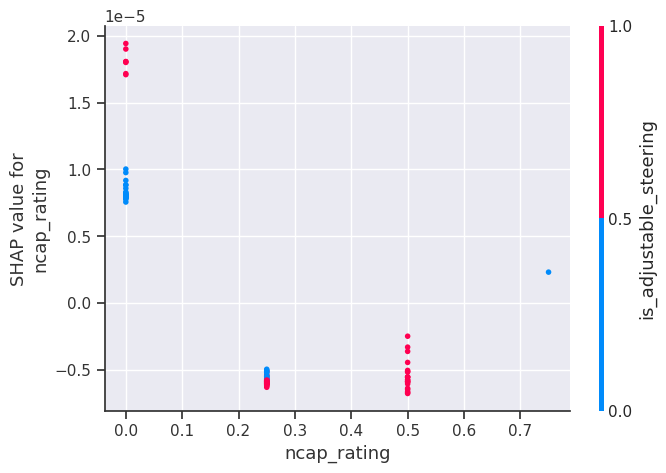

In [ ]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

# **Heatmap Visualization for Linear and Tree-based model**

This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(feature of insurance claim).
Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is

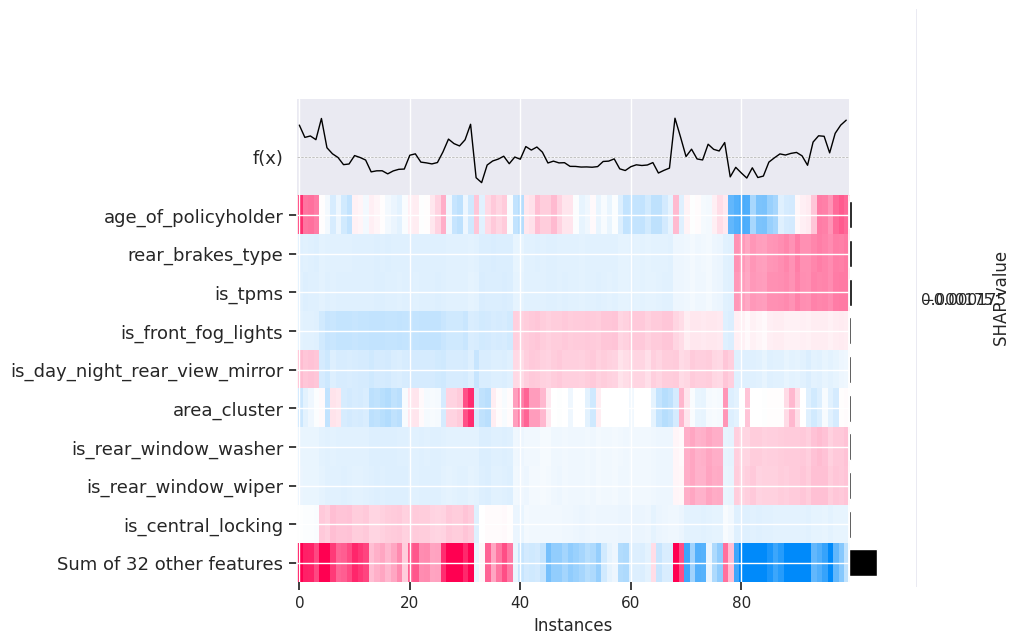

In [ ]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model

# `**Interpreting AutoML's best model with tuned hyperparameters**`

**How are errors/residuals distributed and how interpretable is your model ?**

# **Residual Analysis**
The residual analysis plot shows striped lines, which is a result of having an integer response value rather than a real value. Additionally, the plot shows that the residuals are normally distributed, which is a good indication that the model is performing well. Furthermore, the plot suggests that the residuals do not exhibit heteroscedasticity, which is important for the reliability of the model's predictions. Overall, the residual analysis plot is a valuable tool for evaluating the performance of a model and ensuring that it is accurate and reliable.

# **Variable Importance**
In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding.

# **SHAP Summary**

All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by age_of_car and so on
The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see age_of_car has the most impact on the insurance_claim. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - High value of age_of_car  results in less chance of insurance claim. As we can see the distribution of red points in the age_of_car feature is far more spread than the blue points. 
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

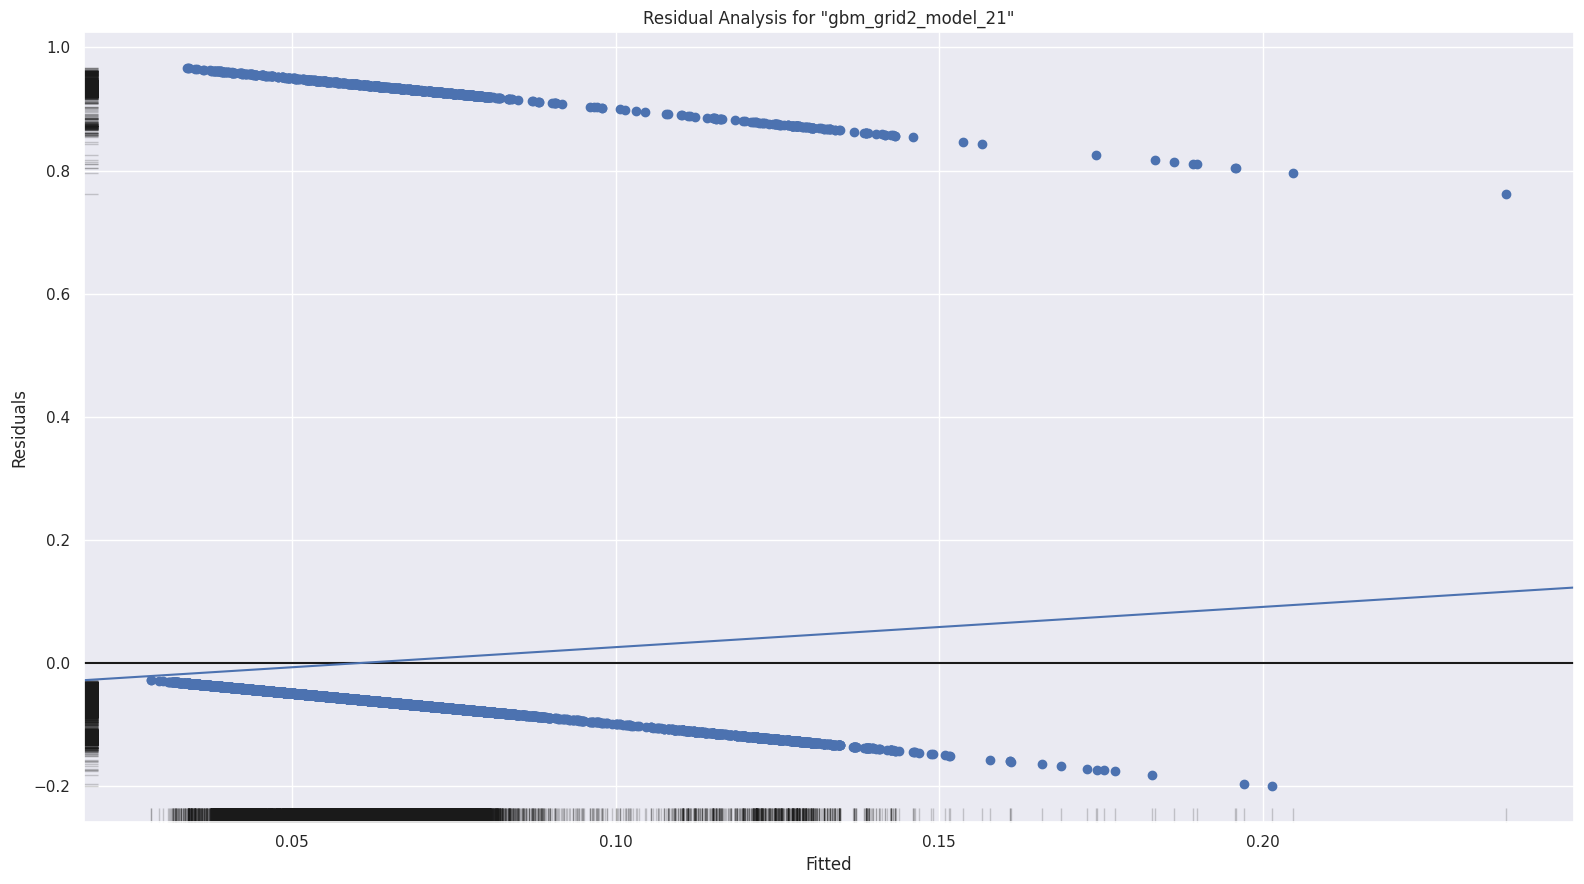

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

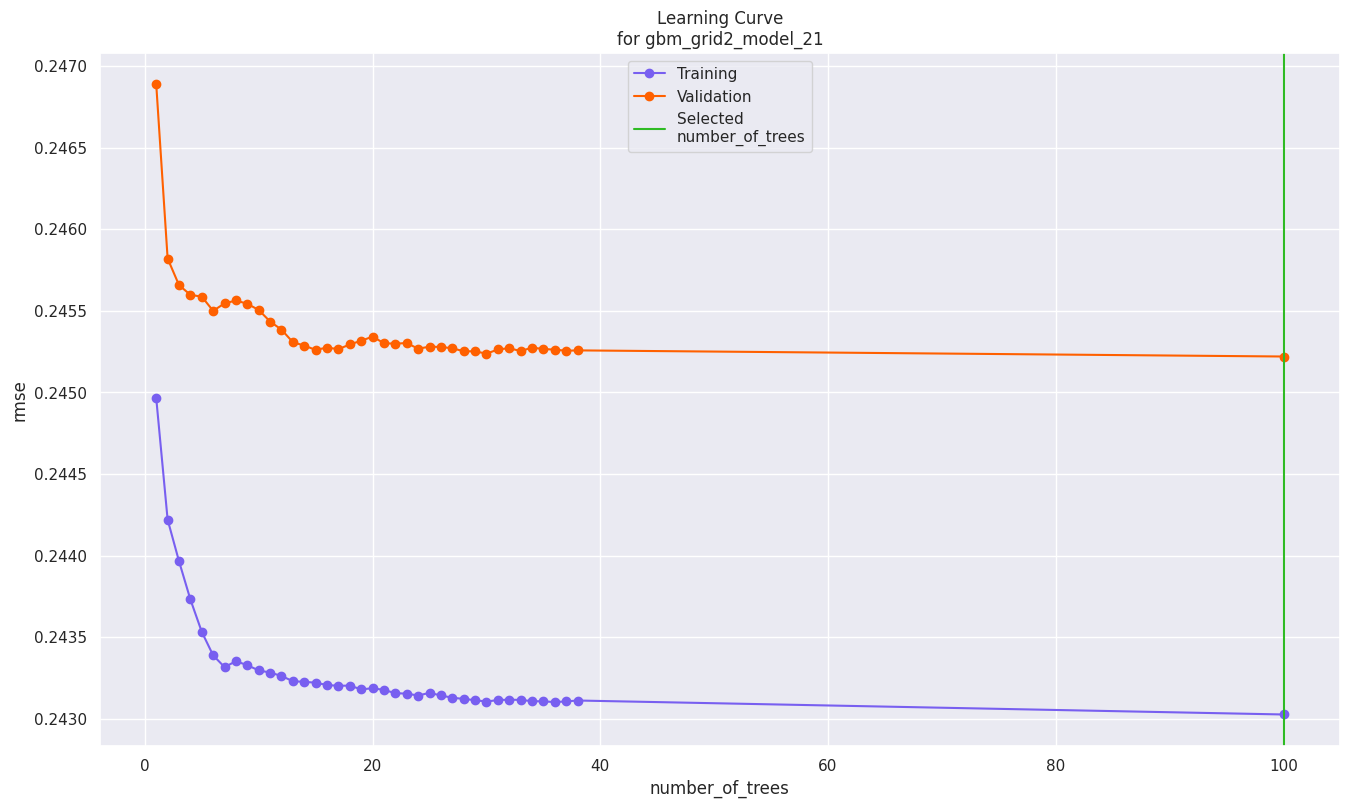

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

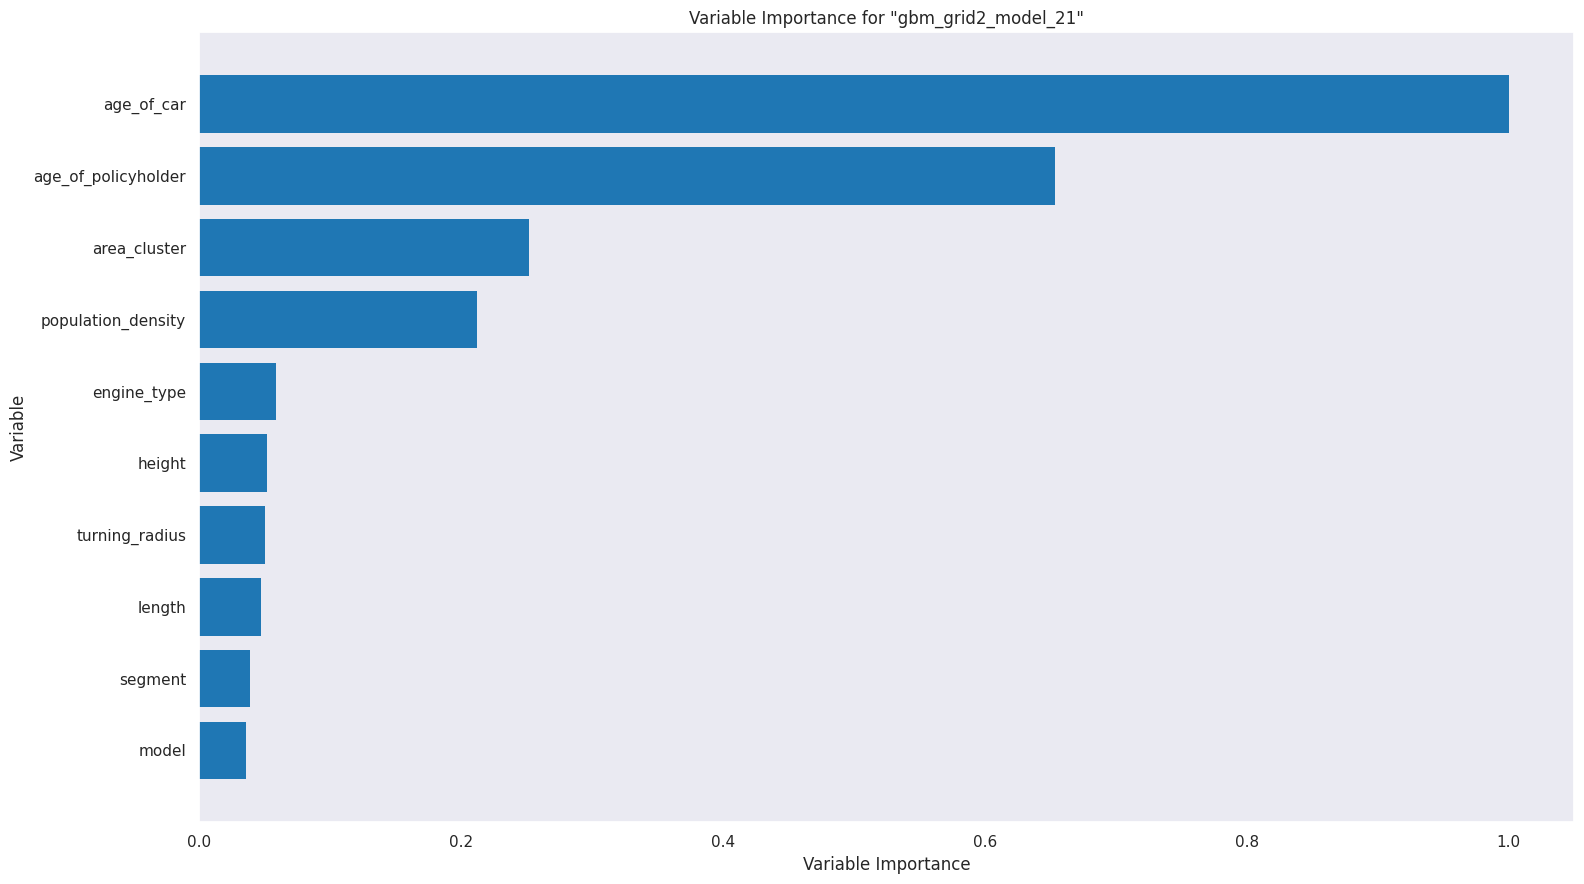

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

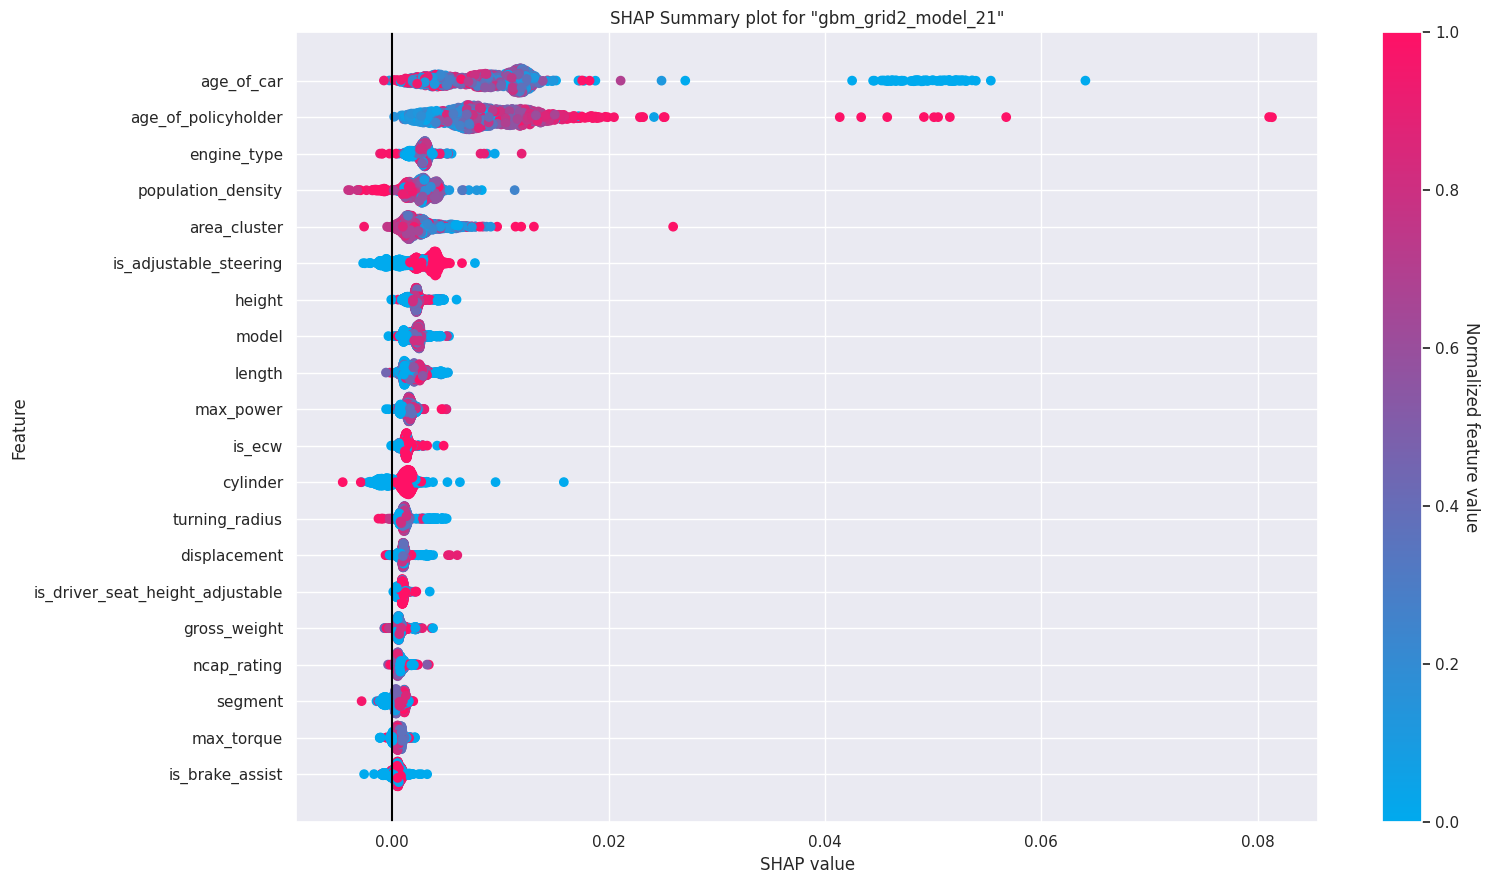

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

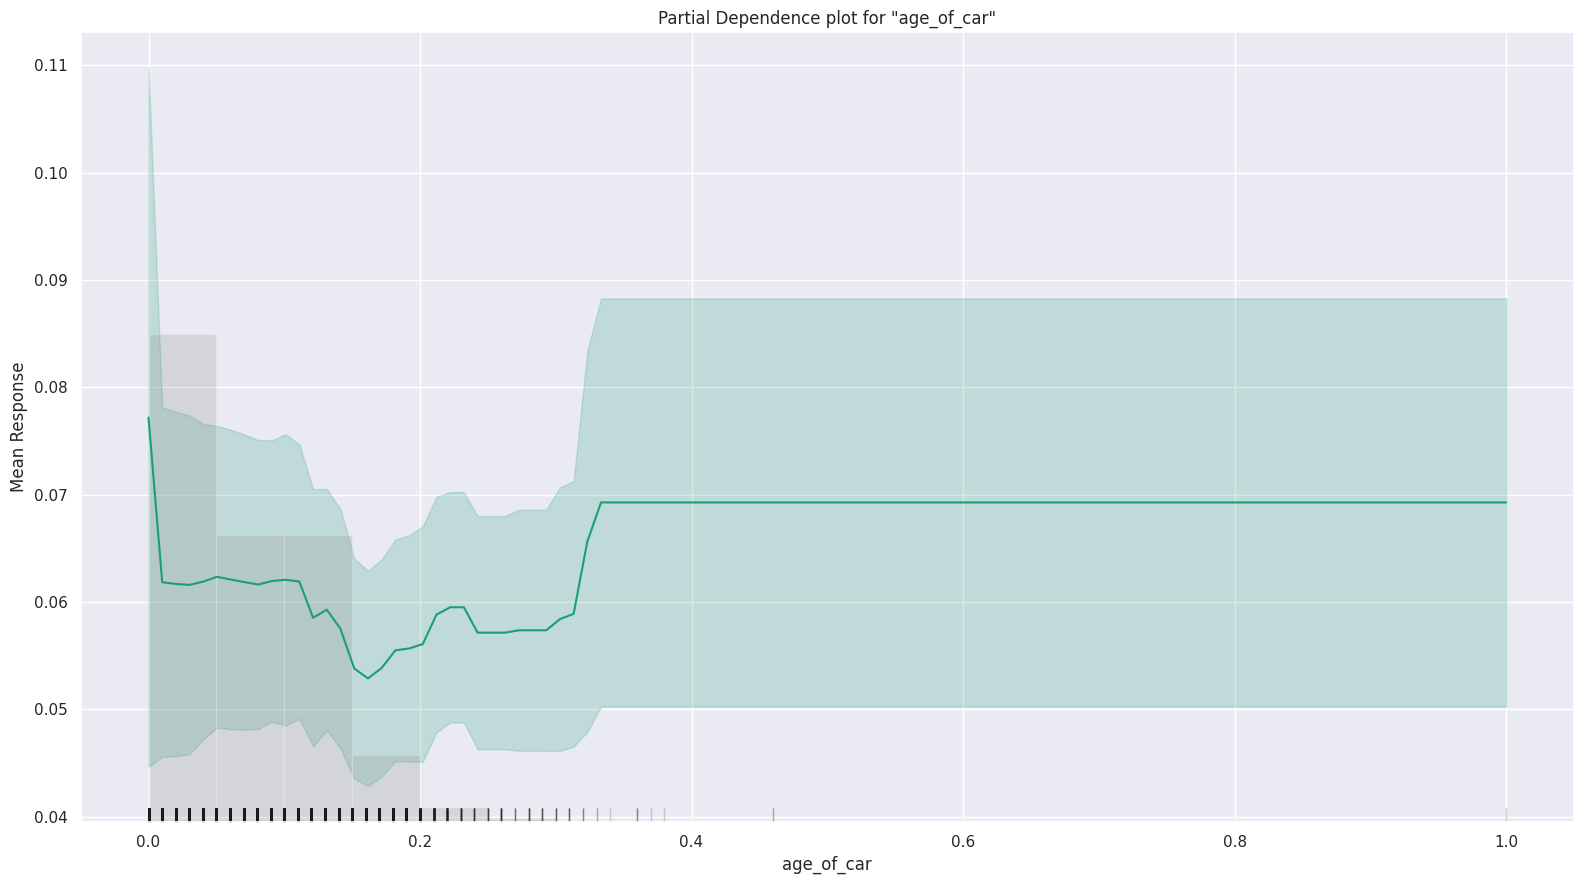

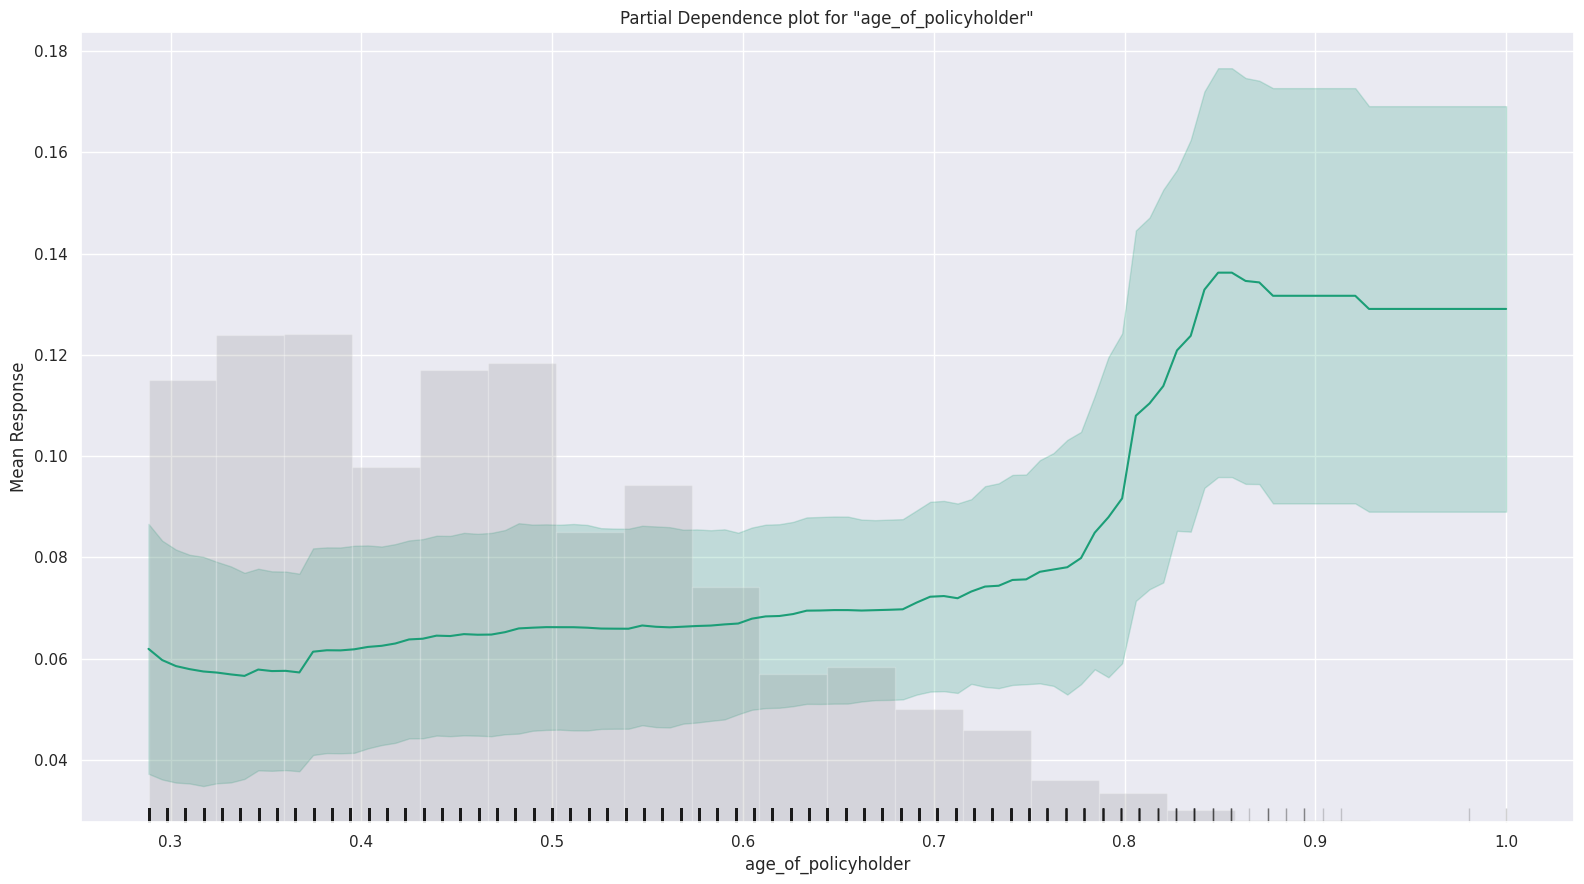

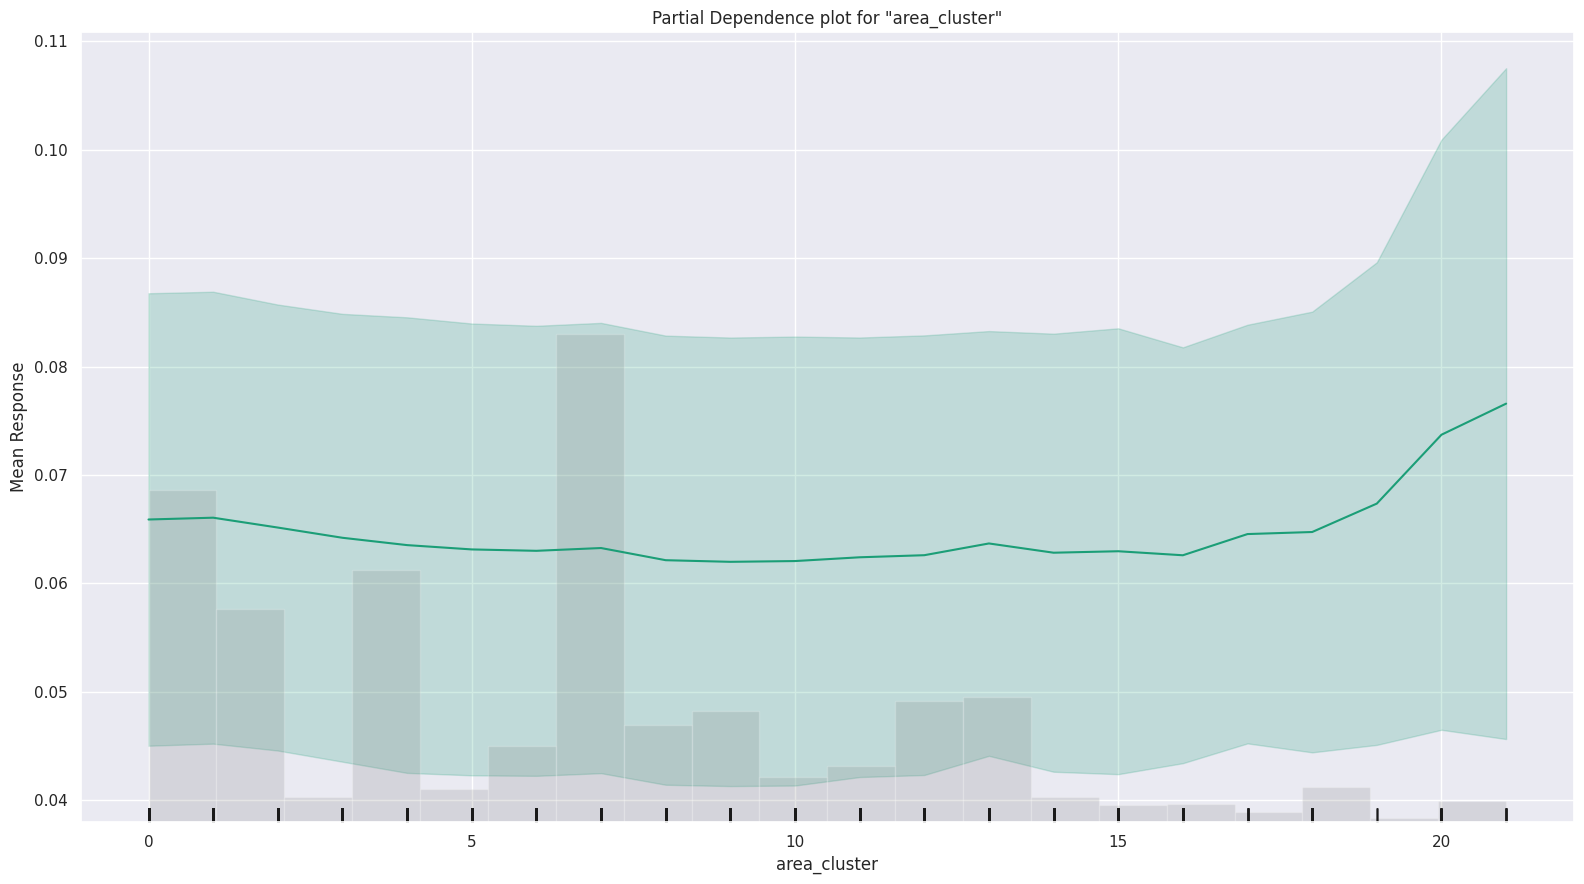

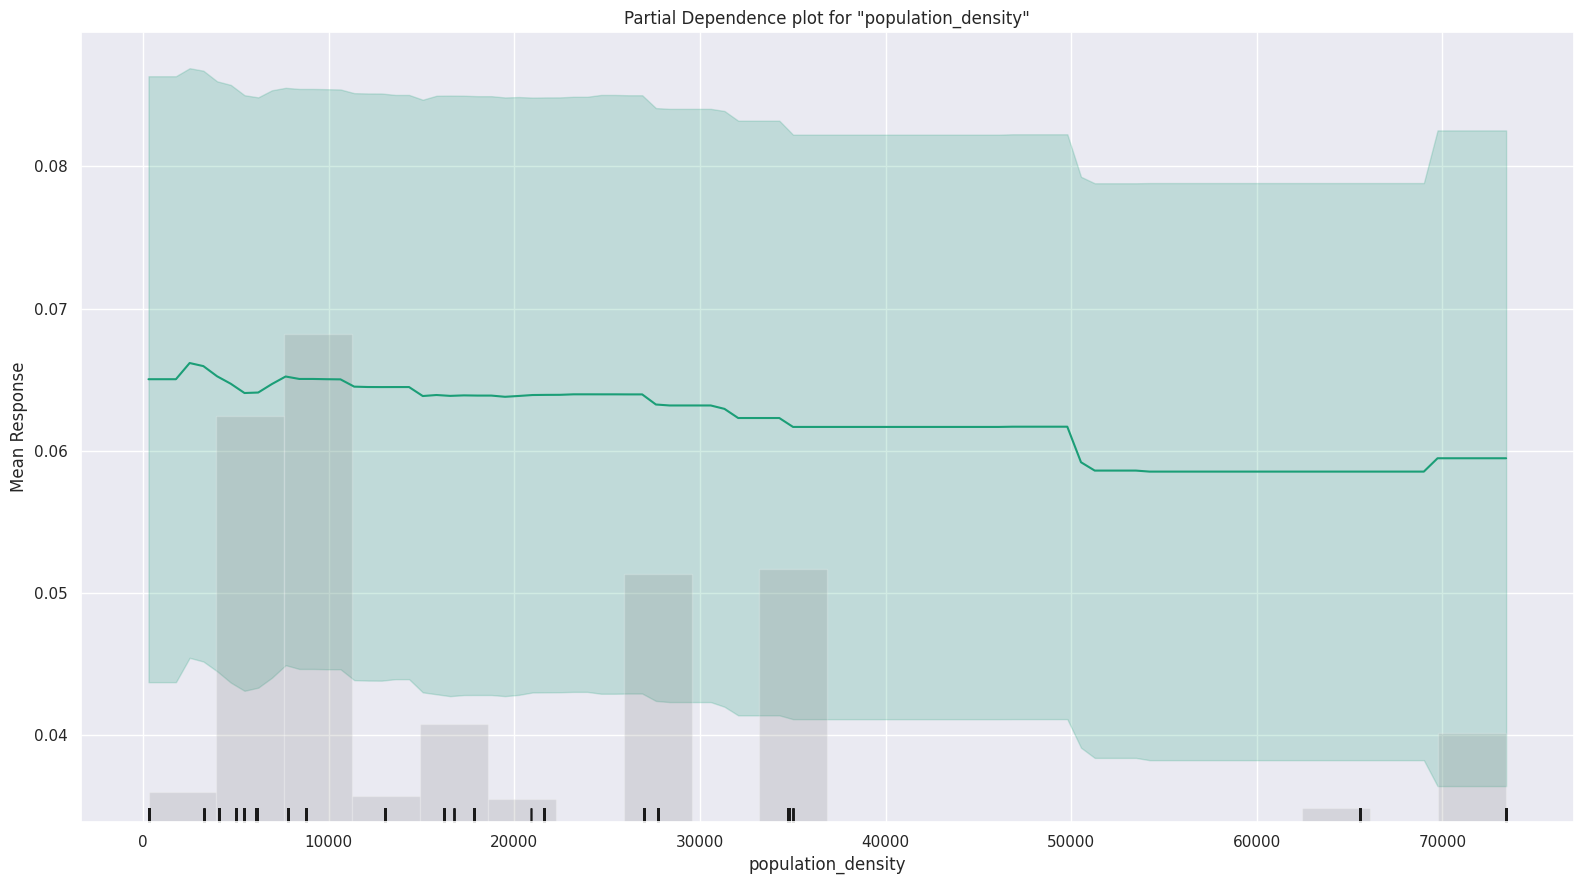

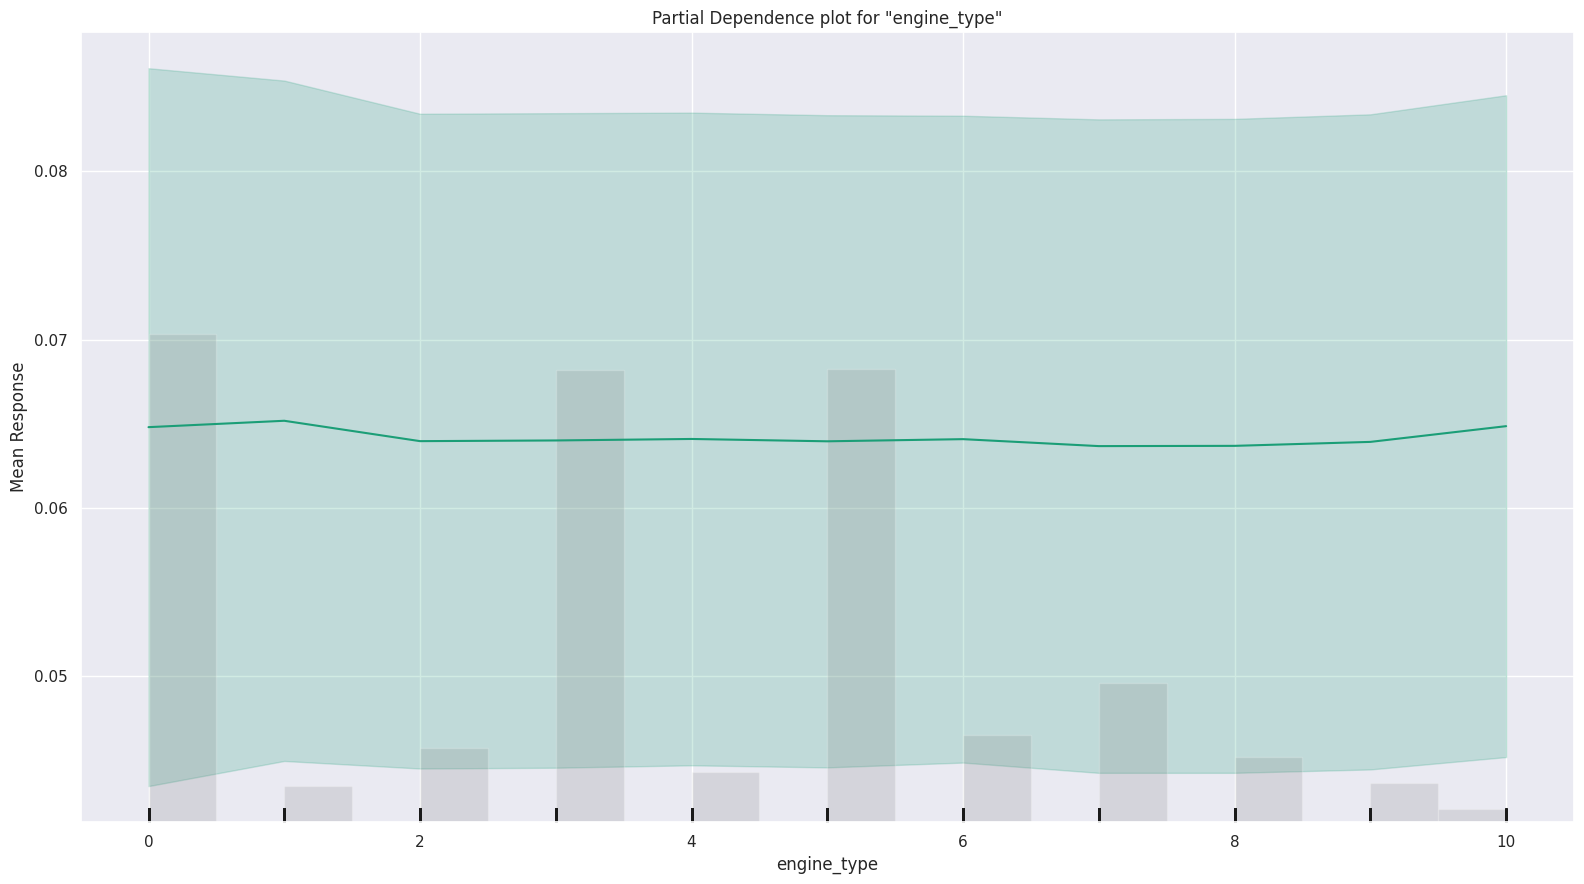

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

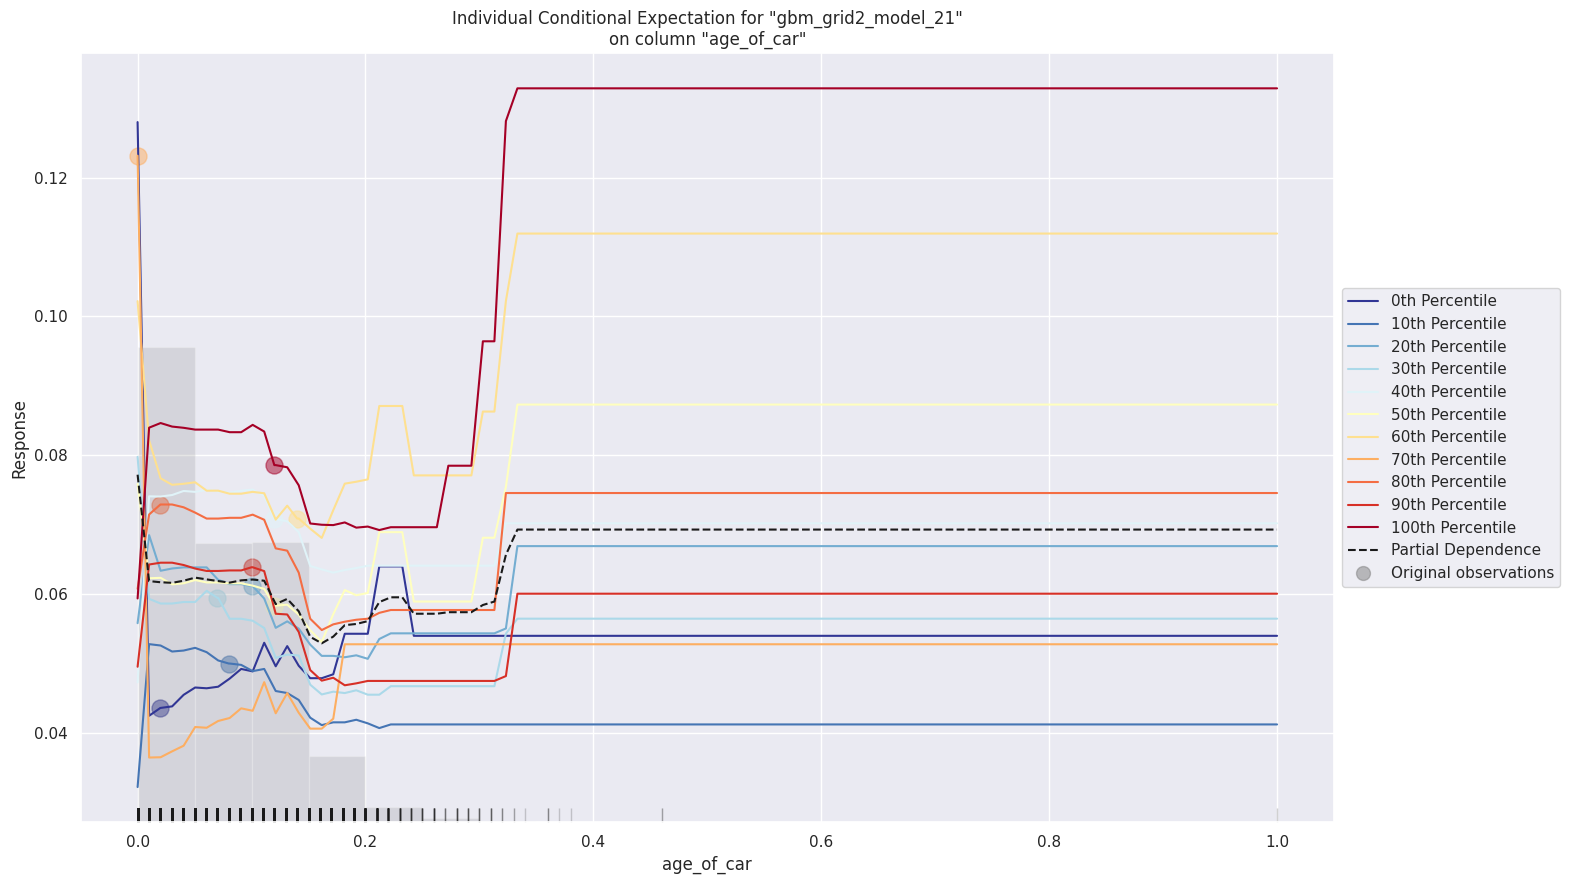

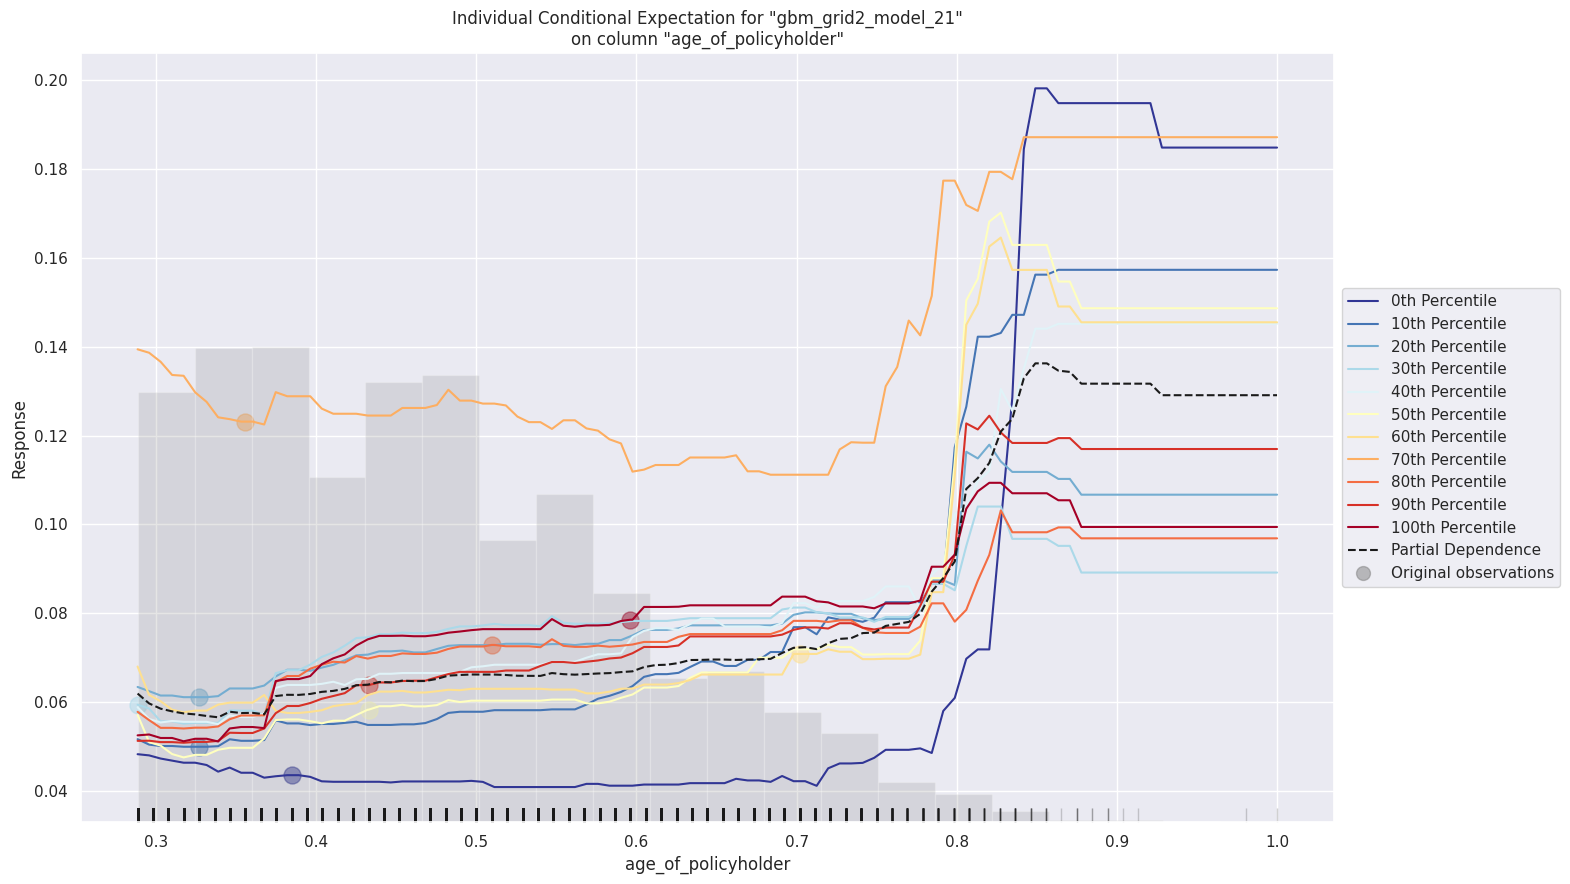

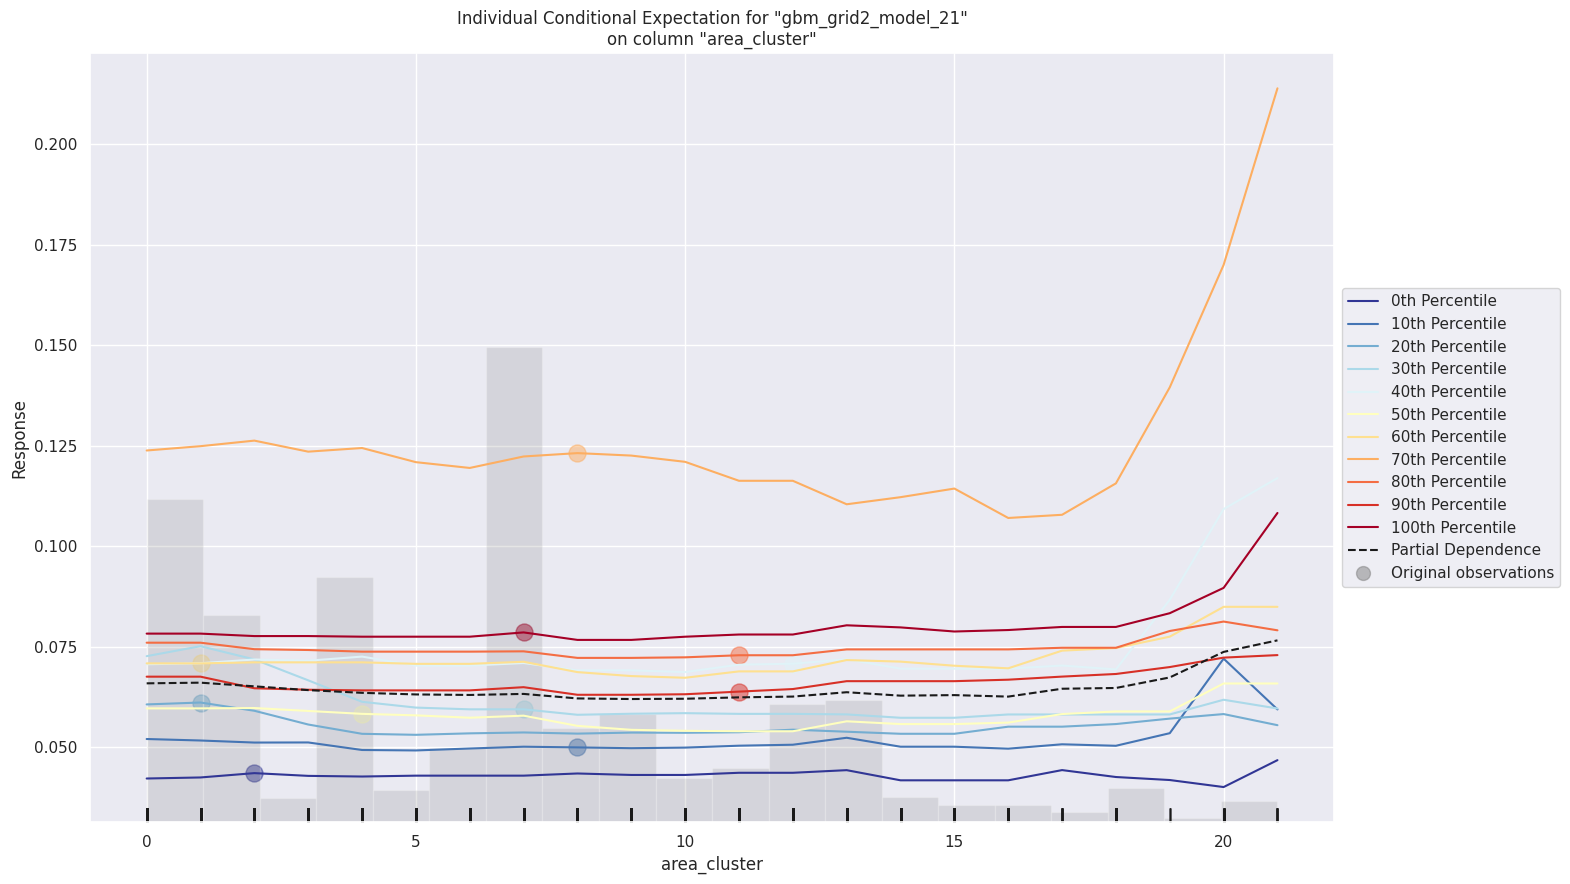

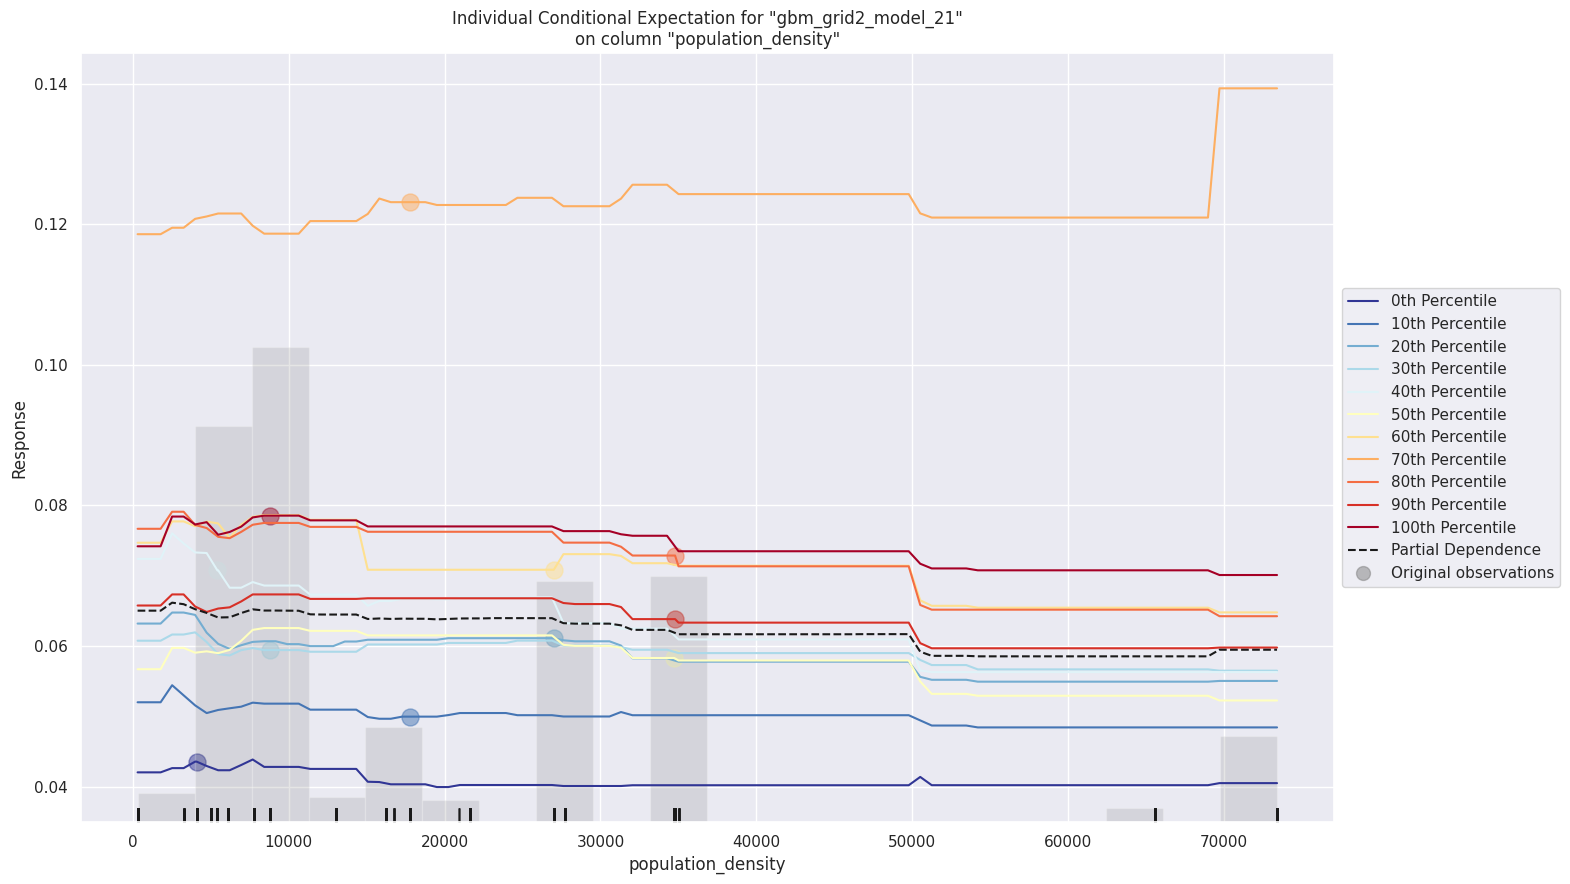

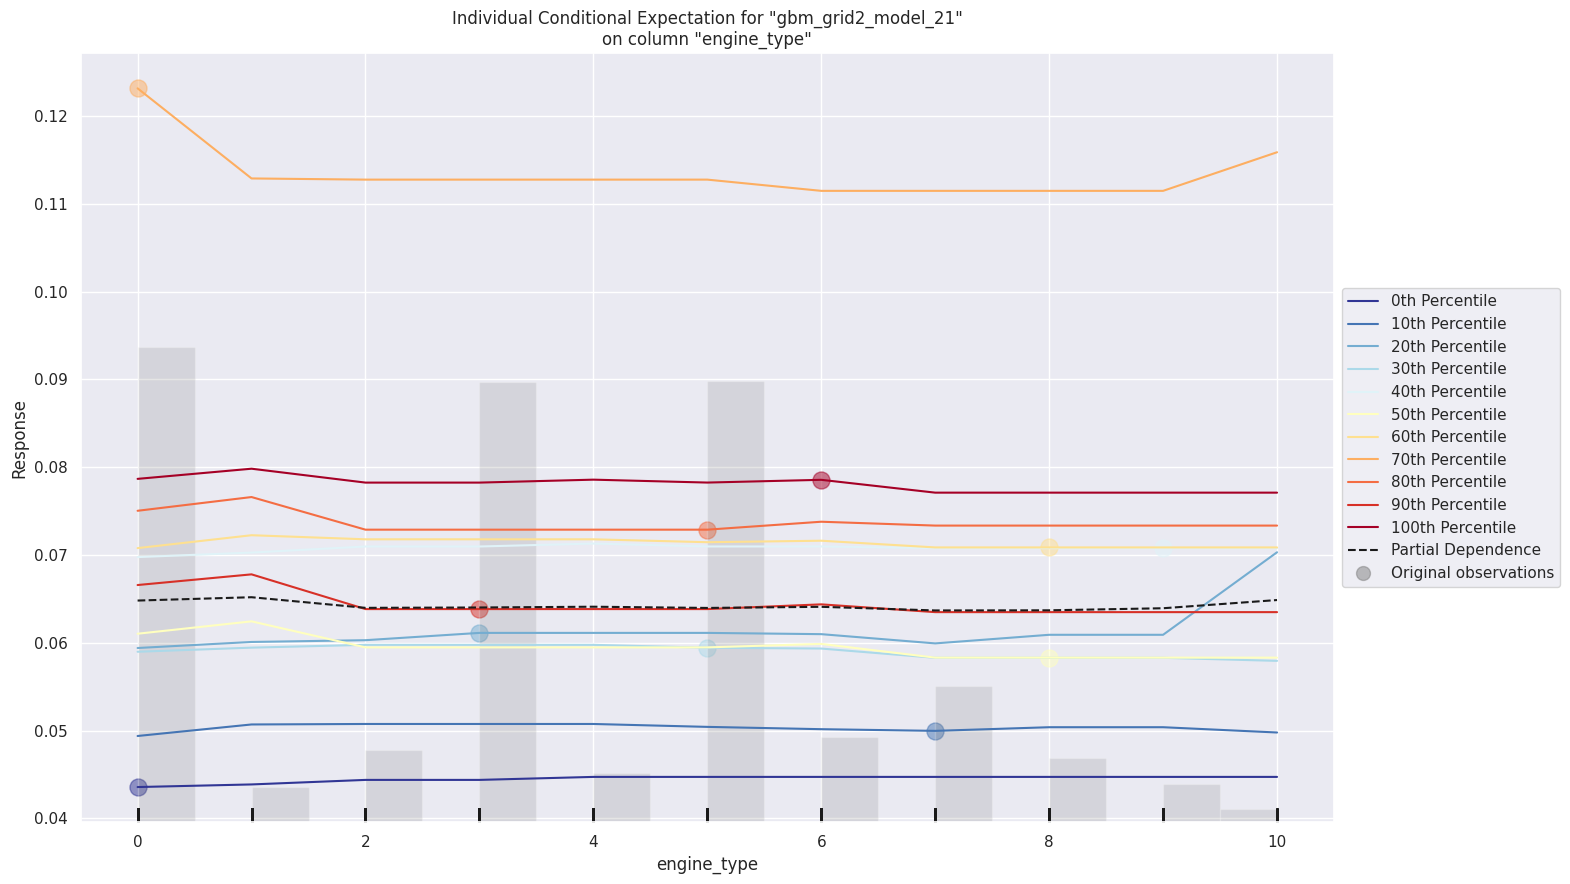

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
best_drf_model.explain(autoML[1])  # AutoML Explainability

# `**Final Takeaways**`
The AutoML's top-performing model, which has been fine-tuned with hyperparameters, is the most accurate model for this task among all the models tested in this exercise. Additionally, this model is interpretable, which means that we can understand the reasons behind its predictions.

# `**Learning Outcomes**`
In this project, I learned about the complete lifecycle of a data science project, from data preparation to hyperparameter tuning. I realized that most of the time should be invested in data preparation, including data cleaning, normalization, feature selection, and imputation. Hyperparameter tuning is also crucial and often overlooked, but the results are worth the time invested. It's important to train multiple models and select the best ones for deployment, as some algorithms perform better than others on specific tasks. Finally, I found that model interpretation, such as using SHAP, LIME, and PDP, is the most valuable takeaway from this series of assignments. These tools make it easier to understand what factors influenced a model's predictions.

# `**References**`

https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?resource=download&select=train.csv

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html 

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ 

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/ 

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression Dataset- https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?datasetId=2636290 

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML